# **Persistent Effects of Jim Crow-Era Redlining on Lubbock Property Values: A 76-Year Analysis**




## **Study Overview**

This comprehensive data analysis examines how Jim Crow-era redlining and discriminatory zoning practices have impacted property values in Lubbock, Texas over a 76-year period (1945-2021). Through analysis of approximately 30,000 properties, this study reveals persistent patterns of inequality and identifies opportunities for targeted interventions.

## Historical Context

- **1923**: Lubbock City Council passed an ordinance restricting Black residents to the east side of town (east of Avenue C and south of 16th Street)
- **1943**: Land use plan created industrial zones around Black neighborhoods, particularly the Chatman Hill neighborhood
- **Subsequent Plans**: Expanded industrial zoning in East and North Lubbock, areas predominantly populated by Black and Hispanic residents

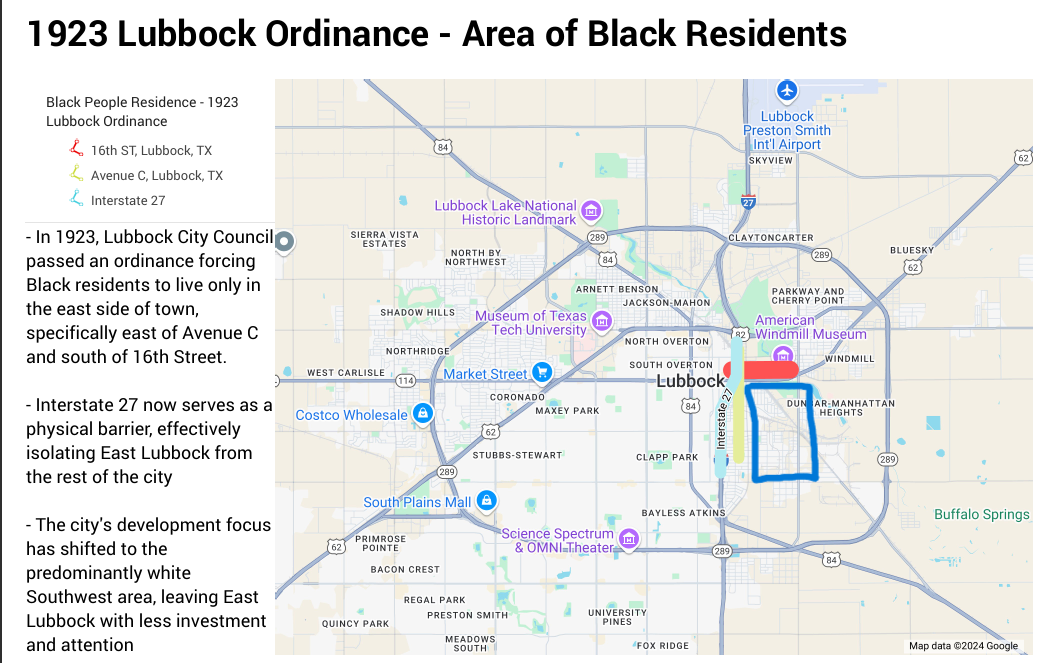

## Dataset Characteristics

### Property Distribution
- Total properties: 29,713
- Properties within Lubbock city limits: 28,611 (96.29%)
- Properties across 6 district councils
- Four zone categories: Redlined, Half-Mile Buffer, One-Mile Buffer, and Outside

### Temporal Coverage
- Six time periods: 1945, 1975, 1985, 2012, 2020, 2021
- Most properties (15,806) have data for 1975, 2012, 2020, and 2021
- 230 properties have complete data across all time periods

### Spatial Distribution
- Redlined Zone: 205 properties (0.72%)
- Half-Mile Buffer: 1,892 properties (6.61%)
- One-Mile Buffer: 4,592 properties (16.05%)
- Outside All Zones: 23,814 properties (83.23%)

### District Distribution
- District 1: 6,704 properties (23.43%)
- District 2: 7,566 properties (26.44%)
- District 3: 8,766 properties (30.64%)
- District 4: 3,015 properties (10.54%)
- District 5: 516 properties (1.80%)
- District 6: 2,044 properties (7.14%)

## Key Findings

### 1. Value Gap Evolution
- 1945: Initial 80% gap (\$800 difference)
- 1975: Gap widened to 118.8%
- 1985: Temporary reduction to 41.6%
- 2021: Reached historic high of 121.5% (\$70,093 difference)

### 2. District-Level Impact
- Districts 4 & 5: Highest median values (>$195,000)
- District 2: Most severe impact (-59% in redlined areas)
- District 1: Moderate gap (-11.6%)
- Districts 3-6: No redlined properties, consistently higher values

### 3. Growth Patterns
- Highest growth: 1975-1985 period
- Outside zones: 7,000% total growth
- District 6: Exceptional growth (10,292%)
- Post-2012: Slowing growth across all zones

### 4. Market Stability Analysis
- Outside zones: Increasing but managed volatility (CV: 0.453 → 2.574)
- Half-mile buffer: Highest instability (CV peaked at 8.048)
- Redlined areas: Deceptive stability (CV: 1.954 by 2021) indicating market stagnation

## Methodology

1. **Data Integration**
   - Merged property records across six time periods
   - Standardized column names and cleaned numerical values
   - Created consistent longitudinal dataset

2. **Spatial Analysis**
   - Used ArcGIS Pro for geographic classification
   - Categorized properties by zones and district councils
   - Integrated spatial and temporal data

3. **Statistical Analysis**
   - Calculated value gaps and growth rates
   - Analyzed market stability through coefficient of variation
   - Examined district-level patterns and trends

## Implications & Recommendations

### Economic Interventions
- Implement targeted property rehabilitation programs
- Create economic opportunity zones in buffer areas
- Develop property tax incentives for redlined areas

### Policy Recommendations
- Focus infrastructure investment in Districts 1 and 2
- Establish property maintenance support programs
- Create development grants for undervalued areas

### Future Considerations
- Address market stagnation in redlined areas
- Target interventions in high-volatility buffer zones
- Develop long-term strategies to close persistent value gaps

## Study Significance

This analysis provides quantitative evidence of redlining's long-term impacts on property values in Lubbock, demonstrating how historical discriminatory practices continue to influence current economic conditions. The findings can inform policy decisions aimed at creating more equitable urban development strategies.


### **File and Folder Locations**

* This colab file, `Complete Lubbock Analysis.ipynb`, is present in the following location: "[/content/drive/MyDrive/RA Part-time UMD/Lubbock Project/Data Complete Lubbock Analysis/colab notebooks/Complete Lubbock Analysis.ipynb](https://drive.google.com/drive/folders/1m1KiltiGo2NrtGZlzkwLDmO8-tKy8QGZ?usp=drive_link)"

* The input file, `1945 1975 1985 data.csv`, is present in the following location: [/content/drive/MyDrive/RA Part-time UMD/Lubbock Project/Data/Complete Lubbock Analysis/csv data files/1945 1975 1985 data.csv](https://drive.google.com/file/d/1WZfW2kCodxLgR-vDhzGPlQ4ZoEAX70N2/view?usp=drive_link
)

* The input file, `2012 2020 2021 data.csv`, is present in the following location: [/content/drive/MyDrive/RA Part-time UMD/Lubbock Project/Data/Complete Lubbock Analysis/csv data files/2012 2020 2021 data.csv](https://drive.google.com/file/d/1M9veTIvOAML-UefSsq_STlR03_kFjUGu/view?usp=drive_link)

* The input file, `all_data_with_zones.csv` file used in part 3 has the zoning data which is retrieved using ArcGIS Pro is present in the following location: [/content/drive/MyDrive/RA Part-time UMD/Lubbock Project/Data/Complete Lubbock Analysis/csv data files/all_data_with_zones.csv](https://drive.google.com/file/d/136hdsz1H_vifnw_pGmGPbO4cQZlJCqJj/view?usp=drive_link)



---


# PART 1 - Merging and Cleaning the data from 1945, 1975, 1985, 2012, 2020, 2021

The following is the code that takes initially two dataframes `df_old` & `df_new` and merges them into a single dataframe. This merged dataframe is cleaned and made ready for Part 2.



---


### Step 1: Install the required libraries and Import them

In [ ]:
# Install the requried modules/libraries

In [ ]:
# Import the requried modules/libraries
import re
import ast # This is useful to convert the string representation of lists to actual lists
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Mount the google drive
from google.colab import drive
drive.mount('/content/drive')

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

Mounted at /content/drive


In [ ]:
# display all the rows, columns and display them at max width
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)



---


### Step 2: Input the dataframes and understand them

In [ ]:
# Create two dataframes and read the data into them
df_old = pd.read_csv('/content/drive/MyDrive/RA Part-time UMD/Lubbock Project/Data/Complete Lubbock Analysis/csv data files/1945 1975 1985 data.csv')
df_new = pd.read_csv('/content/drive/MyDrive/RA Part-time UMD/Lubbock Project/Data/Complete Lubbock Analysis/csv data files/2012 2020 2021 data.csv')

#### Understanding `df_old`

In [ ]:
# Rename column 48 in df_old from 'county_1945' to 'county_value_1945'
df_old.rename(columns={df_old.columns[48]: 'county_value_1985', df_old.columns[53]: 'county_1985'}, inplace=True)

In [ ]:
# 1. Display the structure and data types
df_old.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33821 entries, 0 to 33820
Data columns (total 56 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   standard_address                                     33821 non-null  object 
 1   latitude                                             33821 non-null  float64
 2   longitude                                            33821 non-null  float64
 3   one_rep_ID1945                                       2308 non-null   object 
 4   ID_1945                                              2308 non-null   object 
 5   people_1945                                          310 non-null    object 
 6   document_number_1945                                 624 non-null    object 
 7   parcel_number_1945                                   722 non-null    object 
 8   original_grantee_city_or_town_1945                   1097 non-null

In [ ]:
# 2. Summary statistics for numeric columns
df_old.describe()

latitude     longitude
count  33821.000000  33821.000000
mean      33.554565   -101.807786
std        0.465694      1.261297
min       21.307227   -157.824893
25%       33.543602   -101.903361
50%       33.561249   -101.875564
75%       33.580074   -101.852755
max       48.407460    -71.184653

In [ ]:
# 3. List all column names
df_old.columns

Index(['standard_address', 'latitude', 'longitude', 'one_rep_ID1945', 'ID_1945', 'people_1945',
       'document_number_1945', 'parcel_number_1945', 'original_grantee_city_or_town_1945',
       'aceres_rendered_1945', 'value_dollars_1945', 'designate_homestead_1945',
       'value_of_city_property_1945', 'value_of_personal_property_1945',
       'total_value_for_state_tax_1945', 'state_tax_1945', 'county_tax_1945',
       'district_school_1945', 'total_tax_1945', '2022_assessed_value_1945', 'one_rep_ID1975',
       'ID_1975', 'people_1975', 'document_number_1975', 'original_grantee_city_or_town_1975',
       'aceres_rendered_1975', 'value_dollars_(state_value)_1975', 'designate_homestead_1975',
       'value_of_city_property_(total_county_value)_1975', 'value_of_personal_property_1975',
       'total_value_for_county_tax_1975', 'state_tax_1975', 'county_tax_1975',
       'district_school_1975', 'tax_total_(including_hospital_and_water_taxes)_1975',
       'one_rep_ID1985', 'ID_1985', '

In [ ]:
# 4. Display the dataframes
df_old.head(5)

standard_address   latitude   longitude        one_rep_ID1945  \
0   1001 13th St_Shallowater_TX 79363_USA  33.694975 -101.994196  one_rep_ID1945_00778   
1   1003 Ironton Ave_Lubbock_TX 79416_USA  33.586489 -101.949109  one_rep_ID1945_00492   
2   1004 12th St_Shallowater_TX 79363_USA  33.693655 -101.994069  one_rep_ID1945_04729   
3  1004 Avenue H_Shallowater_TX 79363_USA  33.692296 -101.996771  one_rep_ID1945_03575   
4      1004 Avenue R_Lubbock_TX 79401_USA  33.586166 -101.856827  one_rep_ID1945_03665   

      ID_1945 people_1945 document_number_1945 parcel_number_1945  \
0  1945_00666         NaN                  NaN            R136591   
1  1945_00323         NaN                  NaN                NaN   
2  1945_05118         NaN                  NaN                NaN   
3  1945_03944         NaN                  NaN                NaN   
4  1945_04043         NaN                  NaN                NaN   

  original_grantee_city_or_town_1945 aceres_rendered_1945 value_dollars_1945  \
0                                NaN                  NaN                NaN   
1                                NaN                  NaN                NaN   
2                             Slaton                  NaN                NaN   
3                                NaN                  NaN                NaN   
4                                Lub                  NaN                NaN   

  designate_homestead_1945 value_of_city_property_1945 value_of_personal_property_1945  \
0                      NaN                         NaN                             NaN   
1                      NaN                        1600                             NaN   
2                      NaN                          30                             NaN   
3                      NaN                         NaN                            1150   
4                     1000                        1000                             150   

  total_value_for_state_tax_1945 state_tax_1945 county_tax_1945 district_school_1945  \
0                            NaN            NaN             NaN                  NaN   
1                            NaN            NaN             NaN                  NaN   
2                            NaN           0.22            0.15                  NaN   
3                            NaN            828             575                  NaN   
4                            NaN           1260            1375                  NaN   

  total_tax_1945 2022_assessed_value_1945 one_rep_ID1975 ID_1975 people_1975 document_number_1975  \
0           54.9                    73418            NaN     NaN         NaN                  NaN   
1              9                   129278            NaN     NaN         NaN                  NaN   
2            NaN                      NaN            NaN     NaN         NaN                  NaN   
3           1403                      NaN            NaN     NaN         NaN                  NaN   
4           2635                      NaN            NaN     NaN         NaN                  NaN   

  original_grantee_city_or_town_1975 aceres_rendered_1975 value_dollars_(state_value)_1975  \
0                                NaN                  NaN                              NaN   
1                                NaN                  NaN                              NaN   
2                                NaN                  NaN                              NaN   
3                                NaN                  NaN                              NaN   
4                                NaN                  NaN                              NaN   

  designate_homestead_1975 value_of_city_property_(total_county_value)_1975  \
0                      NaN                                              NaN   
1                      NaN                                              NaN   
2                      NaN                                              NaN   
3                      NaN    

In [ ]:
# 5. Check for missing values in each column
df_old.isnull().sum()

standard_address                                           0
latitude                                                   0
longitude                                                  0
one_rep_ID1945                                         31513
ID_1945                                                31513
people_1945                                            33511
document_number_1945                                   33197
parcel_number_1945                                     33099
original_grantee_city_or_town_1945                     32724
aceres_rendered_1945                                   33511
value_dollars_1945                                     33511
designate_homestead_1945                               32484
value_of_city_property_1945                            31772
value_of_personal_property_1945                        33234
total_value_for_state_tax_1945                         33511
state_tax_1945                                         33113
county_tax_1945                                        32341
district_school_1945                                   33511
total_tax_1945                                         32432
2022_assessed_value_1945                               32875
one_rep_ID1975                                          7327
ID_1975                                                 7327
people_1975                                            28583
document_number_1975                                   21236
original_grantee_city_or_town_1975                      8884
aceres_rendered_1975                                   28291
value_dollars_(state_value)_1975                       10527
designate_homestead_1975                               20599
value_of_city_property_(total_county_value)_1975        7339
value_of_personal_property_1975                        27695
total_value_for_county_tax_1975                        28584
state_tax_1975                                          7726
county_tax_1975                                         7726
district_school_1975                                   22572
tax_total_(including_hospital_and_water_taxes)_1975     7728
one_rep_ID1985                                         20530
ID_1985                                                20530
people_1985                                            30992
folder_name_1985                                       30986
document_number_1985                                   28647
area_1985                                              20632
roll_seq_1985                                          20543
land _1985                                             20709
bld-val_1985                                           21137
spec_feat_1985                                         27248
assessed_1985                                          20552
homestead_1985                                         24727
school_1985                                            20824
county_value_1985                                      20870
city_1985                                              20935
lbb_school_1985                                        21331
lbb_city_1985                                          21824
L C H D_1985                                           21038
county_1985                                            21020
gross_tax_1985                                         21326
Remark                                                     0
dtype: int64

In [ ]:
# 6. Count unique values in each column
df_old.nunique()

standard_address                                       33821
latitude                                               31988
longitude                                              32282
one_rep_ID1945                                          2308
ID_1945                                                 2308
people_1945                                                8
document_number_1945                                     109
parcel_number_1945                                       465
original_grantee_city_or_town_1945                       119
aceres_rendered_1945                                      11
value_dollars_1945                                         8
designate_homestead_1945                                 193
value_of_city_property_1945                              345
value_of_personal_property_1945                          156
total_value_for_state_tax_1945                             9
state_tax_1945                                           268
county_tax_1945                                          423
district_school_1945                                      12
total_tax_1945                                           541
2022_assessed_value_1945                                 804
one_rep_ID1975                                         26494
ID_1975                                                26494
people_1975                                               55
document_number_1975                                    5395
original_grantee_city_or_town_1975                       609
aceres_rendered_1975                                     969
value_dollars_(state_value)_1975                        6404
designate_homestead_1975                                1016
value_of_city_property_(total_county_value)_1975        7889
value_of_personal_property_1975                          825
total_value_for_county_tax_1975                           55
state_tax_1975                                          6446
county_tax_1975                                         6931
district_school_1975                                    3843
tax_total_(including_hospital_and_water_taxes)_1975     8107
one_rep_ID1985                                         13291
ID_1985                                                13291
people_1985                                               43
folder_name_1985                                          53
document_number_1985                                    3078
area_1985                                               1070
roll_seq_1985                                          13255
land _1985                                              3881
bld-val_1985                                            9734
spec_feat_1985                                          1584
assessed_1985                                          10501
homestead_1985                                           137
school_1985                                            10421
county_value_1985                                      10401
city_1985                                              10201
lbb_school_1985                                         9770
lbb_city_1985                                           9411
L C H D_1985                                            8149
county_1985                                             8755
gross_tax_1985                                         11182
Remark                                                     8
dtype: int64

#### Understanding `df_new`

In [ ]:
# 1. Display the structure and data types
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118388 entries, 0 to 118387
Data columns (total 22 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Standard_Address  118388 non-null  object 
 1   Latitude          118388 non-null  float64
 2   Longitude         118388 non-null  float64
 3   TotalValue_2012   101528 non-null  object 
 4   LandValue_2012    101528 non-null  object 
 5   ImpValue_2012     101528 non-null  object 
 6   LandSizeAC_2012   101528 non-null  object 
 7   LandSizeFT_2012   101528 non-null  object 
 8   YearBuilt_2012    101528 non-null  object 
 9   TotalValue_2020   112985 non-null  object 
 10  LandValue_2020    112985 non-null  object 
 11  ImpValue_2020     112985 non-null  object 
 12  LandSizeAC_2020   112985 non-null  object 
 13  LandSizeFT_2020   112985 non-null  object 
 14  YearBuilt_2020    112985 non-null  object 
 15  TotalValue_2021   115274 non-null  object 
 16  LandValue_2021    11

In [ ]:
# 2. Summary statistics for numeric columns
df_new.describe()

Latitude      Longitude
count  118388.000000  118388.000000
mean       33.549465    -101.888263
std         0.059990       0.080675
min        31.933117    -102.396802
25%        33.512003    -101.934941
50%        33.547143    -101.893449
75%        33.582628    -101.858099
max        33.838088     -96.071452

In [ ]:
# 3. List all column names
df_new.columns

Index(['Standard_Address', 'Latitude', 'Longitude', 'TotalValue_2012', 'LandValue_2012',
       'ImpValue_2012', 'LandSizeAC_2012', 'LandSizeFT_2012', 'YearBuilt_2012', 'TotalValue_2020',
       'LandValue_2020', 'ImpValue_2020', 'LandSizeAC_2020', 'LandSizeFT_2020', 'YearBuilt_2020',
       'TotalValue_2021', 'LandValue_2021', 'ImpValue_2021', 'LandSizeAC_2021', 'LandSizeFT_2021',
       'YearBuilt_2021', 'Address'],
      dtype='object')

In [ ]:
# 4. Display the dataframes
df_new.head(5)

Standard_Address   Latitude   Longitude TotalValue_2012  \
0        1 Arapaho Rd, Ransom Canyon, TX 79366, USA  33.531354 -101.685529           14700   
1     1 Arrowhead Fld, Ransom Canyon, TX 79366, USA  33.537835 -101.680073             NaN   
2           1 Bennett Cir, Wolfforth, TX 79382, USA  33.514897 -102.000930          131053   
3           1 Brentwood Cir, Lubbock, TX 79407, USA  33.578178 -101.928593          174530   
4  1 Briercroft Office Park, Lubbock, TX 79412, USA  33.544613 -101.852819          253248   

  LandValue_2012 ImpValue_2012 LandSizeAC_2012 LandSizeFT_2012 YearBuilt_2012 TotalValue_2020  \
0          14700             0               1           43560              0           12008   
1            NaN           NaN             NaN             NaN            NaN           62979   
2          12628        118425          0.2484           10824           1978          179723   
3          34452        140078          0.2636           11484           1980          210000   
4          59491        193757          0.7804           33995           1979          321948   

  LandValue_2020 ImpValue_2020 LandSizeAC_2020 LandSizeFT_2020 YearBuilt_2020 TotalValue_2021  \
0          12008             0          0.1378            6004              0           12008   
1          21000         41979               5          217800           2001           64899   
2          12628        167095          0.2484           10824           1978          196159   
3          41342        168658          0.2636           11484           1980          238914   
4          59491        262457          0.7804           33995              0          425731   

  LandValue_2021 ImpValue_2021 LandSizeAC_2021 LandSizeFT_2021 YearBuilt_2021  \
0          12008             0          0.1378            6004              0   
1          21000         43899               5          217800           2001   
2          12628        183531          0.2484           10824           1978   
3          41342        197572          0.2636           11484           1980   
4          59491        366240          0.7804           33995              0   

                                        Address  
0        1 ARAPAHO RD, RANSOM CANYON, TX  79366  
1     1 ARROWHEAD FLD, RANSOM CANYON, TX  79366  
2           1 BENNETT CIR, WOLFFORTH, TX  79382  
3           1 BRENTWOOD CIR, LUBBOCK, TX  79407  
4  1 BRIERCROFT OFFICE PARK, LUBBOCK, TX  79412

In [ ]:
# 5. Check for missing values in each column
df_new.isnull().sum()

Standard_Address        0
Latitude                0
Longitude               0
TotalValue_2012     16860
LandValue_2012      16860
ImpValue_2012       16860
LandSizeAC_2012     16860
LandSizeFT_2012     16860
YearBuilt_2012      16860
TotalValue_2020      5403
LandValue_2020       5403
ImpValue_2020        5403
LandSizeAC_2020      5403
LandSizeFT_2020      5403
YearBuilt_2020       5403
TotalValue_2021      3114
LandValue_2021       3114
ImpValue_2021        3114
LandSizeAC_2021      3114
LandSizeFT_2021      3114
YearBuilt_2021       3114
Address                 0
dtype: int64

In [ ]:
# 6. Count unique values in each column
df_new.nunique()

Standard_Address    116339
Latitude            108128
Longitude           107239
TotalValue_2012      72461
LandValue_2012       14932
ImpValue_2012        66001
LandSizeAC_2012      11243
LandSizeFT_2012      22604
YearBuilt_2012         693
TotalValue_2020      85662
LandValue_2020       21440
ImpValue_2020        77198
LandSizeAC_2020      13050
LandSizeFT_2020      26295
YearBuilt_2020         674
TotalValue_2021      87856
LandValue_2021       22073
ImpValue_2021        79161
LandSizeAC_2021      13298
LandSizeFT_2021      26793
YearBuilt_2021         546
Address             118388
dtype: int64



---

### Step 3: Clean `df_old` dataframe

#### Cleaning Operation 1: Consider only requried columns from `df_old`

In [ ]:
df_old.columns

Index(['standard_address', 'latitude', 'longitude', 'one_rep_ID1945', 'ID_1945', 'people_1945',
       'document_number_1945', 'parcel_number_1945', 'original_grantee_city_or_town_1945',
       'aceres_rendered_1945', 'value_dollars_1945', 'designate_homestead_1945',
       'value_of_city_property_1945', 'value_of_personal_property_1945',
       'total_value_for_state_tax_1945', 'state_tax_1945', 'county_tax_1945',
       'district_school_1945', 'total_tax_1945', '2022_assessed_value_1945', 'one_rep_ID1975',
       'ID_1975', 'people_1975', 'document_number_1975', 'original_grantee_city_or_town_1975',
       'aceres_rendered_1975', 'value_dollars_(state_value)_1975', 'designate_homestead_1975',
       'value_of_city_property_(total_county_value)_1975', 'value_of_personal_property_1975',
       'total_value_for_county_tax_1975', 'state_tax_1975', 'county_tax_1975',
       'district_school_1975', 'tax_total_(including_hospital_and_water_taxes)_1975',
       'one_rep_ID1985', 'ID_1985', '

In [ ]:
# Consider only required columns
df_old = df_old[['standard_address','latitude','longitude', # Identifiers
                 'designate_homestead_1945','value_of_city_property_1945','value_of_personal_property_1945','state_tax_1945','county_tax_1945','district_school_1945','total_tax_1945', # 7 columns considered from 1945
                 'value_dollars_(state_value)_1975','designate_homestead_1975','value_of_city_property_(total_county_value)_1975','value_of_personal_property_1975','state_tax_1975','county_tax_1975','district_school_1975','tax_total_(including_hospital_and_water_taxes)_1975', # 8 columns considered from 1975
                 'land _1985','bld-val_1985','spec_feat_1985','assessed_1985','homestead_1985','school_1985','county_value_1985','city_1985','lbb_school_1985','lbb_city_1985','L C H D_1985','county_1985','gross_tax_1985']] # 13 columns considered from 1985

#### Cleaning Operation 2: Replace '_' with ', ' from all the columns of `df_old`

In [ ]:
for col in df_old.columns:
  if not col in ['latitude','longitude']:
    df_old[col] = df_old[col].str.replace('_',', ')

In [ ]:
df_old.sample(50)

standard_address   latitude   longitude designate_homestead_1945  \
10232        3141 80th St, Lubbock, TX 79423, USA  33.521593 -101.883191                      NaN   
16078        4820 13th St, Lubbock, TX 79416, USA  33.584637 -101.916316                      NaN   
25703        4020 21st St, Lubbock, TX 79410, USA  33.576213 -101.900287                      NaN   
6292         2211 49th St, Lubbock, TX 79412, USA  33.549528 -101.865048                      NaN   
2455     106 N Uvalde Ave, Lubbock, TX 79415, USA  33.598290 -101.862821                      NaN   
10784        3304 33rd St, Lubbock, TX 79410, USA  33.564582 -101.885950                      NaN   
22478        2126 67th St, Lubbock, TX 79412, USA  33.533639 -101.864650                      NaN   
31909        4609 40th St, Lubbock, TX 79414, USA  33.556880 -101.910381                      NaN   
26035        4417 43rd St, Lubbock, TX 79414, USA  33.554958 -101.906885                      NaN   
640          2115 14th St, Lubbock, TX 79401, USA  33.582431 -101.863271                      NaN   
21582      1413 Texas Ave, Lubbock, TX 79401, USA  33.581987 -101.845303                      NaN   
21826        1621 56th St, Lubbock, TX 79412, USA  33.543142 -101.855938                      NaN   
15370        4603 13th St, Lubbock, TX 79416, USA  33.584787 -101.911034                      NaN   
33090  6224 Louisville Dr, Lubbock, TX 79413, USA  33.534268 -101.891603                      NaN   
3433         1512 Ave H, Abernathy, TX 79311, USA  33.838462 -101.847758                      NaN   
19532        5723 36th St, Lubbock, TX 79407, USA  33.560866 -101.937013                      NaN   
11710        3423 56th St, Lubbock, TX 79413, USA  33.543130 -101.890745                      NaN   
12099        3512 77th Dr, Lubbock, TX 79423, USA  33.524421 -101.890623                      NaN   
14268        4304 44th St, Lubbock, TX 79413, USA  33.554494 -101.903054                      NaN   
15120        4509 48th St, Lubbock, TX 79414, USA  33.550474 -101.908257                      NaN   
13516        4005 47th St, Lubbock, TX 79413, USA  33.551320 -101.899376                      NaN   
20206       705 E 66th St, Lubbock, TX 79404, USA  33.534768 -101.827616                      NaN   
15858         4804 8th St, Lubbock, TX 79416, USA  33.589030 -101.914334                      NaN   
17214        5112 44th St, Lubbock, TX 79414, USA  33.554443 -101.921492                      NaN   
18080        5405 27th St, Lubbock, TX 79407, USA  33.569413 -101.927809                      NaN   
25789        4202 64th St, Lubbock, TX 79413, USA  33.536655 -101.902255                      NaN   
25707         403 Owen St, Lubbock, TX 79403, USA  33.639618 -101.840138                      NaN   
2027         2432 28th St, Lubbock, TX 79411, USA  33.569266 -101.869963                      NaN   
6167         2202 49th St, Lubbock, TX 79412, USA  33.549966 -101.864119                      NaN   
27287        5511 45th St, Lubbock, TX 79414, USA  33.553122 -101.932308                      NaN   
17467        5209 39th St, Lubbock, TX 79414, USA  33.558574 -101.923538                      NaN   
31128        3417 60th St, Lubbock, TX 79413, USA  33.539515 -101.889962                      NaN   
18003        5401 51st St, Lubbock, TX 79414, USA  33.547119 -101.926994                      NaN   
30831         3212 1st St, Lubbock, TX 79415, USA  33.597962 -101.884545                      NaN   
19693    608 N Hudson Ave, Lubbock, TX 79415, USA  33.607493 -101.886405                      NaN   
606         2103 Avenue L, Lubbock, TX 79411, USA  33.575185 -101.848523                     1500   
19258        5540 17th St, Lubbock, TX 79416, USA  33.580876 -101.935141                      NaN   
30628     308 E 18th St, Wolfforth, TX 79382, USA  33.492572 -102.008100                      NaN   
32717        5512 71st St, Lubbock, TX 79424, USA  33.529368 -101.933858                      

#### Cleaning Operation 3: Convert each column's string representation of a list to an actual list

If the dataframe columns contain lists stored as strings (e.g., `['1', '2', '3']` instead of `[1, 2, 3]`), you can convert them back to Python lists using the `ast.literal_eval` function.

In [ ]:
# Function to check and convert stringified lists to actual lists
def convert_str_to_list(df):
    for col in df.columns:
        # Check if the column contains stringified lists
        if df[col].apply(lambda x: isinstance(x, str) and x.startswith('[') and x.endswith(']')).any():
            # Convert the stringified lists to actual lists
            df[col] = df[col].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) and x.startswith('[') and x.endswith(']') else x)
    return df

In [ ]:
df_old = convert_str_to_list(df_old)

In [ ]:
# Check if they are converted or not
df_old.sample(5)

standard_address   latitude   longitude designate_homestead_1945  \
4293     1817 E 27th St, Lubbock, TX 79404, USA  33.570005 -101.816295                      NaN   
19989  6602 Norwood Ave, Lubbock, TX 79413, USA  33.534073 -101.900255                      NaN   
19729      6104 25th St, Lubbock, TX 79407, USA  33.571868 -101.948956                      NaN   
2078       2813 27th St, Lubbock, TX 79410, USA  33.569426 -101.877713                      NaN   
30701      3113 75th St, Lubbock, TX 79423, USA  33.525630 -101.883157                      NaN   

      value_of_city_property_1945 value_of_personal_property_1945 state_tax_1945 county_tax_1945  \
4293                          NaN                             NaN            NaN             NaN   
19989                         NaN                             NaN            NaN             NaN   
19729                         NaN                             NaN            NaN             NaN   
2078                         1800                             NaN            NaN             NaN   
30701                         NaN                             NaN            NaN             NaN   

      district_school_1945 total_tax_1945 value_dollars_(state_value)_1975  \
4293                   NaN            NaN                            21270   
19989                  NaN            NaN                             9530   
19729                  NaN            NaN                             1200   
2078                   NaN              9                      [360, 3110]   
30701                  NaN            NaN                              NaN   

      designate_homestead_1975 value_of_city_property_(total_county_value)_1975  \
4293                       NaN                                            21270   
19989                     3000                                            12530   
19729                      NaN                                             1200   
2078               [3000, nan]                                     [3360, 3110]   
30701                      NaN                                              NaN   

      value_of_personal_property_1975 state_tax_1975   county_tax_1975 district_school_1975  \
4293                              NaN           2552             16591                  NaN   
19989                             NaN           1144              9773                  NaN   
19729                             NaN            144               936                  NaN   
2078                       [nan, nan]      [43, 373]  [2621.0, 2426.0]           [nan, nan]   
30701                             NaN            NaN               NaN                  NaN   

      tax_total_(including_hospital_and_water_taxes)_1975      land _1985    bld-val_1985  \
4293                                                36160             NaN             NaN   
19989                                               20942             NaN             NaN   
19729                                                2040             NaN             NaN   
2078                                         [5352, 5288]    [3990, 3565]  [17066, 20102]   
30701                                                 NaN  [57500, 57500]  [60720, 60720]   

      spec_feat_1985     assessed_1985 homestead_1985       school_1985 county_value_1985  \
4293             NaN               NaN            NaN               NaN               NaN   
19989            NaN               NaN            NaN               NaN               NaN   
19729            NaN               NaN            NaN               NaN               NaN   
2078      [138, 138]    [21194, 23805]  [nan, 5000.0]    [21194, 18805]    [21194, 23805]   
30701     [nan, nan]  [118220, 118220]     [nan, nan]  [118220, 118220]  [118220, 118220]   

              city_1985     lbb_school_1985     lbb_city_1985      L C H D_1985       county_1985  \
4293                NaN                 NaN               NaN               N

In [ ]:
# Checks if any cell in the specified column of a DataFrame contains a value of type `list`.
def contains_list(df, col_name):
    return df[col_name].apply(lambda x: isinstance(x, list)).any()

for col in df_old.columns:
    print(contains_list(df_old, col))

False
False
False
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True


#### Cleaning Operation 4: Replace lists in a column with their max value based on specific conditions



Function Documentation: `replace_lists_with_max`

Purpose:
* The `replace_lists_with_max` function processes a specified column in a pandas DataFrame to handle mixed content, including lists, strings, and numeric values. Its purpose is to extract the maximum numeric value from each cell in the column based on specific conditions, ensuring consistency and accuracy in the data.

---

Features:
1. **Handles Lists**:
   - If the column contains lists, it processes each item within the list to extract numeric values and calculate the maximum.
   - If the list is empty or contains only invalid entries, the result is `NaN`.

2. **Processes Mixed Content**:
   - **Strings containing numbers followed by letters** (e.g., `'123HS'`, `'456hs'`):
     - Extracts the numeric portion (`123`, `456`) using regex.
   - **Strings that are entirely numeric**:
     - Converts them directly to numbers (e.g., `'789'` becomes `789`).
   - **Non-numeric strings**:
     - Skips invalid entries during processing.

3. **Single Values**:
   - If a cell contains a single value instead of a list, it treats it as a one-item list for uniform processing.

4. **Max Calculation**:
   - After extracting valid numeric values, it calculates the maximum for each cell.

5. **Handles Non-Numeric Cells**:
   - If a cell ends up with no valid numeric values, it is replaced with `NaN`.

6. **Post-Processing Check**:
   - If an entire column contains no valid numeric values after processing, the column is set to `NaN`.

---

Parameters:
- `df (pd.DataFrame)`: The DataFrame to process.
- `col_name (str)`: The name of the column to clean and process.

---

Returns:
- A modified pandas DataFrame where the specified column has been processed to extract maximum numeric values.

---

How It Works:
1. **Regex for String Parsing**:
   - Matches patterns like `'{number}{letters}'` to extract the numeric part.
   - Handles variations like `'123HS'`, `'456hs'`, or `'789'` (entirely numeric strings).

2. **Uniform Processing**:
   - Converts single values into lists for consistent handling.
   - Skips invalid entries while retaining valid numeric data.

3. **Result Validation**:
   - If no valid numeric values are present in a cell, it assigns `NaN`.
   - If the entire column lacks numeric values, the column is converted to `NaN`.

---

Usage Example:
```python
# Apply the function to a specific column in the DataFrame
df = replace_lists_with_max(df, 'value_of_city_property_(total_county_value)_1975')
```

---

Example Input and Output:

##### Input:
| value_of_city_property_(total_county_value)_1975 |
|--------------------------------------------------|
| ['123HS', '456hs']                               |
| '789'                                            |
| [456, '123HS', np.nan]                           |
| np.nan                                           |
| ['invalid', 'NaN', '']                           |

##### Output:
| value_of_city_property_(total_county_value)_1975 |
|--------------------------------------------------|
| 456                                              |
| 789                                              |
| 456                                              |
| NaN                                              |
| NaN                                              |

In [ ]:
def replace_lists_with_max(df, col_name):
    """
    Replace lists in a column with their max value based on specific conditions:
    - If the list contains only NaNs, replace it with NaN.
    - If the list contains numeric values, find the max.
    - If the list contains strings with patterns '{number}{alphabet/s}', extract the numeric part.
    - For strings ending with 'HS' (case-insensitive), extract the numeric part.
    - Convert strings containing only numbers into actual numeric values.
    - For mixed lists, process numeric and valid strings, then find the max.
    - If any of the cells have entirely no numeric value, make that cell np.nan.

    Args:
        df (pd.DataFrame): The DataFrame to modify.
        col_name (str): The name of the column to process.

    Returns:
        pd.DataFrame: The modified DataFrame.
    """
    def process_list(value):
        # If value is not a list, return it as is
        if not isinstance(value, list):
            value = [value]  # Treat single values as a list for uniform processing

        # Process the list
        processed_values = []
        for item in value:
            if isinstance(item, str):
                # If the string contains a number followed by letters like '123HS'
                match = re.match(r'^(\d+)[a-zA-Z]*$', item, re.IGNORECASE)
                if match:
                    try:
                        processed_values.append(int(match.group(1)))  # Extract the numeric part
                    except ValueError:
                        continue
                # If the string is entirely numeric
                elif item.isdigit():
                    processed_values.append(int(item))
            elif isinstance(item, (int, float)) and not pd.isna(item):
                processed_values.append(item)

        # If the list is empty after processing, return NaN
        if not processed_values:
            return np.nan

        # Return the max value
        return max(processed_values)

    # Apply the function to the specified column
    df[col_name] = df[col_name].apply(process_list)

    # If any cell in the column ends up entirely non-numeric, make that cell np.nan
    if df[col_name].apply(lambda x: pd.isna(x) or not isinstance(x, (int, float))).all():
        df[col_name] = np.nan

    return df


In [ ]:
# Exclude the first 3 columns
columns_to_process = df_old.columns[3:]

# Apply the function to each column
for col in columns_to_process:
    df_old = replace_lists_with_max(df_old, col)

#### Cleaning Operation 5: Check for columns with lists and non numeric types

In [ ]:
def check_columns_with_lists(df):
    """
    Check if any column in the dataframe contains lists.

    Args:
        df (pd.DataFrame): The DataFrame to check.

    Returns:
        list: A list of column names containing lists.
    """
    columns_with_lists = [col for col in df.columns if df[col].apply(lambda x: isinstance(x, list)).any()]
    return columns_with_lists

def check_all_columns_numeric(df):
    """
    Check if all columns contain only integers or floats, excluding NaN values.

    Args:
        df (pd.DataFrame): The DataFrame to check.

    Returns:
        bool: True if all columns are numeric (int or float), excluding NaNs, otherwise False.
        list: A list of non-numeric columns (if any).

    """
    non_numeric_columns = [
        col for col in df.columns
        if not df[col].dropna().apply(lambda x: isinstance(x, (int, float))).all()
    ]
    return len(non_numeric_columns) == 0, non_numeric_columns

In [ ]:
# Check for columns with lists type
columns_with_lists = check_columns_with_lists(df_old)
print("Columns with lists:", columns_with_lists)

# Check for columns with Non numeric type
all_numeric, non_numeric_columns = check_all_columns_numeric(df_old)
if all_numeric:
    print("All columns are numeric (excluding NaNs).")
else:
    print("Non-numeric columns:", non_numeric_columns)

Columns with lists: []
Non-numeric columns: ['standard_address']


#### Cleaning Operation 6: Rename the columns

In [ ]:
df_old.columns

Index(['standard_address', 'latitude', 'longitude', 'designate_homestead_1945',
       'value_of_city_property_1945', 'value_of_personal_property_1945', 'state_tax_1945',
       'county_tax_1945', 'district_school_1945', 'total_tax_1945',
       'value_dollars_(state_value)_1975', 'designate_homestead_1975',
       'value_of_city_property_(total_county_value)_1975', 'value_of_personal_property_1975',
       'state_tax_1975', 'county_tax_1975', 'district_school_1975',
       'tax_total_(including_hospital_and_water_taxes)_1975', 'land _1985', 'bld-val_1985',
       'spec_feat_1985', 'assessed_1985', 'homestead_1985', 'school_1985', 'county_value_1985',
       'city_1985', 'lbb_school_1985', 'lbb_city_1985', 'L C H D_1985', 'county_1985',
       'gross_tax_1985'],
      dtype='object')

In [ ]:
# Rename the columns
df_old.rename(columns={'standard_address': 'Standard_Address',
                       'latitude': 'Latitude',
                       'longitude': 'Longitude',

                       # 1945 Columns
                       'designate_homestead_1945': 'Homestead_1945',
                       'value_of_city_property_1945': 'CityPropertyValue_1945',
                       'value_of_personal_property_1945': 'PersonalPropertyValue_1945',
                       'state_tax_1945': 'StateTax_1945',
                       'county_tax_1945': 'CountyTax_1945',
                       'district_school_1945': 'DistrictSchoolTax_1945',
                       'total_tax_1945': 'TotalTax_1945',

                       # 1975 Columns
                       'value_dollars_(state_value)_1975': 'StateValue_1975',
                       'designate_homestead_1975': 'Homestead_1975',
                       'value_of_city_property_(total_county_value)_1975': 'CityPropertyValue_1975',
                       'value_of_personal_property_1975': 'PersonalPropertyValue_1975',
                       'state_tax_1975': 'StateTax_1975',
                       'county_tax_1975': 'CountyTax_1975',
                       'district_school_1975': 'DistrictSchoolTax_1975',
                       'tax_total_(including_hospital_and_water_taxes)_1975': 'TotalTax_1975',

                       # 1985 Columns
                       'land _1985': 'LandValue_1985',
                       'bld-val_1985': 'BuildingValue_1985',
                       'spec_feat_1985': 'SpecialFeaturesValue_1985',
                       'assessed_1985': 'TotalValue_1985',
                       'homestead_1985': 'Homestead_1985',
                       'school_1985': 'School_1985',
                       'county_value_1985': 'CountyPropertyValue_1985',
                       'city_1985': 'CityPropertyValue_1985',
                       'lbb_school_1985': 'DistrictSchoolTax_1985',
                       'lbb_city_1985': 'CityTax_1985',
                       'L C H D_1985': 'LCHDTax_1985',
                       'county_1985': 'CountyTax_1985',
                       'gross_tax_1985': 'TotalTax_1985'
                      }, inplace=True)

# OBSERVATIONS
# 1. 'value_dollars_(state_value)_1975'	+ 'designate_homestead_1975' = 'value_of_city_property_(total_county_value)_1975' => 'StateValue_1945' + 'Homestead_1975' = 'CityPropertyValue_1975'
# 2. 'value_of_city_property_(total_county_value)_1975' == 'value_of_personal_property_1975' => 'CityPropertyValue_1975' == 'PersonalPropertyValue_1975'

# 3.'land _1985' + 'bld-val_1985' + 'spec_feat_1985' = 'assessed_1985' => 'LandValue_1985' + 'BuildingValue_1985' + 'SpecialFeaturesValue_1985' = 'TotalValue_1985'
# 4. 'homestead_1985'	+ 'school_1985' = 'County_1985' => 'Homestead_1985' + 'School_1985' = 'CountyPropertyValue_1985'
# 5. 'county_value_1985' == 'city_1985' => 'CountyPropertyValue_1985' = 'CityPropertyValue_1975'
# 6. 'lbb_school_1985' + 'lbb_city_1985' + 'L C H D_1985' + 'county_1985' = 'gross_tax_1985' => 'DistrictSchoolTax_1985' + 'CityTax_1985' + 'LCHDTax_1985' + 'CountyTax_1985' = 'TotalTax_1985'

#### Cleaning Operation 7: Combining columns to create `TotalValue_{year}`

In [ ]:
df_old['TotalValue_1945'] = df_old[['CityPropertyValue_1945', 'PersonalPropertyValue_1945']].max(axis=1)
df_old['TotalValue_1975'] = df_old[['CityPropertyValue_1975', 'PersonalPropertyValue_1975']].max(axis=1)



---

### Step 4: Clean `df_new` dataframe

#### Cleaning Operation 1: Consider only requried columns from `df_new`

In [ ]:
# Check the available columns
df_new.columns

Index(['Standard_Address', 'Latitude', 'Longitude', 'TotalValue_2012', 'LandValue_2012',
       'ImpValue_2012', 'LandSizeAC_2012', 'LandSizeFT_2012', 'YearBuilt_2012', 'TotalValue_2020',
       'LandValue_2020', 'ImpValue_2020', 'LandSizeAC_2020', 'LandSizeFT_2020', 'YearBuilt_2020',
       'TotalValue_2021', 'LandValue_2021', 'ImpValue_2021', 'LandSizeAC_2021', 'LandSizeFT_2021',
       'YearBuilt_2021', 'Address'],
      dtype='object')

In [ ]:
# Remove the column named 'Address'
df_new = df_new.drop(columns=['Address']) if 'Address' in df_new.columns else df_new

In [ ]:
df_new.columns

Index(['Standard_Address', 'Latitude', 'Longitude', 'TotalValue_2012', 'LandValue_2012',
       'ImpValue_2012', 'LandSizeAC_2012', 'LandSizeFT_2012', 'YearBuilt_2012', 'TotalValue_2020',
       'LandValue_2020', 'ImpValue_2020', 'LandSizeAC_2020', 'LandSizeFT_2020', 'YearBuilt_2020',
       'TotalValue_2021', 'LandValue_2021', 'ImpValue_2021', 'LandSizeAC_2021', 'LandSizeFT_2021',
       'YearBuilt_2021'],
      dtype='object')

#### Cleaning Operation 2: Check for the presence of list and non numeric types and convert all the columns to the required data type

In [ ]:
# Check for columns with lists type
columns_with_lists = check_columns_with_lists(df_new)
print("Columns with lists:", columns_with_lists)

# Check for columns with Non numeric type
all_numeric, non_numeric_columns = check_all_columns_numeric(df_new)
if all_numeric:
    print("All columns are numeric (excluding NaNs).")
else:
    print("Non-numeric columns:", non_numeric_columns)

Columns with lists: []
Non-numeric columns: ['Standard_Address', 'TotalValue_2012', 'LandValue_2012', 'ImpValue_2012', 'LandSizeAC_2012', 'LandSizeFT_2012', 'YearBuilt_2012', 'TotalValue_2020', 'LandValue_2020', 'ImpValue_2020', 'LandSizeAC_2020', 'LandSizeFT_2020', 'YearBuilt_2020', 'TotalValue_2021', 'LandValue_2021', 'ImpValue_2021', 'LandSizeAC_2021', 'LandSizeFT_2021', 'YearBuilt_2021']


In [ ]:
# Define a function to check the type of each column's elements and non-numeric characters
def check_column_types_and_non_numeric_chars(df, columns):
    result = {}
    for col in columns:
        types = df[col].apply(type).value_counts()
        non_numeric_chars = df[col].apply(lambda x: any(char.isalpha() for char in str(x)) if isinstance(x, str) else False).sum()
        result[col] = {"types": types.to_dict(), "non_numeric_char_count": non_numeric_chars}
    return result

# Process the columns
column_analysis = check_column_types_and_non_numeric_chars(df_new, df_new.columns)

column_analysis

{'Standard_Address': {'types': {str: 118388},
  'non_numeric_char_count': 118388},
 'Latitude': {'types': {float: 118388}, 'non_numeric_char_count': 0},
 'Longitude': {'types': {float: 118388}, 'non_numeric_char_count': 0},
 'TotalValue_2012': {'types': {str: 101528, float: 16860},
  'non_numeric_char_count': 0},
 'LandValue_2012': {'types': {str: 101528, float: 16860},
  'non_numeric_char_count': 0},
 'ImpValue_2012': {'types': {str: 101528, float: 16860},
  'non_numeric_char_count': 0},
 'LandSizeAC_2012': {'types': {str: 101528, float: 16860},
  'non_numeric_char_count': 0},
 'LandSizeFT_2012': {'types': {str: 101528, float: 16860},
  'non_numeric_char_count': 0},
 'YearBuilt_2012': {'types': {str: 101528, float: 16860},
  'non_numeric_char_count': 0},
 'TotalValue_2020': {'types': {str: 112985, float: 5403},
  'non_numeric_char_count': 0},
 'LandValue_2020': {'types': {str: 112985, float: 5403},
  'non_numeric_char_count': 0},
 'ImpValue_2020': {'types': {str: 112985, float: 5403},

In [ ]:
# Converting relevant columns to float. Choose the columns from the 'column_analysis'
columns_to_convert = [
    'TotalValue_2012', 'LandValue_2012', 'ImpValue_2012', 'LandSizeAC_2012', 'LandSizeFT_2012', 'YearBuilt_2012',
    'TotalValue_2020', 'LandValue_2020', 'ImpValue_2020', 'LandSizeAC_2020', 'LandSizeFT_2020', 'YearBuilt_2020',
    'TotalValue_2021', 'LandValue_2021', 'ImpValue_2021', 'LandSizeAC_2021', 'LandSizeFT_2021', 'YearBuilt_2021'
]

# Conversion function
def convert_to_float(df, columns):
    for col in columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')  # Coerce invalid entries to NaN
    return df

# Apply conversion
df_new = convert_to_float(df_new, columns_to_convert)

# Process the columns
column_analysis_after = check_column_types_and_non_numeric_chars(df_new, non_numeric_columns)

column_analysis_after

{'Standard_Address': {'types': {str: 118388},
  'non_numeric_char_count': 118388},
 'TotalValue_2012': {'types': {float: 118388}, 'non_numeric_char_count': 0},
 'LandValue_2012': {'types': {float: 118388}, 'non_numeric_char_count': 0},
 'ImpValue_2012': {'types': {float: 118388}, 'non_numeric_char_count': 0},
 'LandSizeAC_2012': {'types': {float: 118388}, 'non_numeric_char_count': 0},
 'LandSizeFT_2012': {'types': {float: 118388}, 'non_numeric_char_count': 0},
 'YearBuilt_2012': {'types': {float: 118388}, 'non_numeric_char_count': 0},
 'TotalValue_2020': {'types': {float: 118388}, 'non_numeric_char_count': 0},
 'LandValue_2020': {'types': {float: 118388}, 'non_numeric_char_count': 0},
 'ImpValue_2020': {'types': {float: 118388}, 'non_numeric_char_count': 0},
 'LandSizeAC_2020': {'types': {float: 118388}, 'non_numeric_char_count': 0},
 'LandSizeFT_2020': {'types': {float: 118388}, 'non_numeric_char_count': 0},
 'YearBuilt_2020': {'types': {float: 118388}, 'non_numeric_char_count': 0},
 



---

### Step 5: Merging `df_old` and `df_new`

In [ ]:
# Merge the two DataFrames on 'Standard_Address'
df = pd.merge(df_old, df_new, on=["Standard_Address"], how="inner")
df.drop(columns=['Latitude_y', 'Longitude_y'], inplace=True)
df.rename(columns={'Latitude_x': 'Latitude', 'Longitude_x': 'Longitude'}, inplace=True)

In [ ]:
# Define lists of column names from df.columns specific to each year
columns_1945 = ['Homestead_1945', 'TotalValue_1945', 'StateTax_1945', 'CountyTax_1945', 'DistrictSchoolTax_1945', 'TotalTax_1945']
columns_1975 = ['StateValue_1975', 'Homestead_1975', 'TotalValue_1975', 'StateTax_1975', 'CountyTax_1975', 'DistrictSchoolTax_1975', 'TotalTax_1975']
columns_1985 = ['LandValue_1985', 'BuildingValue_1985', 'SpecialFeaturesValue_1985', 'TotalValue_1985', 'Homestead_1985', 'School_1985', 'CountyPropertyValue_1985', 'CityPropertyValue_1985', 'DistrictSchoolTax_1985', 'CityTax_1985', 'LCHDTax_1985', 'CountyTax_1985', 'TotalTax_1985']
columns_2012 = ['TotalValue_2012', 'LandValue_2012', 'ImpValue_2012', 'LandSizeAC_2012', 'LandSizeFT_2012', 'YearBuilt_2012']
columns_2020 = ['TotalValue_2020', 'LandValue_2020', 'ImpValue_2020', 'LandSizeAC_2020', 'LandSizeFT_2020', 'YearBuilt_2020']
columns_2021 = ['TotalValue_2021', 'LandValue_2021', 'ImpValue_2021', 'LandSizeAC_2021', 'LandSizeFT_2021', 'YearBuilt_2021']

In [ ]:
# Consider only required columns in the dataframe
df = df[['Standard_Address', 'Latitude', 'Longitude'] + columns_1945 + columns_1975 + columns_1985 + columns_2012 + columns_2020 + columns_2021]

In [ ]:
df.head(50)

Standard_Address   Latitude   Longitude  Homestead_1945  \
0        1001 13th St, Shallowater, TX 79363, USA  33.694975 -101.994196             NaN   
1        1003 Ironton Ave, Lubbock, TX 79416, USA  33.586489 -101.949109             NaN   
2           1004 Avenue R, Lubbock, TX 79401, USA  33.586166 -101.856827          1000.0   
3            1004 Main St, Lubbock, TX 79401, USA  33.585544 -101.846130             NaN   
4      1006 Texas Ave, Shallowater, TX 79363, USA  33.692231 -101.995456             NaN   
5            1007 25th St, Lubbock, TX 79411, USA  33.571251 -101.846194             NaN   
6        1009 Ironton Ave, Lubbock, TX 79416, USA  33.586108 -101.949163             NaN   
7        1021 Ironton Ave, Lubbock, TX 79416, USA  33.585367 -101.949174             NaN   
8        1022 Broadway St, Lubbock, TX 79401, USA  33.584927 -101.846637             NaN   
9           1022 Iola Ave, Lubbock, TX 79416, USA  33.586324 -101.948709             NaN   
10         108 Temple Ave, Lubbock, TX 79415, USA  33.597087 -101.860961           250.0   
11           1101 35th St, Lubbock, TX 79412, USA  33.562117 -101.846786          1000.0   
12       1101 Broadway St, Lubbock, TX 79401, USA  33.584289 -101.846944             NaN   
13       1101 Broadway St, Lubbock, TX 79401, USA  33.584289 -101.846944             NaN   
14       1102 Broadway St, Lubbock, TX 79401, USA  33.584846 -101.846996             NaN   
15     1106 Texas Ave, Shallowater, TX 79363, USA  33.692982 -101.995188           400.0   
16       1110 16th St, Shallowater, TX 79363, USA  33.697173 -101.994681          1250.0   
17           1112 32nd St, Lubbock, TX 79411, USA  33.565456 -101.847597             NaN   
18         1114 Texas Ave, Lubbock, TX 79401, USA  33.584880 -101.845941             NaN   
19           1115 13th St, Lubbock, TX 79401, USA  33.583222 -101.847599             NaN   
20           1118 34th St, Lubbock, TX 79411, USA  33.563564 -101.848368             NaN   
21       1121 16th St, Shallowater, TX 79363, USA  33.697650 -101.993456          2500.0   
22           1121 31st St, Lubbock, TX 79411, USA  33.565812 -101.848458             NaN   
23        1202 6th St, Shallowater, TX 79363, USA  33.687577 -101.991912             NaN   
24           1202 Main St, Lubbock, TX 79401, USA  33.586301 -101.848207             NaN   
25  1205 Buckingham Ave, Wolfforth, TX 79382, USA  33.531868 -102.003910             NaN   
26        1211 Grover Ave, Lubbock, TX 79416, USA  33.584164 -101.944112             NaN   
27          1212 Avenue J, Lubbock, TX 79401, USA  33.583844 -101.847031             NaN   
28          1212 Avenue K, Lubbock, TX 79401, USA  33.583994 -101.848237             NaN   
29        1214 7th St, Shallowater, TX 79363, USA  33.688487 -101.990536          1000.0   
30           1215 13th St, Lubbock, TX 79401, USA  33.583208 -101.848837             NaN   
31           1221 Main St, Lubbock, TX 79401, USA  33.585231 -101.848659             NaN   
32        1234 N 7th St, Wolfforth, TX 79382, USA  33.526817 -101.993068             NaN   
33           1301 25th St, Lubbock, TX 79411, USA  33.571285 -101.849027          1650.0   
34           1302 26th St, Lubbock, TX 79411, USA  33.570799 -101.848944             NaN   
35           1302 Main St, Lubbock, TX 79401, USA  33.585835 -101.849524             NaN   
36           1303 24th Pl, Lubbock, TX 79411, USA  33.572167 -101.849110             NaN   
37           1304 32nd St, Lubbock, TX 79411, USA  33.565318 -101.851318             NaN   
38           1304 33rd St, Lubbock, TX 79411, USA  33.564526 -101.849790           600.0   
39     1304 N Quinton Ave, Lubbock, TX 79416, USA  33.613022 -101.905546             NaN   
40           1305 23rd St, Lubbock, TX 79411, USA  33.574014 -101.849254             NaN   
41           1305 27th St, Lubbock, TX 79411, USA  33.569529 -101.849266             NaN   
42           1305 30th St, Lubbock, TX 79411, USA  33.566609 -101.849995     

In [ ]:
# The unique count of column Standard_Address
df['Standard_Address'].nunique()

29674



---

### Step 6: Add a new column called YearsWithPropertyValues and Zipcode to `df`

In [ ]:
def generate_year_remarks(row):
    years = []

    # 1945 check
    if pd.notna(row['TotalValue_1945']):
        years.append('1945')

    # 1975 check
    if pd.notna(row['TotalValue_1975']):
        years.append('1975')

    # 1985 check
    if pd.notna(row['TotalValue_1985']):
        years.append('1985')

    # 2012 check
    if pd.notna(row['TotalValue_2012']):
        years.append('2012')

    # 2020 check
    if pd.notna(row['TotalValue_2020']):
        years.append('2020')

    # 2021 check
    if pd.notna(row['TotalValue_2021']):
        years.append('2021')

    # Return empty string if no years found, otherwise join years with space
    return ' '.join(years) if years else ''

In [ ]:
# Add YearsWithPropertyValues column to dataframe
df['YearsWithPropertyValues'] = df.apply(generate_year_remarks, axis=1)

# Display distribution of different remark patterns
print("Distribution of Remark Patterns:")
print(df['YearsWithPropertyValues'].value_counts().to_string())
print("\nNumber of properties with no data:", sum(df['YearsWithPropertyValues'] == ''))

# Display sample rows to verify
print("\nSample Rows:")
sample_df = df[['Standard_Address', 'YearsWithPropertyValues']].head()
print(sample_df.to_string())

Distribution of Remark Patterns:
YearsWithPropertyValues
1975 2012 2020 2021              16015
1975 1985 2012 2020 2021          6688
1985 2012 2020 2021               5089
1945 2012 2020 2021                541
1945 1975 2012 2020 2021           407
1945 1975 1985 2012 2020 2021      230
2012 2020 2021                     160
1945 1985 2012 2020 2021           138
1975 2012                           99
1975 2020 2021                      77
1975                                57
1985 2012                           33
1975 1985                           25
1975 1985 2020 2021                 23
1985 2020 2021                      21
1985                                19
1975 1985 2012                      18
1945 2012                           14
1975 2021                           12
1945 2020 2021                      10
1985 2012 2020                       7
1985 2021                            5
2020 2021                            4
1945 1975 2012                       3
1945   

In [ ]:
# download this dataframe
df.to_csv('1945 1975 1985 2012 2020 2021.csv', index=False)



---


# PART 2 - Upload `df` to ArcGIS Pro to and add new columns for further analysis


### Step 1: Upload `df` to ArcGIS Pro

1. Exported the `df` (representing `All_Data`) from Google Colab as a CSV file.
2. Imported the CSV file into ArcGIS Pro as a new feature layer named **`All_Data`** by:
   - Adding the CSV file to the map.
   - Using the **Display XY Data** tool to create a point layer based on the `Latitude` and `Longitude` fields.

### Step 2: Adding New Columns for Analysis



**Objective**: Added the following new columns to the `All_Data` layer to determine spatial relationships with relevant geographical boundaries:
- **`IsInDistrictCouncil`**: Indicates the Council District (1–6) or `0` if not in any district.
- **`IsInOneMileRedliningZone`**: Indicates whether an address is within the 1-mile buffer zone of redlined areas.
- **`IsInHalfMileRedliningZone`**: Indicates whether an address is within the 0.5-mile buffer zone of redlined areas.
- **`IsInRedliningZone`**: Indicates whether an address is inside redlined areas.
- **`IsInLubbock`**: Indicates whether an address is inside the Lubbock city limits.


### Step 3: Calculating Each New Column

#### 1. `IsInDistrictCouncil`
- Performed a **Spatial Join** between `All_Data` (Target Features) and the `Council Districts` layer (Join Features):
  - **Join Operation**: Join one to one.
  - **Match Option**: Within.
  - **Output Feature Class**: `All_Data_WithDistricts`.
- Verified the `DISTRICT` field was transferred from `Council Districts` to `All_Data_WithDistricts`.
- Used the **Field Calculator** to populate the `IsInDistrictCouncil` field in `All_Data_WithDistricts`:
  - Formula:
    ```python
    !DISTRICT!
    ```
  - Values range from `1` to `6` for addresses inside Council Districts, and `Null` for others.
- Used the **Join Field** tool to transfer the `IsInDistrictCouncil` field back to `All_Data`.

---

#### 2. `IsInOneMileRedliningZone`
- Performed a **Spatial Join** between `All_Data` (Target Features) and the `RedliningZone_Buffer_one_mile` layer (Join Features):
  - **Join Operation**: Join one to one.
  - **Match Option**: Within.
  - **Output Feature Class**: `All_Data_WithOneMileZone`.
- Verified that the `Join_Count` field was added, indicating addresses within the 1-mile buffer zone.
- Used the **Field Calculator** to populate the `IsInOneMileRedliningZone` field:
  - Formula:
    ```python
    1 if !Join_Count! > 0 else 0
    ```
- Used the **Join Field** tool to transfer the `IsInOneMileRedliningZone` field back to `All_Data`.

---

#### 3. `IsInHalfMileRedliningZone`
- Performed a **Spatial Join** between `All_Data` (Target Features) and the `RedliningZone_Buffer_half_mile` layer (Join Features):
  - **Join Operation**: Join one to one.
  - **Match Option**: Within.
  - **Output Feature Class**: `All_Data_WithHalfMileZone`.
- Verified that the `Join_Count` field was added, indicating addresses within the 0.5-mile buffer zone.
- Used the **Field Calculator** to populate the `IsInHalfMileRedliningZone` field:
  - Formula:
    ```python
    1 if !Join_Count! > 0 else 0
    ```
- Used the **Join Field** tool to transfer the `IsInHalfMileRedliningZone` field back to `All_Data`.

---

#### 4. `IsInRedliningZone`
- Performed a **Spatial Join** between `All_Data` (Target Features) and the `RedliningZone` layer (Join Features):
  - **Join Operation**: Join one to one.
  - **Match Option**: Within.
  - **Output Feature Class**: `All_Data_WithRedliningZone`.
- Verified that the `Join_Count` field was added, indicating addresses within redlined areas.
- Used the **Field Calculator** to populate the `IsInRedliningZone` field:
  - Formula:
    ```python
    1 if !Join_Count! > 0 else 0
    ```
- Used the **Join Field** tool to transfer the `IsInRedliningZone` field back to `All_Data`.

---

#### 5. `IsInLubbock`
- Performed a **Spatial Join** between `All_Data` (Target Features) and the `City Limit` layer (Join Features):
  - **Join Operation**: Join one to one.
  - **Match Option**: Within.
  - **Output Feature Class**: `All_Data_WithLubbock`.
- Verified that the `Join_Count` field was added, indicating addresses within the Lubbock city limits.
- Used the **Field Calculator** to populate the `IsInLubbock` field:
  - Formula:
    ```python
    1 if !Join_Count! > 0 else 0
    ```
- Used the **Join Field** tool to transfer the `IsInLubbock` field back to `All_Data`.

### Step 4: Final Verification


- Opened the **Attribute Table** for `All_Data`.
- Confirmed the following new columns were added with the correct values:
  - **`IsInDistrictCouncil`**: Values `1–6` for Council Districts, `0` for others.
  - **`IsInOneMileRedliningZone`**: `1` if within 1-mile buffer zone, `0` otherwise.
  - **`IsInHalfMileRedliningZone`**: `1` if within 0.5-mile buffer zone, `0` otherwise.
  - **`IsInRedliningZone`**: `1` if inside a redlining zone, `0` otherwise.
  - **`IsInLubbock`**: `1` if inside Lubbock city limits, `0` otherwise.

### Step 5: Saved the data in drive

- Downloaded the final data with all zone details
- all_data_with_zones.csv file used in part 3 has the zoning data which is retrieved using ArcGIS Pro is present in the following location: /content/drive/MyDrive/RA Part-time UMD/Lubbock Project/Data/Complete Lubbock Analysis/csv data files/all_data_with_zones.csv



---


# PART 3 - Exploratory Data Analysis


### Step 1: Input and understand the data and the columns using metadata

In [ ]:
df_ = pd.read_csv('/content/drive/MyDrive/RA Part-time UMD/Lubbock Project/Data/Complete Lubbock Analysis/csv data files/all_data_with_zones.csv')


1. Basic Property Counts:
--------------------------------------------------
Total properties in dataset: 29,713
Properties within Lubbock city limits: 28,611
Percentage of properties in Lubbock: 96.29%

2. District Distribution:
--------------------------------------------------

Properties by District:
District 1: 6,704 properties (23.43%)
District 2: 7,566 properties (26.44%)
District 3: 8,766 properties (30.64%)
District 4: 3,015 properties (10.54%)
District 5: 516 properties (1.80%)
District 6: 2,044 properties (7.14%)

3. Redlining Zone Distribution:
--------------------------------------------------

Redlined Zone: 205 properties (0.72%)
Half-Mile Buffer: 1,892 properties (6.61%)
One-Mile Buffer: 4,592 properties (16.05%)
Outside All Zones: 23,814 properties (83.23%)

4. Data Availability Analysis:
--------------------------------------------------

Top 10 most common year combinations:
1975 2012 2020 2021: 15,806 properties
1975 1985 2012 2020 2021: 6,646 properties
1985 2012 

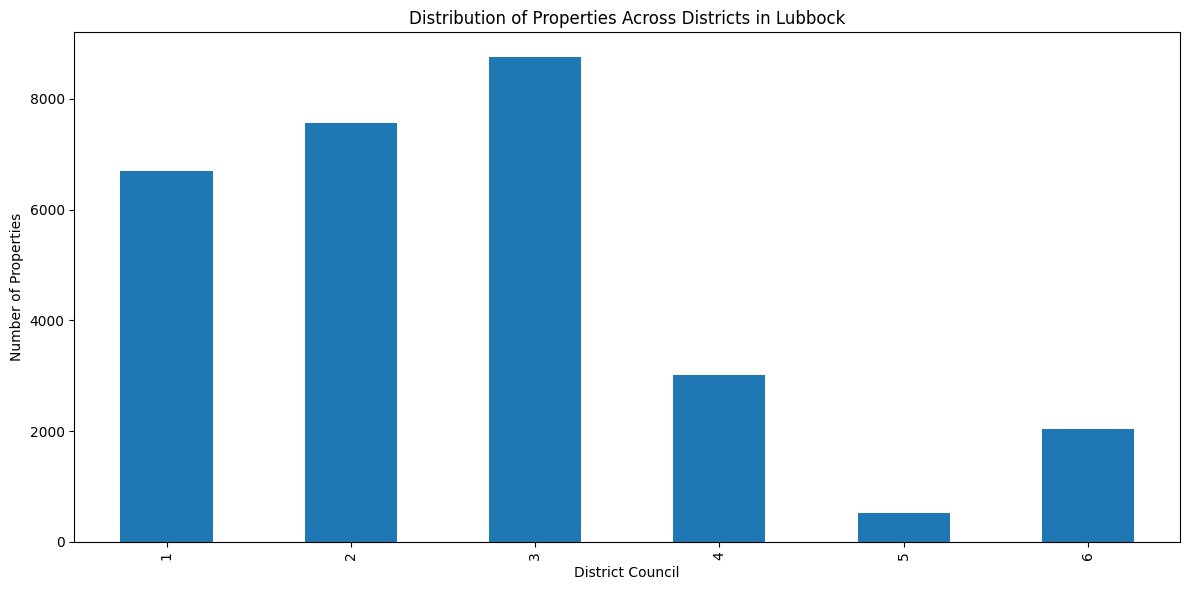

In [ ]:
# Consider only the columns from Lubbock
df = df_[df_['IsInLubbock'] == 1].copy()

# Basic counts and analysis
print("\n1. Basic Property Counts:")
print("-" * 50)
print(f"Total properties in dataset: {len(df_):,}")
print(f"Properties within Lubbock city limits: {len(df):,}")
print(f"Percentage of properties in Lubbock: {(len(df)/len(df_)*100):.2f}%")

# District analysis
print("\n2. District Distribution:")
print("-" * 50)
district_counts = df['IsInDistrictCouncil'].value_counts().sort_index()
print("\nProperties by District:")
for district, count in district_counts.items():
    print(f"District {int(district)}: {count:,} properties ({count/len(df)*100:.2f}%)")

# Zone analysis
print("\n3. Redlining Zone Distribution:")
print("-" * 50)
redlined = len(df[df['IsInRedliningZone'] == 1])
half_mile = len(df[df['IsInHalfMileRedliningZone'] == 1])
one_mile = len(df[df['IsInOneMileRedliningZone'] == 1])
outside = len(df[(df['IsInRedliningZone'] == 0) &
                        (df['IsInHalfMileRedliningZone'] == 0) &
                        (df['IsInOneMileRedliningZone'] == 0)])

print(f"\nRedlined Zone: {redlined:,} properties ({redlined/len(df)*100:.2f}%)")
print(f"Half-Mile Buffer: {half_mile:,} properties ({half_mile/len(df)*100:.2f}%)")
print(f"One-Mile Buffer: {one_mile:,} properties ({one_mile/len(df)*100:.2f}%)")
print(f"Outside All Zones: {outside:,} properties ({outside/len(df)*100:.2f}%)")

# Data availability analysis
print("\n4. Data Availability Analysis:")
print("-" * 50)
year_combinations = df['YearsWithPropertyValues'].value_counts()
print("\nTop 10 most common year combinations:")
for combo, count in year_combinations.head(10).items():
    print(f"{combo}: {count:,} properties")

# Cross-analysis of districts and zones
print("\n5. District and Zone Cross-Analysis:")
print("-" * 50)
cross_analysis = pd.crosstab(df['IsInDistrictCouncil'],
                            [df['IsInRedliningZone']],
                            margins=True)
print("\nProperties in each district by redlining status:")
print(cross_analysis)

# Visualization
plt.figure(figsize=(12, 6))
district_counts.plot(kind='bar')
plt.title('Distribution of Properties Across Districts in Lubbock')
plt.xlabel('District Council')
plt.ylabel('Number of Properties')
plt.tight_layout()
plt.show()

#### Detailed Column Descriptions

**Location and Identification Columns**
* Standard_Address : Physical street address of the property (String format)
* Latitude : Geographic coordinate specifying north-south position (Float, decimal degrees)
* Longitude : Geographic coordinate specifying east-west position (Float, decimal degrees)

**1945 Assessment Data**
* Homestead_1945 : Homestead exemption value for 1945 (Float, in USD)
* TotalValue_1945 : Total assessed value of the property in 1945 (Float, in USD)
* StateTax_1945 : State tax assessment for 1945 (Float, in USD)
* CountyTax_1945 : County tax assessment for 1945 (Float, in USD)
* DistrictSchoolTax_1945 : School district tax assessment for 1945 (Float, in USD)
* TotalTax_1945 : Combined total tax assessment for 1945 (Float, in USD)

**1975 Assessment Data**
* StateValue_1975 : State's assessed value of the property in 1975 (Float, in USD)
* Homestead_1975 : Homestead exemption value for 1975 (Float, in USD)
* TotalValue_1975 : Total assessed value of the property in 1975 (Float, in USD)
* StateTax_1975 : State tax assessment for 1975 (Float, in USD)
* CountyTax_1975 : County tax assessment for 1975 (Float, in USD)
* DistrictSchoolTax_1975 : School district tax assessment for 1975 (Float, in USD)
* TotalTax_1975 : Combined total tax assessment for 1975 (Float, in USD)

**1985 Assessment Data**
* LandValue_1985 : Assessed value of the land only in 1985 (Float, in USD)
* BuildingValue_1985 : Assessed value of buildings/structures in 1985 (Float, in USD)
* SpecialFeaturesValue_1985 : Value of special property features in 1985 (Float, in USD)
* TotalValue_1985 : Total assessed value of the property in 1985 (Float, in USD)
* Homestead_1985 : Homestead exemption value for 1985 (Float, in USD)
* School_1985 : School district identifier or assessment in 1985 (Float)
* CountyPropertyValue_1985 : County's assessed property value in 1985 (Float, in USD)
* CityPropertyValue_1985 : City's assessed property value in 1985 (Float, in USD)
* DistrictSchoolTax_1985 : School district tax assessment for 1985 (Float, in USD)
* CityTax_1985 : City tax assessment for 1985 (Float, in USD)
* LCHDTax_1985 : LCHD (Likely Lubbock County Hospital District) tax for 1985 (Float, in USD)
* CountyTax_1985 : County tax assessment for 1985 (Float, in USD)
* TotalTax_1985 : Combined total tax assessment for 1985 (Float, in USD)

**2012 Assessment Data**
* TotalValue_2012 : Total assessed value of the property in 2012 (Float, in USD)
* LandValue_2012 : Assessed value of the land only in 2012 (Float, in USD)
* ImpValue_2012 : Value of improvements to the property in 2012 (Float, in USD)
* LandSizeAC_2012 : Size of the property in acres in 2012 (Float)
* LandSizeFT_2012 : Size of the property in square feet in 2012 (Float)
* YearBuilt_2012 : Year the primary structure was built, as recorded in 2012 (Float)

**2020 Assessment Data**
* TotalValue_2020 : Total assessed value of the property in 2020 (Float, in USD)
* LandValue_2020 : Assessed value of the land only in 2020 (Float, in USD)
* ImpValue_2020 : Value of improvements to the property in 2020 (Float, in USD)
* LandSizeAC_2020 : Size of the property in acres in 2020 (Float)
* LandSizeFT_2020 : Size of the property in square feet in 2020 (Float)
* YearBuilt_2020 : Year the primary structure was built, as recorded in 2020 (Float)

**2021 Assessment Data**
* TotalValue_2021 : Total assessed value of the property in 2021 (Float, in USD)
* LandValue_2021 : Assessed value of the land only in 2021 (Float, in USD)
* ImpValue_2021 : Value of improvements to the property in 2021 (Float, in USD)
* LandSizeAC_2021 : Size of the property in acres in 2021 (Float)
* LandSizeFT_2021 : Size of the property in square feet in 2021 (Float)
* YearBuilt_2021 : Year the primary structure was built, as recorded in 2021 (Float)

**Historical and Geographic Indicators**
* YearsWithPropertyValues : String indicating which years have property value data (String)
* IsInRedliningZone : Binary indicator if property is within a historical redlining zone (Integer: 0 or 1)
* IsInHalfMileRedliningZone : Binary indicator if property is within 0.5 miles of a redlining zone (Integer: 0 or 1)
* IsInOneMileRedliningZone : Binary indicator if property is within 1 mile of a redlining zone (Integer: 0 or 1)
* IsInDistrictCouncil : Indicates which district council zone the property belongs to (Integer: 0-6, where 0 means not in any council zone, 1-6 represent specific district council zones)
* IsInLubbock : Binary indicator if property is within Lubbock city limits (Integer: 0 or 1)

#### Important Dataset Column Information



**Property Value Tracking**
- The dataset tracks property values across different years through specific columns:
  - TotalValue_1945
  - TotalValue_1975
  - TotalValue_1985
  - TotalValue_2012
  - TotalValue_2020
  - TotalValue_2021

**YearsWithPropertyValues Column**
- This column is directly derived from the presence of values in the above TotalValue columns
- Format: Space-separated string of years (e.g., "1945 1975 2012")
- Example: If a property has "1945 2012 2020 2021" in YearsWithPropertyValues, it means we have valid TotalValue data for exactly those years
- Empty string indicates no historical value data is available
- When analyzing property values across time, only use years listed in this column for each property

**Redlining Zone Information**
The dataset contains three important columns related to redlining zones:

**1. IsInRedliningZone**
- Binary indicator (0 or 1)
- 1: Property is located within the historical redlining zone
- 0: Property is not in the redlining zone
- This zone represents areas where Black residents were historically concentrated due to Jim Crow laws
- The area is also characterized by industrial development

**2. IsInHalfMileRedliningZone**
- Binary indicator (0 or 1)
- 1: Property is within half-mile buffer of redlining zone (BUT NOT in redlining zone itself)
- 0: Property is either in redlining zone or outside half-mile buffer
- To get all properties within redlining zone + half-mile buffer:
  * Count properties where IsInRedliningZone = 1 OR IsInHalfMileRedliningZone = 1

**3. IsInOneMileRedliningZone**
- Binary indicator (0 or 1)
- 1: Property is within one-mile buffer of redlining zone (BUT NOT in redlining zone itself)
- 0: Property is either in redlining zone or outside one-mile buffer
- Half-mile zone is a subset of one-mile zone
- To get all properties within redlining zone + one-mile buffer:
  * Count properties where IsInRedliningZone = 1 OR IsInOneMileRedliningZone = 1
- Important: Do NOT add all three columns (IsInRedliningZone + IsInHalfMileRedliningZone + IsInOneMileRedliningZone)


---
**District Council Information**
**IsInDistrictCouncil**
- Values range from 0 to 6
- 0: Property is not in any district council
- 1-6: Indicates specific district council number
- All values are mutually exclusive (a property can only be in one council)

**Historical Context**
- The redlining zones were established under Jim Crow laws
- These areas historically had high concentrations of Black residents
- The zones overlap with industrial areas
- Current trends show population movement away from these areas
- Understanding these patterns is crucial for analyzing property values and demographic changes

**Analysis Considerations**
1. When comparing property values across years:
   - Only use years listed in YearsWithPropertyValues
   - Be aware of data availability patterns
   - Consider the historical context of each time period

2. When analyzing redlining impact:
   - Consider both direct (IsInRedliningZone) and proximity (buffer zones) effects
   - Remember buffer zones are exclusive of redlining zone properties
   - Account for industrial zone overlap

3. For spatial analysis:
   - Consider district council boundaries
   - Account for Lubbock city limits
   - Consider the relationship between redlining zones and district councils

### Step 2: Different Analyses

#### 1. tell_district_redlining_story

In [ ]:
# Set plotting style
plt.style.use('default')
sns.set_theme()

def tell_district_redlining_story(df):

    # Part 1: Overview of Districts and Redlining
    def analyze_district_overview():
        print("\nChapter 1: Understanding Our Districts")
        print("-" * 50)

        # Calculate district-level statistics
        district_stats = df.groupby('IsInDistrictCouncil').agg({
            'IsInRedliningZone': 'sum',
            'IsInHalfMileRedliningZone': 'sum',
            'IsInOneMileRedliningZone': 'sum',
            'Standard_Address': 'count'
        }).reset_index()

        district_stats.columns = ['District', 'Redlined_Properties',
                                'HalfMile_Properties', 'OneMile_Properties',
                                'Total_Properties']

        # Calculate percentages
        for col in ['Redlined_Properties', 'HalfMile_Properties', 'OneMile_Properties']:
            district_stats[f'{col}_Pct'] = (district_stats[col] /
                                          district_stats['Total_Properties'] * 100).round(2)

        # Create visualization
        plt.figure(figsize=(15, 6))
        x = range(len(district_stats))
        width = 0.25

        plt.bar(x, district_stats['Redlined_Properties_Pct'], width,
               label='Redlined Zone', color='red', alpha=0.7)
        plt.bar([i + width for i in x], district_stats['HalfMile_Properties_Pct'],
               width, label='Half-Mile Buffer', color='orange', alpha=0.7)
        plt.bar([i + width * 2 for i in x], district_stats['OneMile_Properties_Pct'],
               width, label='One-Mile Buffer', color='yellow', alpha=0.7)

        plt.xlabel('District Council')
        plt.ylabel('Percentage of Properties')
        plt.title('Distribution of Redlining Impact Across Districts')
        plt.xticks([i + width for i in x], district_stats['District'])
        plt.legend()
        plt.tight_layout()
        plt.show()

        # Print narrative insights
        for _, row in district_stats.iterrows():
            if row['District'] == 0:
                print(f"\nProperties Outside Council Districts:")
            else:
                print(f"\nDistrict {int(row['District'])}:")
            print(f"- Total Properties: {row['Total_Properties']}")
            print(f"- Directly Redlined: {row['Redlined_Properties_Pct']:.1f}%")
            print(f"- In Half-Mile Buffer: {row['HalfMile_Properties_Pct']:.1f}%")
            print(f"- In One-Mile Buffer: {row['OneMile_Properties_Pct']:.1f}%")

        return district_stats

    # Part 2: Property Value Analysis
    def analyze_property_values():
        print("\nChapter 2: The Story of Property Values")
        print("-" * 50)

        # Filter for 2021 data
        mask_2021 = df['YearsWithPropertyValues'].str.contains('2021', na=False)
        df_2021 = df[mask_2021].copy()

        # Calculate median values by district and zone
        value_analysis = df_2021.pivot_table(
            values='TotalValue_2021',
            index='IsInDistrictCouncil',
            columns=['IsInRedliningZone'],
            aggfunc='median'
        ).round(2)

        # Create visualization
        plt.figure(figsize=(15, 6))
        value_analysis.plot(kind='bar', width=0.8)
        plt.title('Median Property Values: Redlined vs Non-Redlined Areas by District (2021)')
        plt.xlabel('District Council')
        plt.ylabel('Median Property Value ($)')
        plt.legend(['Non-Redlined', 'Redlined'])
        plt.tight_layout()
        plt.show()

        # Print narrative insights
        for district in value_analysis.index:
            if district == 0:
                print(f"\nOutside Council Districts:")
            else:
                print(f"\nDistrict {int(district)}:")

            try:
                redlined_value = value_analysis.loc[district, 1]
                non_redlined_value = value_analysis.loc[district, 0]
                difference = ((redlined_value - non_redlined_value) /
                            non_redlined_value * 100)

                print(f"- Median Value (Redlined): ${redlined_value:,.2f}")
                print(f"- Median Value (Non-Redlined): ${non_redlined_value:,.2f}")
                print(f"- Value Gap: {difference:.1f}%")
            except:
                print("- Insufficient data for comparison")

        return value_analysis

    # Part 3: Historical Trends
    def analyze_historical_trends():
        print("\nChapter 3: The Historical Journey")
        print("-" * 50)

        # Create time series for properties with data in multiple years
        years = ['1945', '1975', '1985', '2012', '2020', '2021']
        value_cols = [f'TotalValue_{year}' for year in years]

        # Calculate median values by district and year
        historical_values = pd.DataFrame(index=range(7))  # Explicitly create index for all districts 0-6
        for year in years:
            mask_year = df['YearsWithPropertyValues'].str.contains(year, na=False)
            year_data = df[mask_year].groupby('IsInDistrictCouncil')[f'TotalValue_{year}'].median()
            historical_values[year] = year_data

        # Create visualization
        plt.figure(figsize=(15, 6))
        historical_values.T.plot(marker='o')  # Keep the simple plotting approach
        plt.title('Historical Property Value Trends by District')
        plt.xlabel('Year')
        plt.ylabel('Median Property Value ($)')
        plt.legend(title='District',
                  labels=[f'District {int(d)}' if d != 0 else 'Outside Districts'
                        for d in range(7)])  # Explicitly create labels for all districts
        plt.tight_layout()
        plt.show()

        # Print narrative insights
        for district in range(7):  # Iterate through all districts 0-6
            if district == 0:
                print(f"\nOutside Council Districts:")
            else:
                print(f"\nDistrict {int(district)}:")

            # Calculate growth rates
            values = historical_values.loc[district]
            first_valid = values.first_valid_index()  # This will get first non-NaN year
            last_valid = values.last_valid_index()

            if first_valid and last_valid:
                total_growth = ((values[last_valid] - values[first_valid]) /
                              values[first_valid] * 100)
                print(f"- Total Growth ({first_valid} to {last_valid}): {total_growth:.1f}%")
                print(f"- Current Median Value (2021): ${values['2021']:,.2f}")
            else:
                print("- Insufficient historical data")

        return historical_values

    # Execute the analysis
    print("\nAnalyzing the impact of historical redlining across Lubbock's districts...")
    district_stats = analyze_district_overview()
    value_analysis = analyze_property_values()
    historical_trends = analyze_historical_trends()

    # Return all results for further analysis if needed
    return {
        'district_stats': district_stats,
        'value_analysis': value_analysis,
        'historical_trends': historical_trends
    }

# Function to run the analysis
def run_district_analysis():
    # Run the analysis
    results = tell_district_redlining_story(df)

    return results


Analyzing the impact of historical redlining across Lubbock's districts...

Chapter 1: Understanding Our Districts
--------------------------------------------------


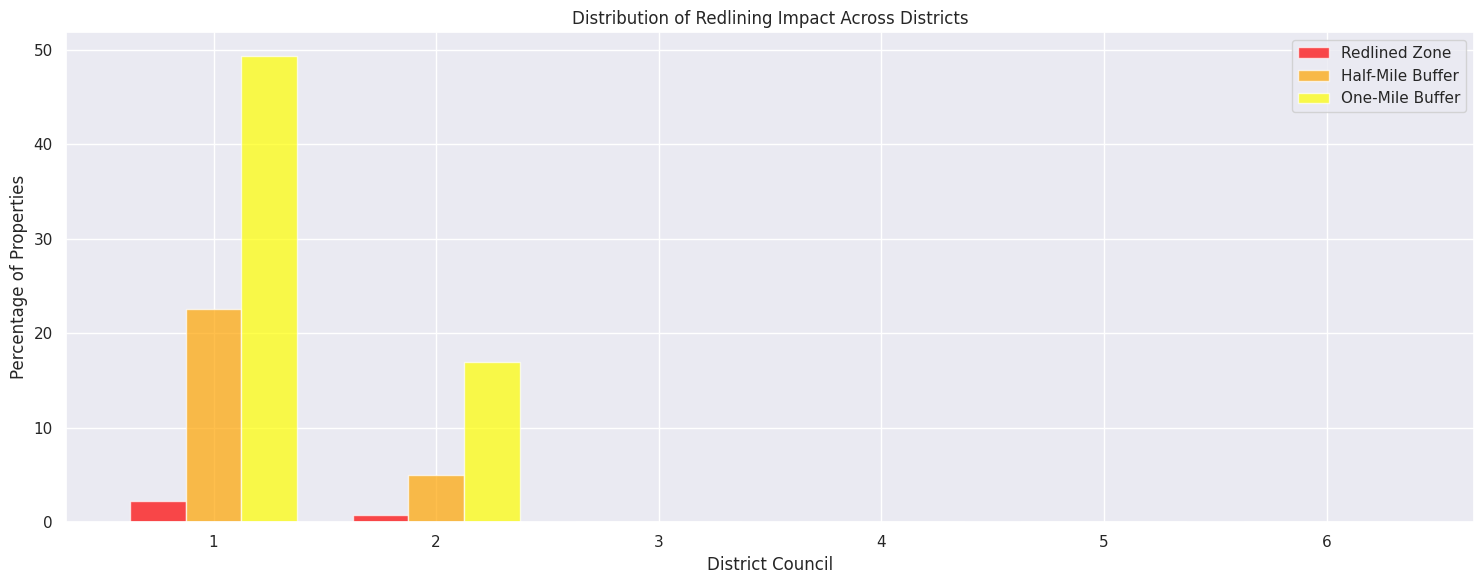


District 1:
- Total Properties: 6704.0
- Directly Redlined: 2.2%
- In Half-Mile Buffer: 22.5%
- In One-Mile Buffer: 49.4%

District 2:
- Total Properties: 7566.0
- Directly Redlined: 0.7%
- In Half-Mile Buffer: 5.0%
- In One-Mile Buffer: 17.0%

District 3:
- Total Properties: 8766.0
- Directly Redlined: 0.0%
- In Half-Mile Buffer: 0.0%
- In One-Mile Buffer: 0.0%

District 4:
- Total Properties: 3015.0
- Directly Redlined: 0.0%
- In Half-Mile Buffer: 0.0%
- In One-Mile Buffer: 0.0%

District 5:
- Total Properties: 516.0
- Directly Redlined: 0.0%
- In Half-Mile Buffer: 0.0%
- In One-Mile Buffer: 0.0%

District 6:
- Total Properties: 2044.0
- Directly Redlined: 0.0%
- In Half-Mile Buffer: 0.0%
- In One-Mile Buffer: 0.0%

Chapter 2: The Story of Property Values
--------------------------------------------------


<Figure size 1500x600 with 0 Axes>

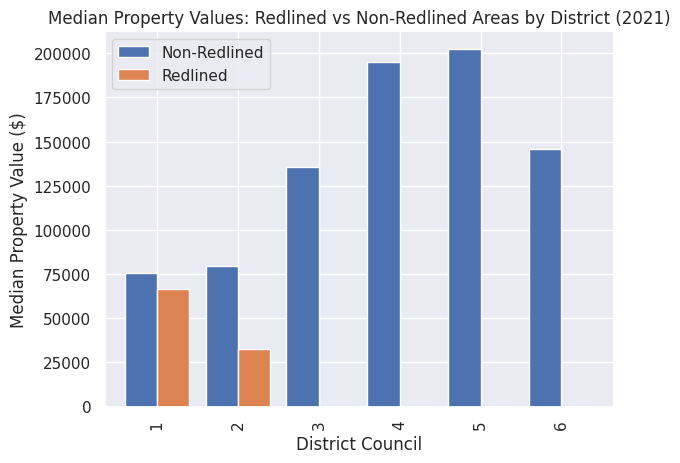


District 1:
- Median Value (Redlined): $66,669.50
- Median Value (Non-Redlined): $75,408.50
- Value Gap: -11.6%

District 2:
- Median Value (Redlined): $32,594.00
- Median Value (Non-Redlined): $79,518.50
- Value Gap: -59.0%

District 3:
- Median Value (Redlined): $nan
- Median Value (Non-Redlined): $135,802.00
- Value Gap: nan%

District 4:
- Median Value (Redlined): $nan
- Median Value (Non-Redlined): $195,137.50
- Value Gap: nan%

District 5:
- Median Value (Redlined): $nan
- Median Value (Non-Redlined): $202,260.50
- Value Gap: nan%

District 6:
- Median Value (Redlined): $nan
- Median Value (Non-Redlined): $145,489.00
- Value Gap: nan%

Chapter 3: The Historical Journey
--------------------------------------------------


<Figure size 1500x600 with 0 Axes>

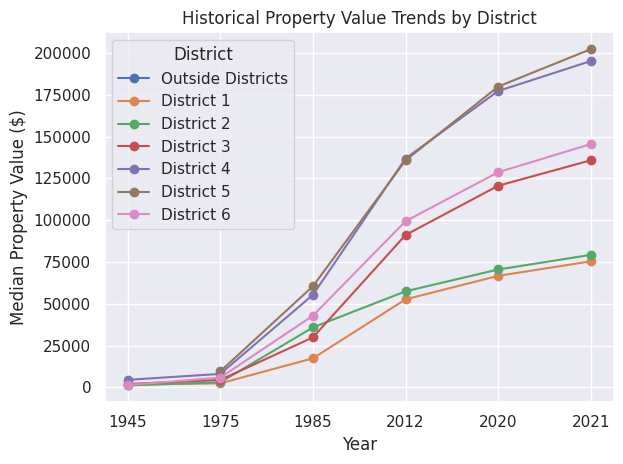


Outside Council Districts:
- Insufficient historical data

District 1:
- Total Growth (1945 to 2021): 4333.2%
- Current Median Value (2021): $75,364.50

District 2:
- Total Growth (1945 to 2021): 6790.3%
- Current Median Value (2021): $79,239.00

District 3:
- Total Growth (1945 to 2021): 6690.1%
- Current Median Value (2021): $135,802.00

District 4:
- Total Growth (1945 to 2021): 4236.4%
- Current Median Value (2021): $195,137.50

District 5:
- Total Growth (1975 to 2021): 2003.6%
- Current Median Value (2021): $202,260.50

District 6:
- Total Growth (1945 to 2021): 10292.1%
- Current Median Value (2021): $145,489.00


In [ ]:
# Run the complete analysis
results = run_district_analysis()

In [ ]:
# Debugging function
def debug_district_5_data(df):
    years = ['1945', '1975', '1985', '2012', '2020', '2021']

    # 1. Check how many properties are in District 5
    district_5_count = len(df[df['IsInDistrictCouncil'] == 5])
    print(f"\nTotal properties in District 5: {district_5_count}")

    # 2. Check data availability for each year
    print("\nData availability for District 5 by year:")
    for year in years:
        mask_year = df['YearsWithPropertyValues'].str.contains(year, na=False)
        district_5_year = df[(df['IsInDistrictCouncil'] == 5) & mask_year]
        print(f"\nYear {year}:")
        print(f"Number of properties: {len(district_5_year)}")
        print(f"Median value: ${district_5_year[f'TotalValue_{year}'].median():,.2f}")

    # 3. Print the actual data rows for District 5
    print("\nSample of District 5 properties:")
    district_5_data = df[df['IsInDistrictCouncil'] == 5].head()
    print(district_5_data[['YearsWithPropertyValues'] + [f'TotalValue_{year}' for year in years]])

    # 4. Check for any potential data quality issues
    print("\nChecking for potential issues:")
    district_5_all = df[df['IsInDistrictCouncil'] == 5]
    print(f"Properties with no year data: {len(district_5_all[district_5_all['YearsWithPropertyValues'] == ''])}")
    print(f"Properties with null values: {len(district_5_all[district_5_all['YearsWithPropertyValues'].isnull()])}")

# Run the debugging
debug_district_5_data(df)


Total properties in District 5: 516

Data availability for District 5 by year:

Year 1945:
Number of properties: 0
Median value: $nan

Year 1975:
Number of properties: 210
Median value: $9,615.00

Year 1985:
Number of properties: 316
Median value: $60,463.00

Year 2012:
Number of properties: 516
Median value: $135,765.00

Year 2020:
Number of properties: 514
Median value: $179,882.50

Year 2021:
Number of properties: 514
Median value: $202,260.50

Sample of District 5 properties:
      YearsWithPropertyValues  TotalValue_1945  TotalValue_1975  TotalValue_1985  TotalValue_2012  \
14670     1975 2012 2020 2021              NaN           9960.0              NaN         130690.0   
14732     1975 2012 2020 2021              NaN           9530.0              NaN         179696.0   
14749     1975 2012 2020 2021              NaN           1950.0              NaN         186123.0   
14775     1975 2012 2020 2021              NaN          14720.0              NaN         315465.0   
14786    

In [ ]:
def analyze_property_values_detailed(df):
    """
    Comprehensive analysis of property values across all time periods.
    """
    print("\nChapter 2: The Comprehensive Story of Property Values")
    print("=" * 70)

    # Create zone labels
    def create_zone_labels(row):
        if row['IsInRedliningZone'] == 1:
            return 'Redlined'
        elif row['IsInHalfMileRedliningZone'] == 1:
            return 'Half-Mile Buffer'
        elif row['IsInOneMileRedliningZone'] == 1:
            return 'One-Mile Buffer'
        else:
            return 'Outside'

    df['Zone'] = df.apply(create_zone_labels, axis=1)
    years = ['1945', '1975', '1985', '2012', '2020', '2021']

    # Create a DataFrame to store median values over time
    median_values = pd.DataFrame()

    for year in years:
        # Filter for properties with data in this year
        mask_year = df['YearsWithPropertyValues'].str.contains(year, na=False)
        year_data = df[mask_year].copy()

        # Calculate median values for each zone
        medians = year_data.groupby('Zone')[f'TotalValue_{year}'].median()
        median_values[year] = medians

    # Plotting the trends
    plt.figure(figsize=(15, 8))
    for zone in median_values.index:
        plt.plot(years, median_values.loc[zone], 'o-', label=zone, linewidth=2, markersize=8)

    plt.title('Median Property Values by Zone Across Years', fontsize=14)
    plt.xlabel('Year', fontsize=12)
    plt.ylabel('Median Property Value ($)', fontsize=12)
    plt.legend(title='Zone', fontsize=10)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.xticks(rotation=45)

    # Format y-axis to show dollars
    current_values = plt.gca().get_yticks()
    plt.gca().set_yticklabels(['${:,.0f}'.format(x) for x in current_values])

    plt.tight_layout()
    plt.show()

    # Print analysis of trends
    print("\nTrend Analysis:")
    print("-" * 50)

    # Calculate and print growth rates between consecutive periods
    for zone in median_values.index:
        print(f"\n{zone} Zone Analysis:")
        print("-" * 30)

        # Overall growth
        first_valid_value = median_values.loc[zone].first_valid_index()
        last_valid_value = median_values.loc[zone].last_valid_index()
        if first_valid_value and last_valid_value:
            total_growth = ((median_values.loc[zone, last_valid_value] -
                           median_values.loc[zone, first_valid_value]) /
                          median_values.loc[zone, first_valid_value] * 100)
            print(f"Total Growth ({first_valid_value} to {last_valid_value}): {total_growth:,.1f}%")

            # Print values for each year
            print("\nMedian Values by Year:")
            for year in years:
                if not pd.isna(median_values.loc[zone, year]):
                    print(f"{year}: ${median_values.loc[zone, year]:,.2f}")

            # Calculate period-by-period growth
            print("\nPeriod Growth Rates:")
            for i in range(len(years)-1):
                year1, year2 = years[i], years[i+1]
                if not pd.isna(median_values.loc[zone, year1]) and not pd.isna(median_values.loc[zone, year2]):
                    period_growth = ((median_values.loc[zone, year2] -
                                    median_values.loc[zone, year1]) /
                                   median_values.loc[zone, year1] * 100)
                    print(f"{year1} to {year2}: {period_growth:,.1f}%")

    # Additional analysis: Value gaps between zones
    print("\nValue Gaps Between Zones:")
    print("-" * 50)

    for year in years:
        if not median_values[year].isna().all():
            print(f"\n{year} Analysis:")
            redlined_value = median_values.loc['Redlined', year]
            outside_value = median_values.loc['Outside', year]

            if not pd.isna(redlined_value) and not pd.isna(outside_value):
                gap = ((outside_value - redlined_value) / redlined_value * 100)
                print(f"Value Gap (Outside vs Redlined): {gap:,.1f}%")
                print(f"Redlined Median: ${redlined_value:,.2f}")
                print(f"Outside Median: ${outside_value:,.2f}")
                print(f"Absolute Gap: ${outside_value - redlined_value:,.2f}")

    return median_values

# Function to run the analysis
def run_property_value_analysis():

    # Run the analysis
    results = analyze_property_values_detailed(df)

    return results


Chapter 2: The Comprehensive Story of Property Values


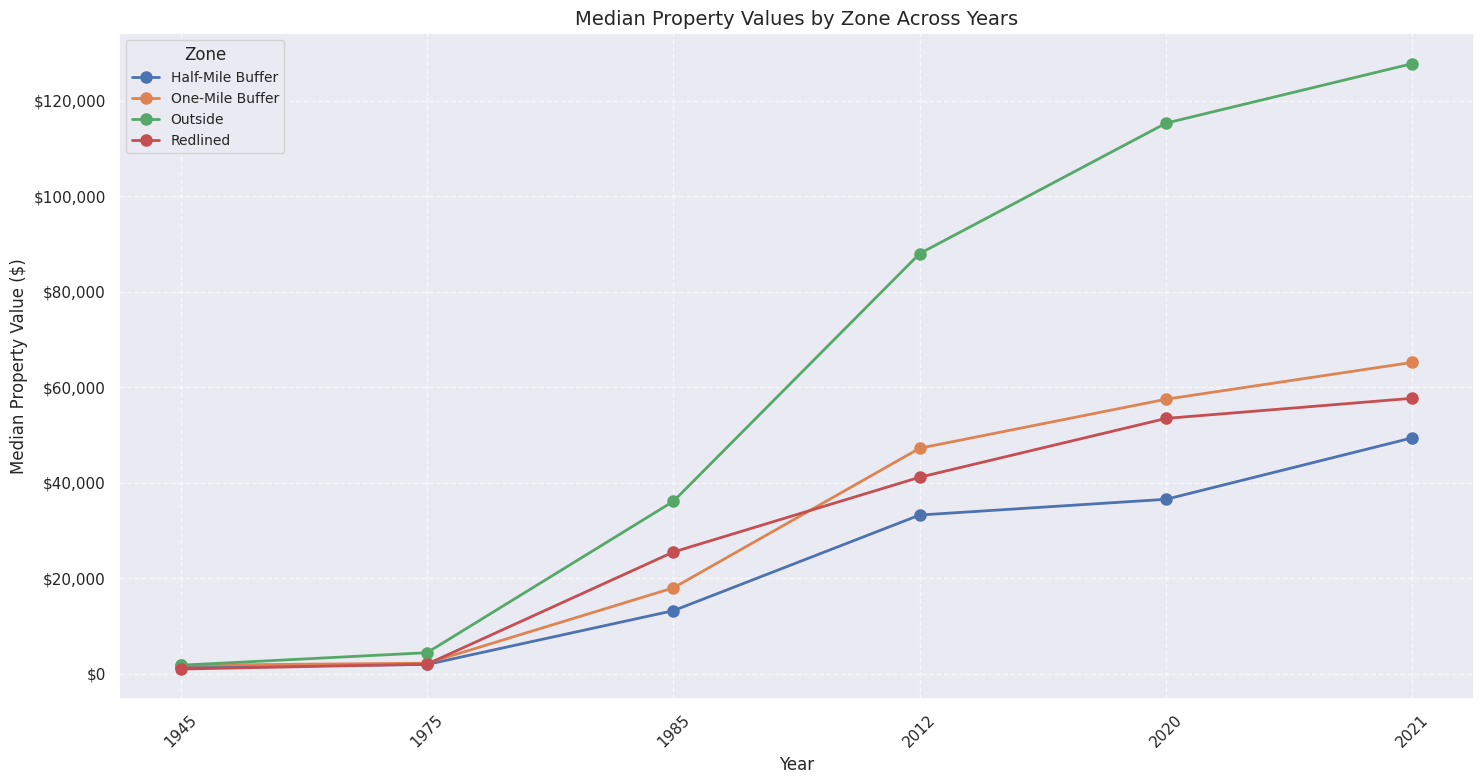


Trend Analysis:
--------------------------------------------------

Half-Mile Buffer Zone Analysis:
------------------------------
Total Growth (1945 to 2021): 3,430.9%

Median Values by Year:
1945: $1,400.00
1975: $1,960.00
1985: $13,230.00
2012: $33,261.00
2020: $36,557.00
2021: $49,433.00

Period Growth Rates:
1945 to 1975: 40.0%
1975 to 1985: 575.0%
1985 to 2012: 151.4%
2012 to 2020: 9.9%
2020 to 2021: 35.2%

One-Mile Buffer Zone Analysis:
------------------------------
Total Growth (1945 to 2021): 3,524.0%

Median Values by Year:
1945: $1,800.00
1975: $2,230.00
1985: $18,008.50
2012: $47,252.50
2020: $57,518.00
2021: $65,232.00

Period Growth Rates:
1945 to 1975: 23.9%
1975 to 1985: 707.6%
1985 to 2012: 162.4%
2012 to 2020: 21.7%
2020 to 2021: 13.4%

Outside Zone Analysis:
------------------------------
Total Growth (1945 to 2021): 7,000.3%

Median Values by Year:
1945: $1,800.00
1975: $4,430.00
1985: $36,135.00
2012: $88,024.00
2020: $115,339.50
2021: $127,805.00

Period Growth 

In [ ]:
# Run the detailed property value analysis
results = run_property_value_analysis()

#### 2. Analyzing Property Values in Depth

##### A. Single Year Deep Analysis (For each year: 1945, 1975, 1985, 2012, 2020, 2021)

**1. Zone-Specific Patterns**

In [ ]:
def analyze_zone_patterns(df):
    """
    Detailed analysis of zone-specific patterns in property values
    """
    print("\nA.1: Zone-Specific Patterns Analysis")
    print("=" * 70)

    # Create zone labels
    def create_zone_labels(row):
        if row['IsInRedliningZone'] == 1:
            return 'Redlined'
        elif row['IsInHalfMileRedliningZone'] == 1:
            return 'Half-Mile Buffer'
        elif row['IsInOneMileRedliningZone'] == 1:
            return 'One-Mile Buffer'
        else:
            return 'Outside'

    df['Zone'] = df.apply(create_zone_labels, axis=1)
    years = ['1945', '1975', '1985', '2012', '2020', '2021']

    def analyze_year(year):
        """Analyze patterns for a specific year"""
        print(f"\nAnalyzing {year}")
        print("-" * 50)

        # Filter for properties with data in this year
        mask_year = df['YearsWithPropertyValues'].str.contains(str(year), na=False)
        df_year = df[mask_year].copy()
        value_col = f'TotalValue_{year}'

        # Remove zeros and nulls for analysis
        df_year = df_year[df_year[value_col] > 0]

        if len(df_year) == 0:
            print(f"No valid data available for {year}")
            return None

        # 1. Basic Distribution Statistics
        stats_by_zone = df_year.groupby('Zone')[value_col].agg([
            'count', 'mean', 'median', 'std',
            lambda x: x.quantile(0.25),
            lambda x: x.quantile(0.75)
        ]).round(2)
        stats_by_zone.columns = ['Count', 'Mean', 'Median', 'Std', 'Q1', 'Q3']

        # Add coefficient of variation where mean is not zero
        stats_by_zone['CV'] = (stats_by_zone['Std'] / stats_by_zone['Mean']).round(3)

        # 2. Visualizations
        fig = plt.figure(figsize=(20, 10))
        gs = plt.GridSpec(2, 2)

        # a) Box plot with individual points
        ax1 = fig.add_subplot(gs[0, 0])
        sns.boxplot(data=df_year, x='Zone', y=value_col, ax=ax1)
        ax1.set_title(f'Property Value Distribution by Zone ({year})')
        ax1.set_ylabel('Property Value ($)')
        ax1.tick_params(axis='x', rotation=45)

        # b) Violin plot
        ax2 = fig.add_subplot(gs[0, 1])
        sns.violinplot(data=df_year, x='Zone', y=value_col, ax=ax2)
        ax2.set_title(f'Value Distribution Shape by Zone ({year})')
        ax2.set_ylabel('Property Value ($)')
        ax2.tick_params(axis='x', rotation=45)

        # c) Distribution plot
        ax3 = fig.add_subplot(gs[1, :])
        for zone in df_year['Zone'].unique():
            zone_data = df_year[df_year['Zone'] == zone][value_col]
            if len(zone_data) > 0:  # Only plot if we have data
                sns.kdeplot(data=zone_data, label=zone, ax=ax3)
        ax3.set_title(f'Property Value Density by Zone ({year})')
        ax3.set_xlabel('Property Value ($)')
        ax3.legend()

        plt.tight_layout()
        plt.show()

        # 3. Statistical Analysis
        print(f"\nStatistical Summary for {year}:")
        print(stats_by_zone)

        # 4. Value Range Analysis
        print("\nValue Range Analysis:")
        for zone in df_year['Zone'].unique():
            zone_data = df_year[df_year['Zone'] == zone][value_col]
            if len(zone_data) > 0:
                min_val = zone_data.min()
                if min_val > 0:
                    range_pct = ((zone_data.max() - min_val) / min_val * 100)
                    print(f"\n{zone}:")
                    print(f"- Range: ${min_val:,.2f} to ${zone_data.max():,.2f}")
                    print(f"- Range Percentage: {range_pct:,.1f}%")
                    print(f"- Interquartile Range: ${(zone_data.quantile(0.75) - zone_data.quantile(0.25)):,.2f}")
                else:
                    print(f"\n{zone}: Cannot calculate range percentage (minimum value is zero)")
            else:
                print(f"\n{zone}: No valid data available")

        # 5. Statistical Tests
        # Only perform if we have at least two zones with data
        zones_with_data = [zone for zone in df_year['Zone'].unique()
                          if len(df_year[df_year['Zone'] == zone][value_col]) > 0]
        if len(zones_with_data) >= 2:
            print("\nStatistical Tests:")
            # Kruskal-Wallis H-test
            groups = [group[value_col].values for name, group in df_year.groupby('Zone')
                     if len(group[value_col]) > 0]
            h_stat, p_value = stats.kruskal(*groups)
            print(f"Kruskal-Wallis test: H-statistic = {h_stat:.2f}, p-value = {p_value:.4f}")

        # 6. Value Clustering Analysis
        print("\nValue Clustering Analysis:")
        for zone in df_year['Zone'].unique():
            zone_data = df_year[df_year['Zone'] == zone][value_col]
            if len(zone_data) > 0:
                q1, q2, q3 = zone_data.quantile([0.25, 0.5, 0.75])
                low_values = len(zone_data[zone_data <= q1])
                mid_low_values = len(zone_data[(zone_data > q1) & (zone_data <= q2)])
                mid_high_values = len(zone_data[(zone_data > q2) & (zone_data <= q3)])
                high_values = len(zone_data[zone_data > q3])

                print(f"\n{zone}:")
                print(f"- Low Value Properties (≤${q1:,.2f}): {low_values:,}")
                print(f"- Mid-Low Value (${q1:,.2f} to ${q2:,.2f}): {mid_low_values:,}")
                print(f"- Mid-High Value (${q2:,.2f} to ${q3:,.2f}): {mid_high_values:,}")
                print(f"- High Value Properties (>${q3:,.2f}): {high_values:,}")
            else:
                print(f"\n{zone}: No data available for clustering analysis")

        # 7. Value Gap Analysis
        if 'Redlined' in df_year['Zone'].values and 'Outside' in df_year['Zone'].values:
            redlined_data = df_year[df_year['Zone'] == 'Redlined'][value_col]
            outside_data = df_year[df_year['Zone'] == 'Outside'][value_col]

            if len(redlined_data) > 0 and len(outside_data) > 0:
                redlined_median = redlined_data.median()
                outside_median = outside_data.median()

                if redlined_median > 0:  # Avoid division by zero
                    gap_pct = ((outside_median - redlined_median) / redlined_median * 100)
                    print("\nRedlining Gap Analysis:")
                    print(f"- Redlined Median: ${redlined_median:,.2f}")
                    print(f"- Outside Median: ${outside_median:,.2f}")
                    print(f"- Value Gap: {gap_pct:,.1f}%")

        return stats_by_zone

    # Analyze each year
    results = {}
    for year in years:
        results[year] = analyze_year(year)

    # Cross-year comparison
    print("\nCross-Year Pattern Analysis")
    print("=" * 50)

    # Create summary DataFrame for trends
    summary_stats = pd.DataFrame()
    for year in years:
        if results[year] is not None:
            year_stats = results[year]['Median'].copy()
            summary_stats[year] = year_stats

    if not summary_stats.empty:
        # Plot trends
        plt.figure(figsize=(15, 8))
        for zone in summary_stats.index:
            zone_data = summary_stats.loc[zone]
            valid_years = zone_data.dropna().index
            if len(valid_years) > 0:
                plt.plot(valid_years, zone_data[valid_years], 'o-',
                        label=zone, linewidth=2, markersize=8)

        plt.title('Median Property Values by Zone Over Time', fontsize=14)
        plt.xlabel('Year', fontsize=12)
        plt.ylabel('Median Property Value ($)', fontsize=12)
        plt.legend(title='Zone', fontsize=10)
        plt.grid(True, linestyle='--', alpha=0.7)
        plt.xticks(rotation=45)

        # Format y-axis to show dollars
        current_values = plt.gca().get_yticks()
        plt.gca().set_yticklabels(['${:,.0f}'.format(x) for x in current_values])

        plt.tight_layout()
        plt.show()

    return results

# Function to run the analysis
def run_zone_analysis():
    # Run the analysis
    results = analyze_zone_patterns(df)

    return results


A.1: Zone-Specific Patterns Analysis

Analyzing 1945
--------------------------------------------------


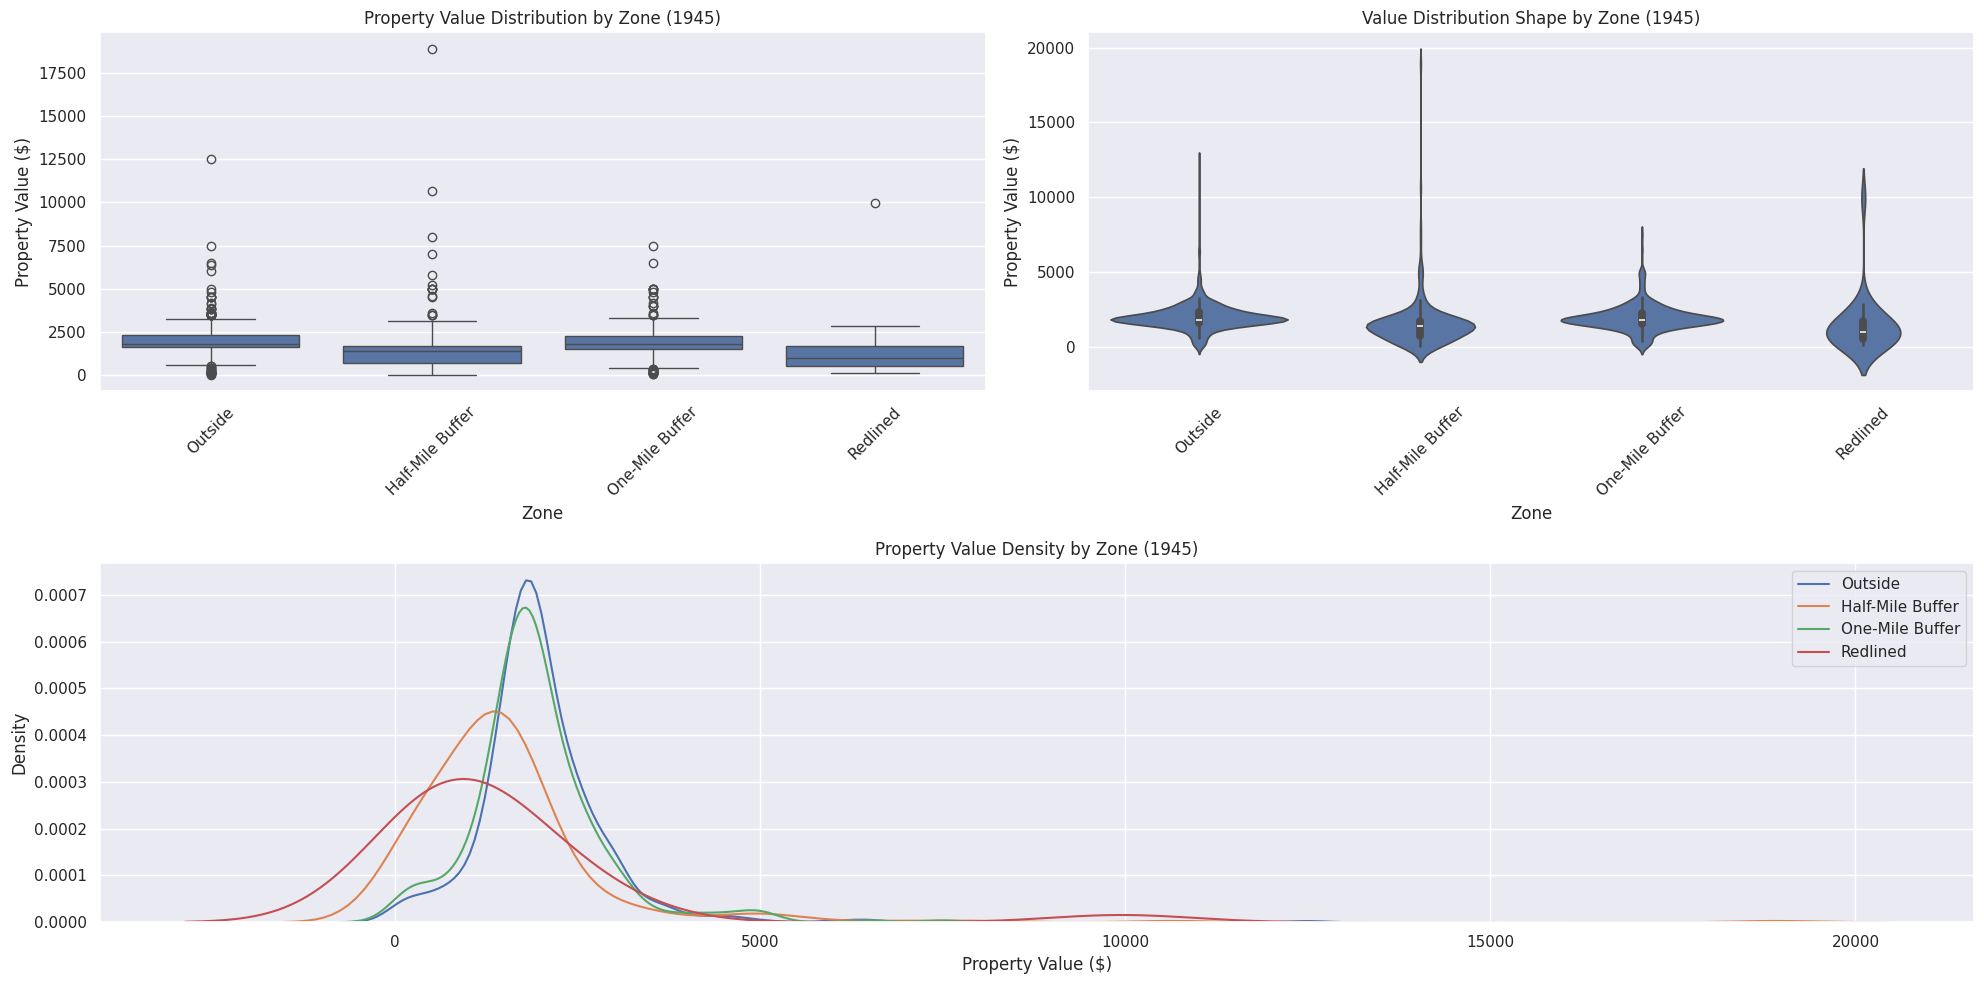


Statistical Summary for 1945:
                  Count     Mean  Median      Std      Q1      Q3     CV
Zone                                                                    
Half-Mile Buffer    278  1522.95  1400.0  1599.48   727.5  1700.0  1.050
One-Mile Buffer     380  1933.24  1800.0   898.91  1500.0  2250.0  0.465
Outside             639  1991.46  1800.0   902.22  1600.0  2300.0  0.453
Redlined             26  1430.38  1000.0  1901.78   500.0  1700.0  1.330

Value Range Analysis:

Outside:
- Range: $10.00 to $12,500.00
- Range Percentage: 124,900.0%
- Interquartile Range: $700.00

Half-Mile Buffer:
- Range: $30.00 to $18,900.00
- Range Percentage: 62,900.0%
- Interquartile Range: $972.50

One-Mile Buffer:
- Range: $60.00 to $7,500.00
- Range Percentage: 12,400.0%
- Interquartile Range: $750.00

Redlined:
- Range: $100.00 to $9,950.00
- Range Percentage: 9,850.0%
- Interquartile Range: $1,200.00

Statistical Tests:
Kruskal-Wallis test: H-statistic = 160.32, p-value = 0.0000

Valu

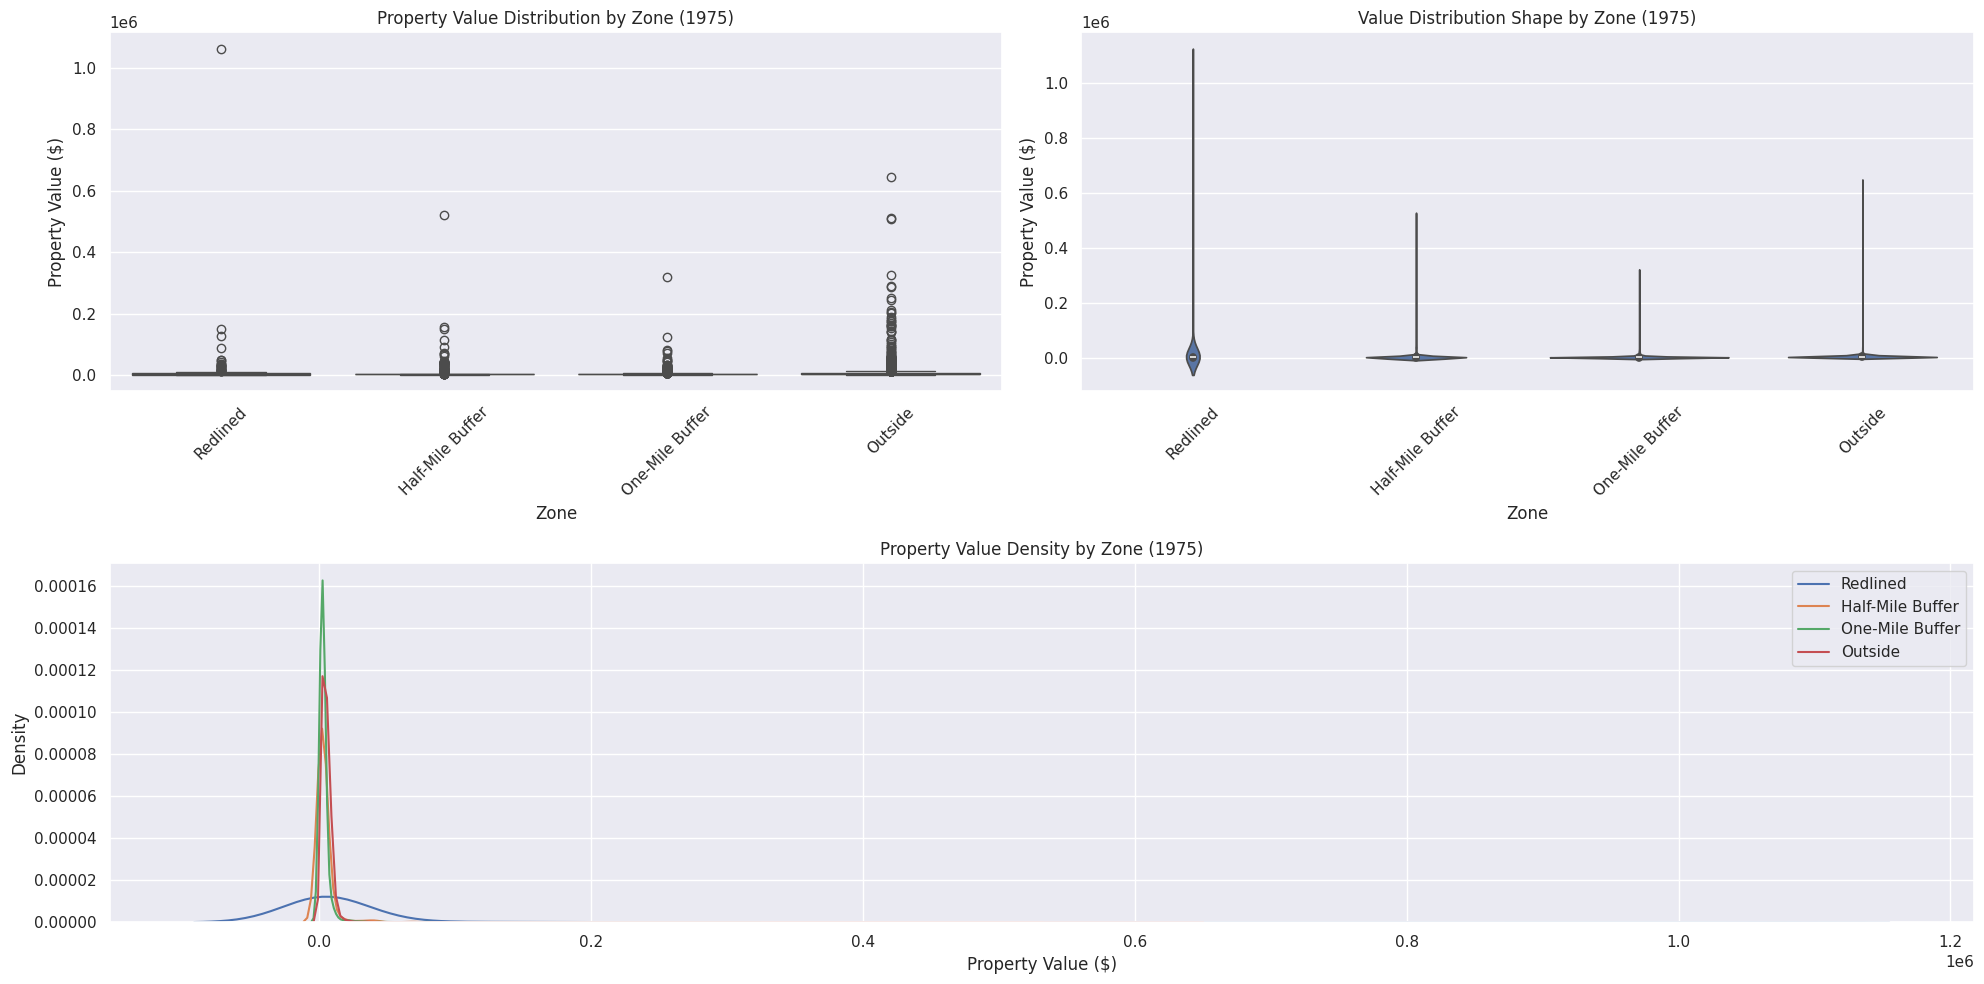


Statistical Summary for 1975:
                  Count      Mean  Median       Std      Q1      Q3     CV
Zone                                                                      
Half-Mile Buffer   1395   4032.96  1960.0  16577.73  1540.0  2680.0  4.111
One-Mile Buffer    1937   3425.76  2230.0   9069.22  1680.0  3040.0  2.647
Outside           19889   5584.78  4430.0  10407.30  2780.0  6820.0  1.864
Redlined            162  14497.96  2025.0  84931.35  1272.5  5255.0  5.858

Value Range Analysis:

Redlined:
- Range: $20.00 to $1,062,880.00
- Range Percentage: 5,314,300.0%
- Interquartile Range: $3,982.50

Half-Mile Buffer:
- Range: $10.00 to $520,320.00
- Range Percentage: 5,203,100.0%
- Interquartile Range: $1,140.00

One-Mile Buffer:
- Range: $30.00 to $318,370.00
- Range Percentage: 1,061,133.3%
- Interquartile Range: $1,360.00

Outside:
- Range: $10.00 to $645,960.00
- Range Percentage: 6,459,500.0%
- Interquartile Range: $4,040.00

Statistical Tests:
Kruskal-Wallis test: H-stati

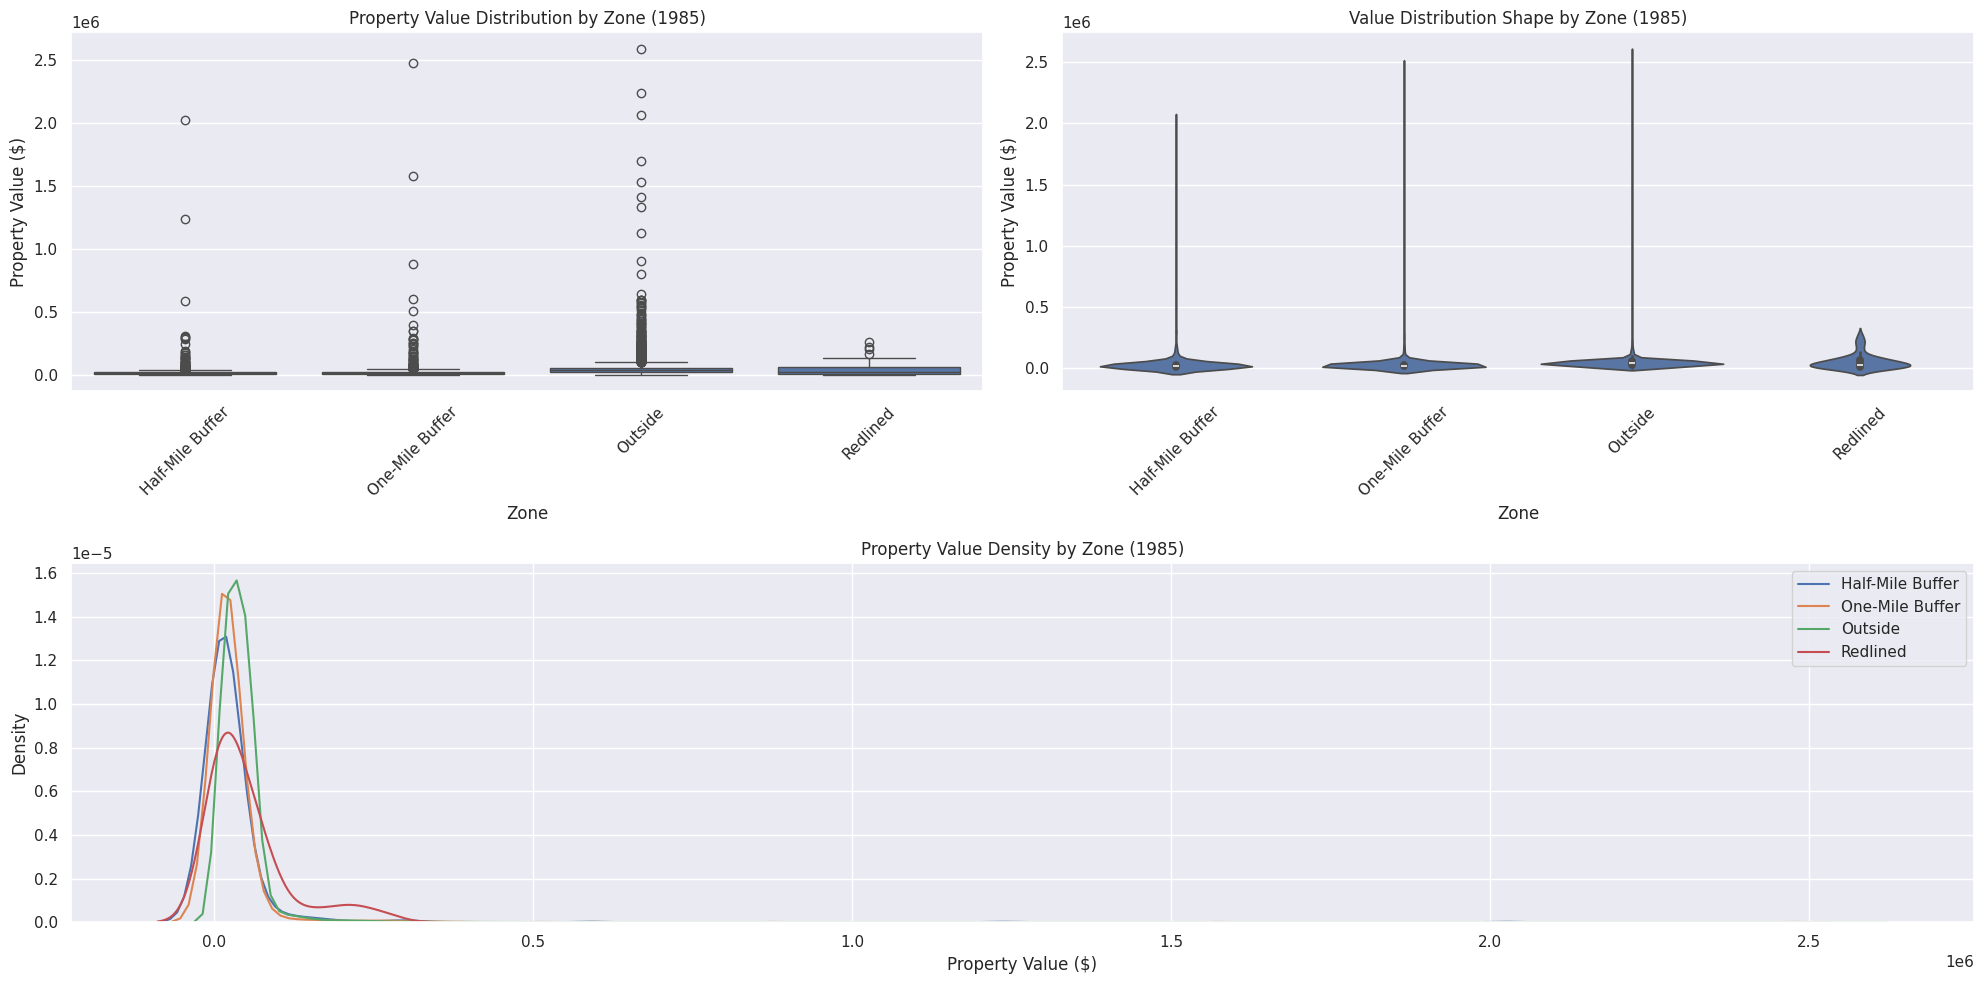


Statistical Summary for 1985:
                  Count      Mean   Median       Std        Q1       Q3     CV
Zone                                                                          
Half-Mile Buffer    673  27303.88  13230.0  98482.07   9420.00  20320.0  3.607
One-Mile Buffer    1290  29071.97  18008.5  92637.65  11182.50  25967.5  3.186
Outside            9470  42624.03  36135.0  65448.79  20986.25  52462.0  1.535
Redlined             42  50752.38  25515.0  62813.17   9244.25  65380.0  1.238

Value Range Analysis:

Half-Mile Buffer:
- Range: $420.00 to $2,024,370.00
- Range Percentage: 481,892.9%
- Interquartile Range: $10,900.00

One-Mile Buffer:
- Range: $200.00 to $2,473,890.00
- Range Percentage: 1,236,845.0%
- Interquartile Range: $14,785.00

Outside:
- Range: $130.00 to $2,591,840.00
- Range Percentage: 1,993,623.1%
- Interquartile Range: $31,475.75

Redlined:
- Range: $500.00 to $264,950.00
- Range Percentage: 52,890.0%
- Interquartile Range: $56,135.75

Statistical Test

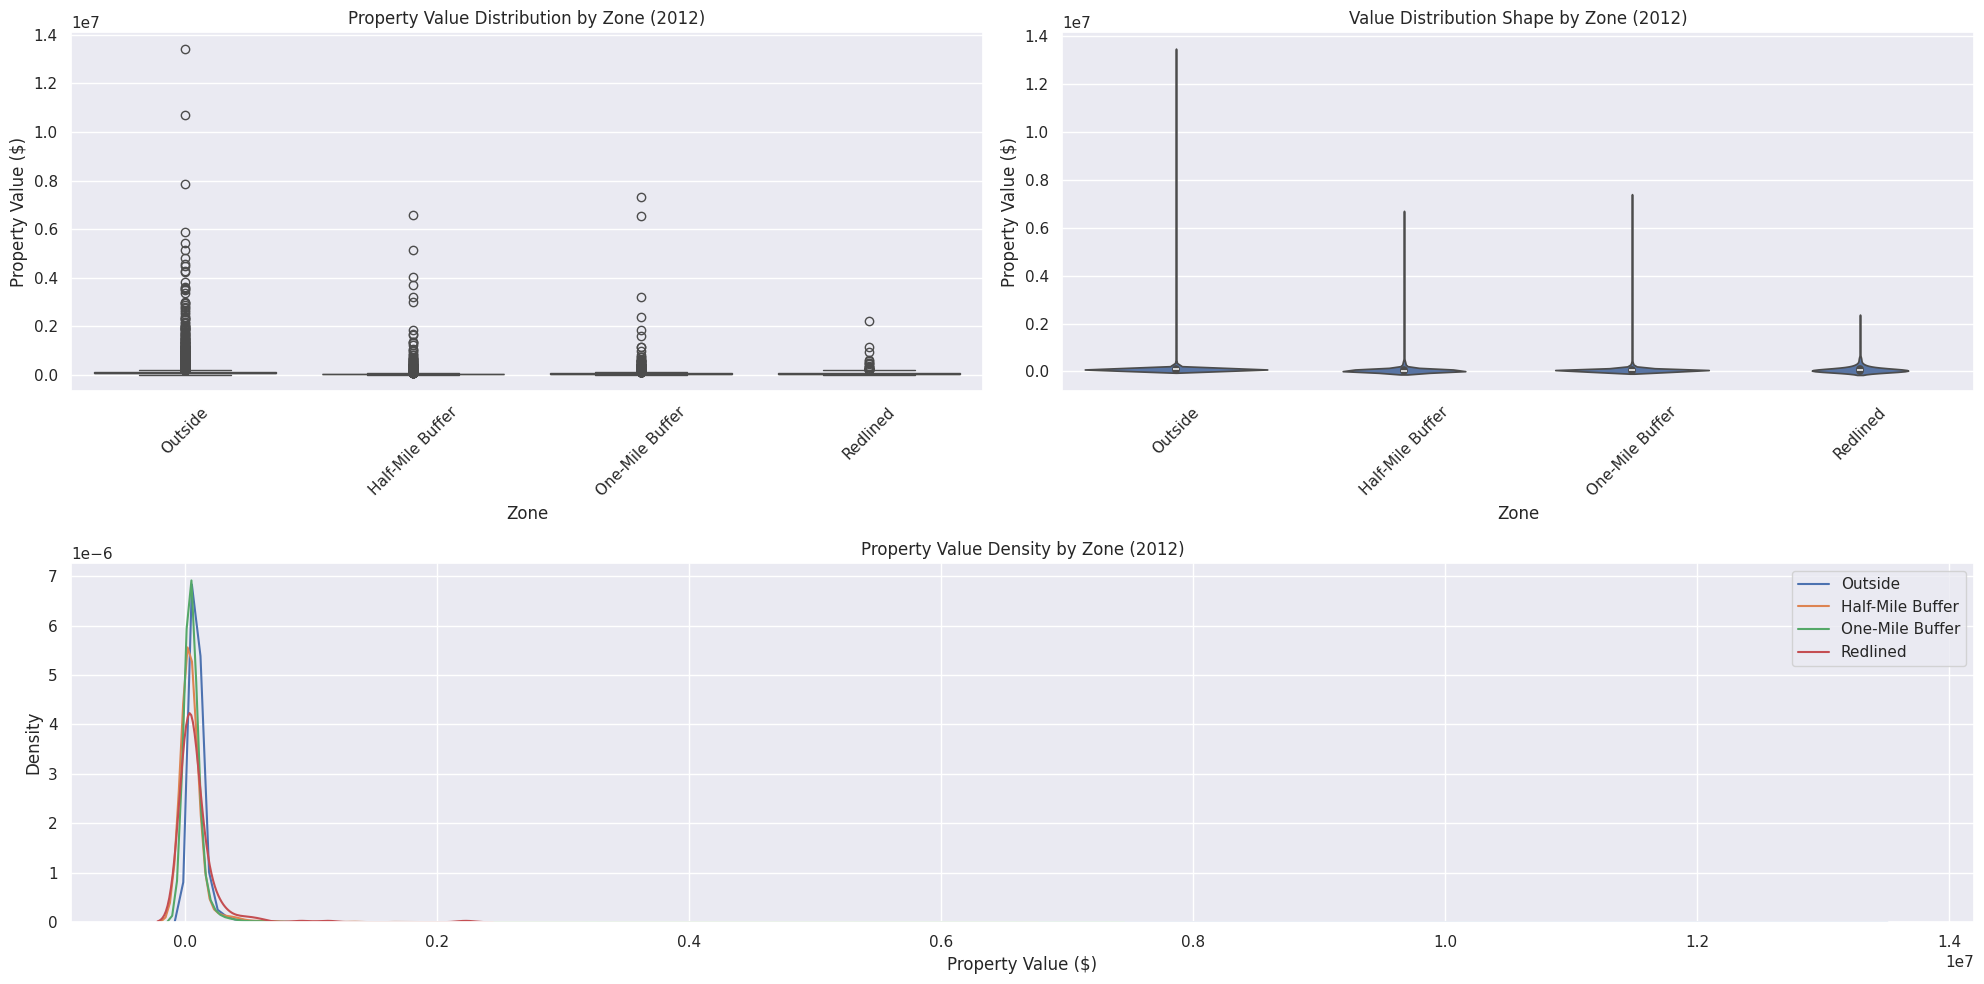


Statistical Summary for 2012:
                  Count       Mean   Median        Std       Q1        Q3     CV
Zone                                                                            
Half-Mile Buffer   1849   73004.65  33329.0  281068.83  22403.0   48692.0  3.850
One-Mile Buffer    2651   71239.54  47357.0  222039.75  29887.0   67218.0  3.117
Outside           23643  108603.21  88047.0  199796.97  62531.0  118843.0  1.840
Redlined            197   97542.46  41218.0  207372.57  18398.0   94446.0  2.126

Value Range Analysis:

Outside:
- Range: $200.00 to $13,431,972.00
- Range Percentage: 6,715,886.0%
- Interquartile Range: $56,312.00

Half-Mile Buffer:
- Range: $141.00 to $6,584,580.00
- Range Percentage: 4,669,814.9%
- Interquartile Range: $26,289.00

One-Mile Buffer:
- Range: $200.00 to $7,315,385.00
- Range Percentage: 3,657,592.5%
- Interquartile Range: $37,331.00

Redlined:
- Range: $300.00 to $2,230,129.00
- Range Percentage: 743,276.3%
- Interquartile Range: $76,048.00

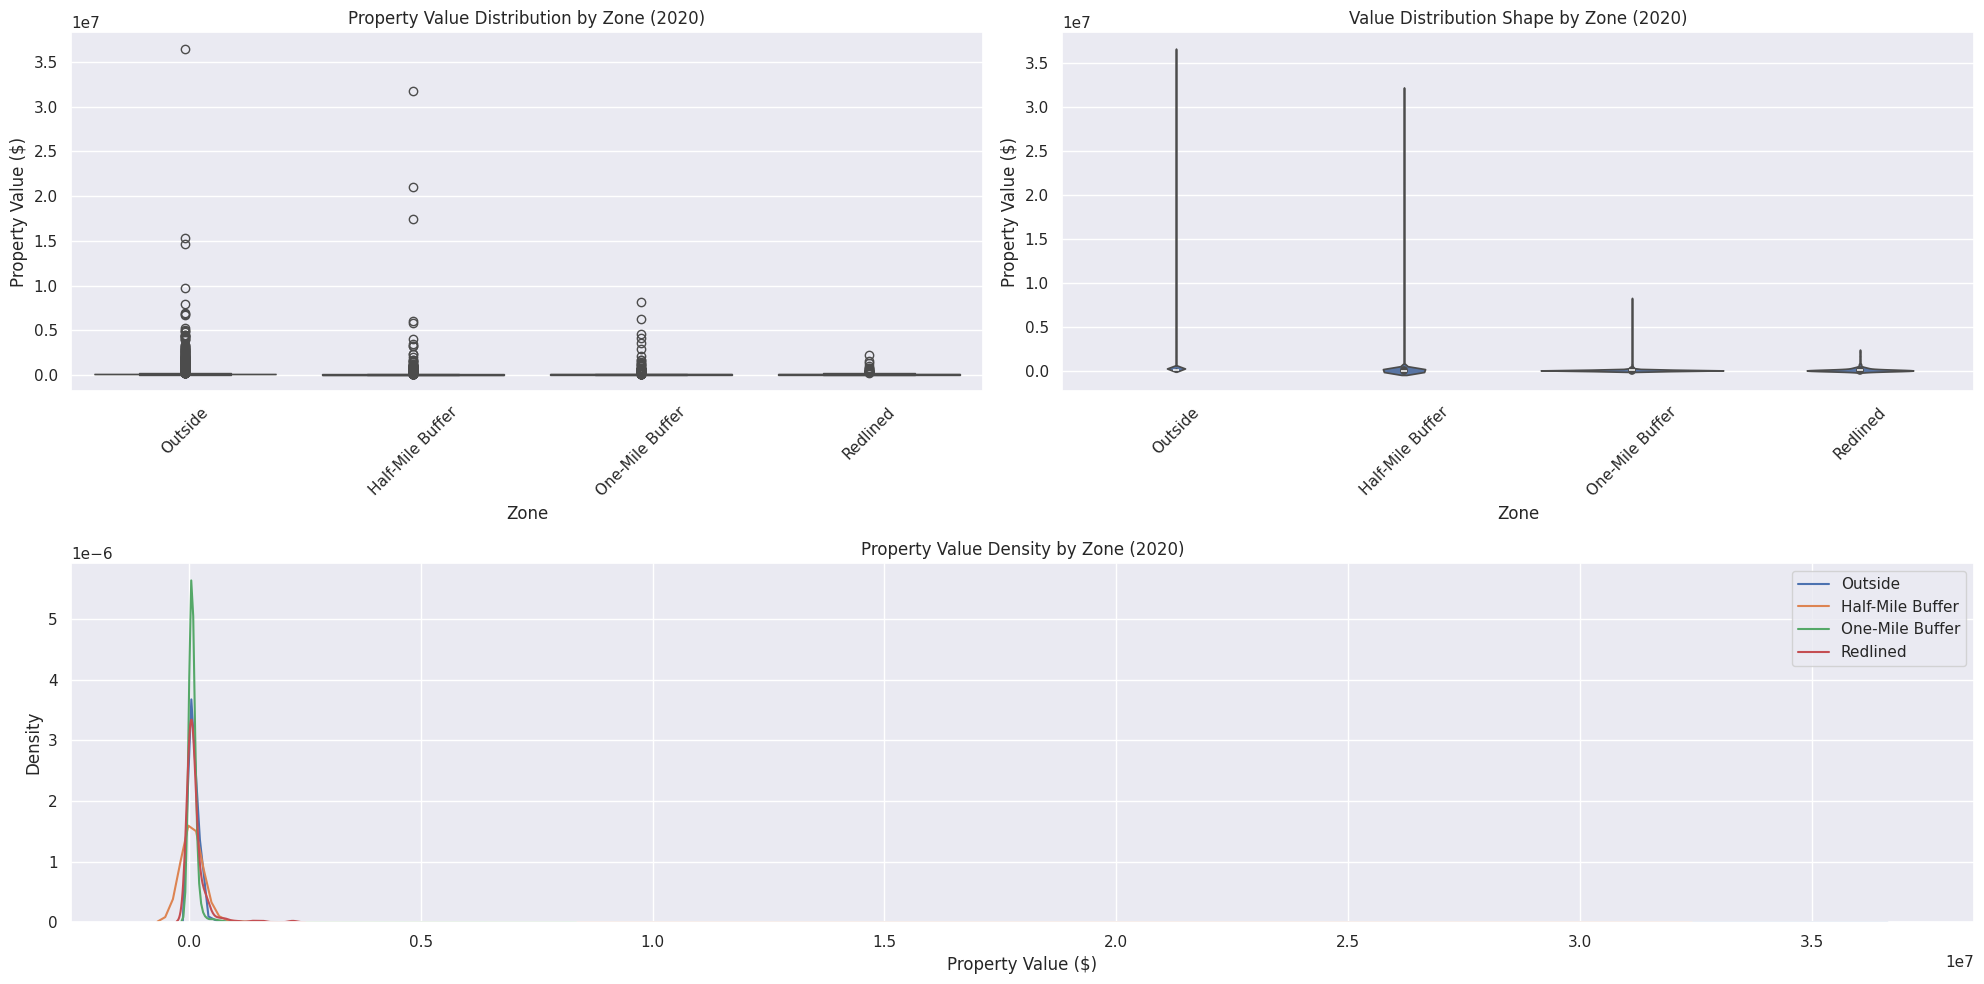


Statistical Summary for 2020:
                  Count       Mean    Median         Std        Q1         Q3     CV
Zone                                                                                
Half-Mile Buffer   1830  126915.64   36595.0  1020892.00  24189.00   58346.25  8.044
One-Mile Buffer    2653   91837.10   57609.0   270998.63  38806.00   84328.00  2.951
Outside           23636  140112.49  115388.0   341823.00  79253.25  155172.25  2.440
Redlined            195  133695.62   53591.0   256754.43  25843.00  118149.50  1.920

Value Range Analysis:

Outside:
- Range: $200.00 to $36,498,160.00
- Range Percentage: 18,248,980.0%
- Interquartile Range: $75,919.00

Half-Mile Buffer:
- Range: $141.00 to $31,730,000.00
- Range Percentage: 22,503,446.1%
- Interquartile Range: $34,157.25

One-Mile Buffer:
- Range: $200.00 to $8,177,453.00
- Range Percentage: 4,088,626.5%
- Interquartile Range: $45,522.00

Redlined:
- Range: $300.00 to $2,235,591.00
- Range Percentage: 745,097.0%
- Inte

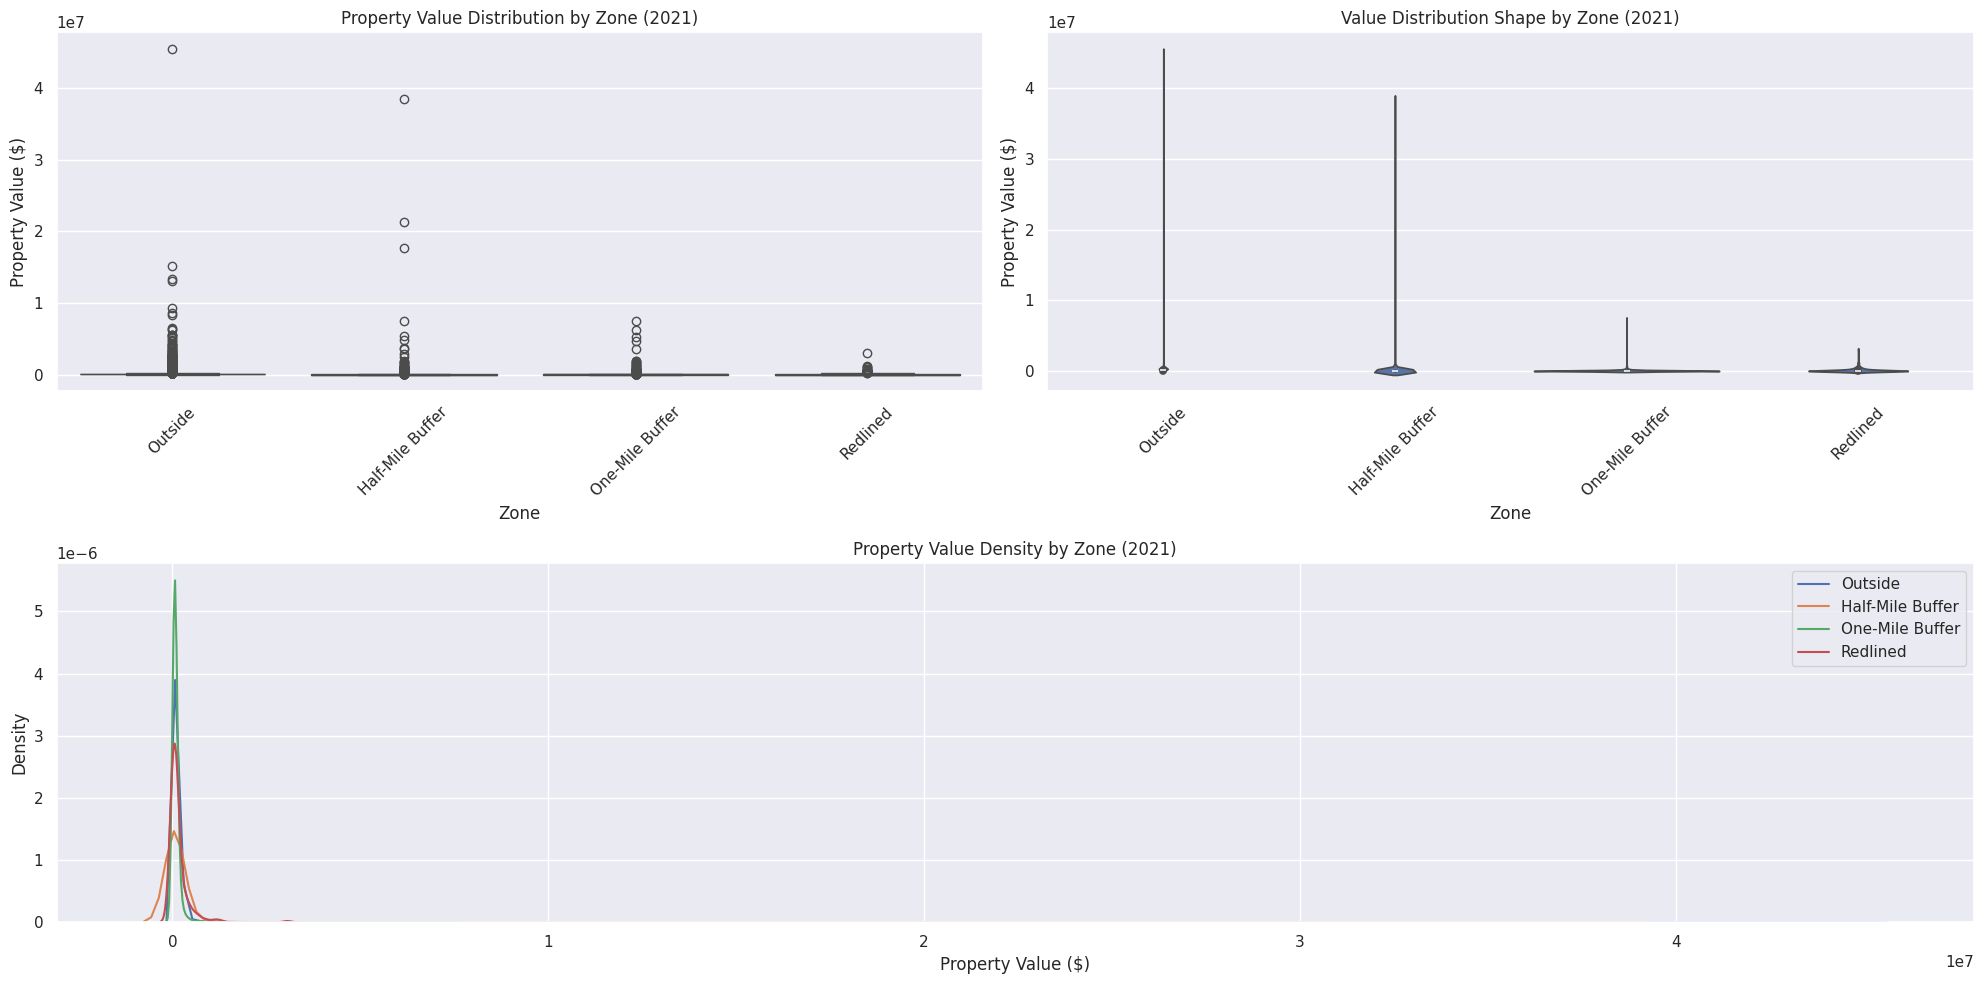


Statistical Summary for 2021:
                  Count       Mean    Median         Std        Q1         Q3     CV
Zone                                                                                
Half-Mile Buffer   1830  143938.08   49439.5  1148473.84  33293.00   73157.00  7.979
One-Mile Buffer    2658  100089.64   65480.5   270791.60  43385.75   94727.75  2.705
Outside           23641  155263.40  127818.0   399547.52  88339.00  171365.00  2.573
Redlined            194  152480.39   57823.0   296983.88  29165.50  138443.25  1.948

Value Range Analysis:

Outside:
- Range: $200.00 to $45,458,707.00
- Range Percentage: 22,729,253.5%
- Interquartile Range: $83,026.00

Half-Mile Buffer:
- Range: $141.00 to $38,461,872.00
- Range Percentage: 27,277,823.4%
- Interquartile Range: $39,864.00

One-Mile Buffer:
- Range: $200.00 to $7,500,000.00
- Range Percentage: 3,749,900.0%
- Interquartile Range: $51,342.00

Redlined:
- Range: $300.00 to $3,056,561.00
- Range Percentage: 1,018,753.7%
- In

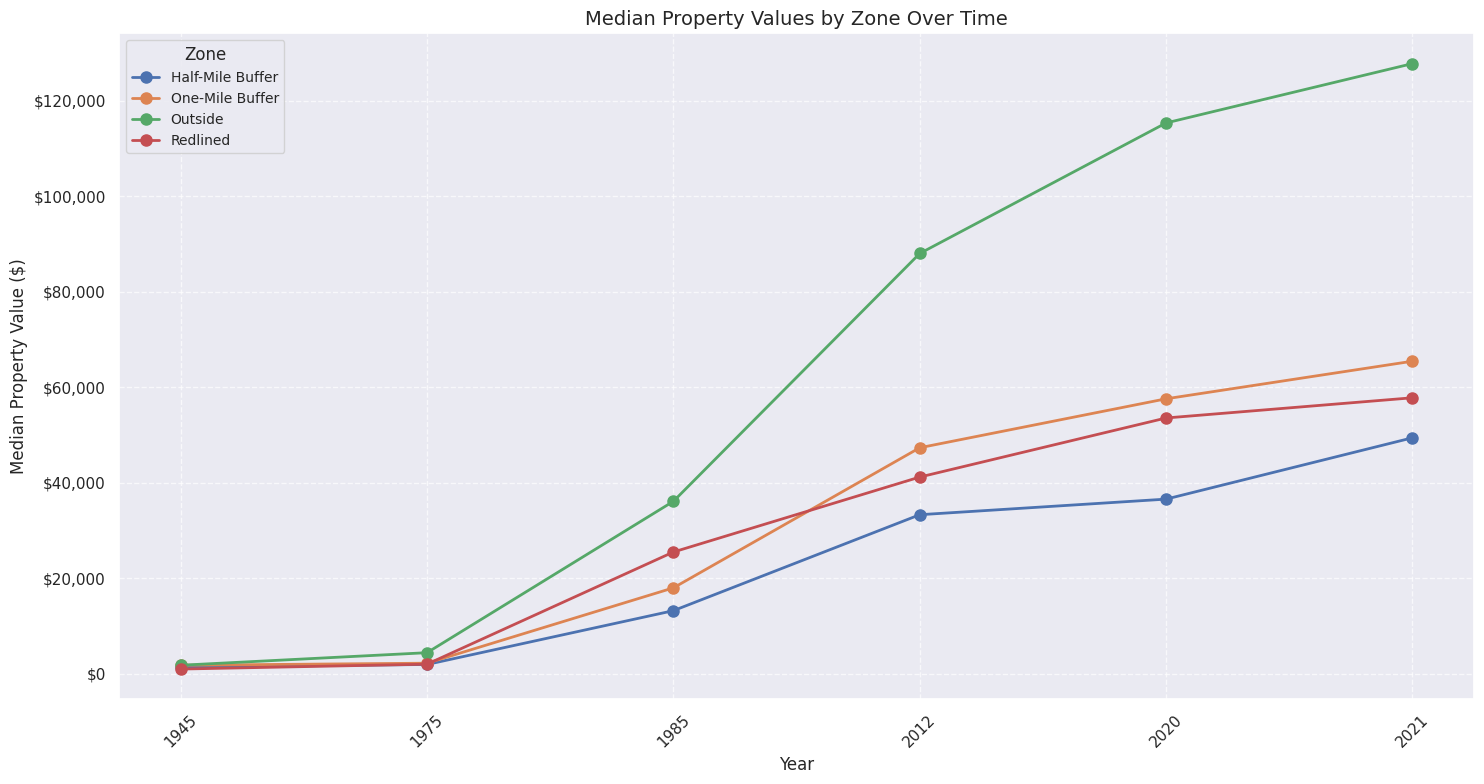

In [ ]:
# Run the zone-specific analysis
results = run_zone_analysis()

This analysis provides a comprehensive look at zone-specific patterns through:

Distribution Analysis

- Box plots showing value spread
- Violin plots showing distribution shape
- Density plots showing value concentrations


Statistical Analysis

- Basic statistics (mean, median, standard deviation)
- Quartile analysis
- Coefficient of variation
- Statistical significance tests


Value Clustering

- Analysis of value clusters within each zone
- Distribution of properties across value ranges
- Identification of concentration patterns


Value Gap Analysis

- Direct comparison between redlined and outside areas
- Percentage gaps
- Absolute value differences


Cross-Year Patterns

- Trend analysis
- Pattern changes over time
- Zone-specific evolution



---

**2. District Council Impact**

In [ ]:
def analyze_district_council_impact(df):
    """
    Comprehensive analysis of how district councils interact with redlining effects
    """
    print("\nA.2: District Council Impact Analysis")
    print("=" * 70)

    # Create zone labels
    def create_zone_labels(row):
        if row['IsInRedliningZone'] == 1:
            return 'Redlined'
        elif row['IsInHalfMileRedliningZone'] == 1:
            return 'Half-Mile Buffer'
        elif row['IsInOneMileRedliningZone'] == 1:
            return 'One-Mile Buffer'
        else:
            return 'Outside'

    df['Zone'] = df.apply(create_zone_labels, axis=1)
    years = ['1945', '1975', '1985', '2012', '2020', '2021']

    def analyze_district_year(year):
        """Analyze district patterns for a specific year"""
        print(f"\nAnalyzing District Council Impact for {year}")
        print("-" * 50)

        # Filter for properties with data in this year
        mask_year = df['YearsWithPropertyValues'].str.contains(str(year), na=False)
        df_year = df[mask_year].copy()
        value_col = f'TotalValue_{year}'

        # Remove zeros and nulls
        df_year = df_year[df_year[value_col] > 0]

        if len(df_year) == 0:
            print(f"No valid data available for {year}")
            return None

        # 1. District Composition Analysis
        print("\n1. District Composition Analysis:")
        district_composition = df_year.groupby('IsInDistrictCouncil')['Zone'].value_counts().unstack(fill_value=0)
        district_composition_pct = district_composition.div(district_composition.sum(axis=1), axis=0) * 100

        # Visualize district composition
        plt.figure(figsize=(15, 6))
        district_composition_pct.plot(kind='bar', stacked=True)
        plt.title(f'Zone Composition by District Council ({year})')
        plt.xlabel('District Council')
        plt.ylabel('Percentage')
        plt.legend(title='Zone')
        plt.tight_layout()
        plt.show()

        # Print composition statistics
        print("\nZone Composition by District:")
        print(district_composition_pct.round(2))

        # 2. Value Analysis by District and Zone
        print("\n2. Value Analysis by District and Zone:")
        value_stats = df_year.pivot_table(
            values=value_col,
            index='IsInDistrictCouncil',
            columns='Zone',
            aggfunc=['median', 'mean', 'count']
        ).round(2)

        # Visualize median values
        plt.figure(figsize=(15, 6))
        value_stats['median'].plot(kind='bar')
        plt.title(f'Median Property Values by District and Zone ({year})')
        plt.xlabel('District Council')
        plt.ylabel('Median Value ($)')
        plt.legend(title='Zone')
        plt.tight_layout()
        plt.show()

        # Print value statistics
        print("\nValue Statistics by District and Zone:")
        print(value_stats)

        # 3. Value Gap Analysis by District
        print("\n3. Value Gap Analysis by District:")
        for district in df_year['IsInDistrictCouncil'].unique():
            district_data = df_year[df_year['IsInDistrictCouncil'] == district]

            if len(district_data) > 0:
                print(f"\nDistrict {district}:")

                # Calculate value gaps between zones
                zones_present = district_data['Zone'].unique()
                if 'Redlined' in zones_present and 'Outside' in zones_present:
                    redlined_median = district_data[district_data['Zone'] == 'Redlined'][value_col].median()
                    outside_median = district_data[district_data['Zone'] == 'Outside'][value_col].median()

                    if redlined_median > 0:
                        gap_pct = ((outside_median - redlined_median) / redlined_median * 100)
                        print(f"- Value Gap (Outside vs Redlined): {gap_pct:,.1f}%")
                        print(f"- Redlined Median: ${redlined_median:,.2f}")
                        print(f"- Outside Median: ${outside_median:,.2f}")

        # 4. Statistical Analysis by District
        print("\n4. Statistical Analysis by District:")
        for district in df_year['IsInDistrictCouncil'].unique():
            district_data = df_year[df_year['IsInDistrictCouncil'] == district]

            if len(district_data) > 0:
                # Perform Kruskal-Wallis test for this district
                zones_with_data = [zone for zone in district_data['Zone'].unique()
                                 if len(district_data[district_data['Zone'] == zone]) > 0]

                if len(zones_with_data) >= 2:
                    groups = [group[value_col].values for name, group
                            in district_data.groupby('Zone') if len(group) > 0]
                    h_stat, p_value = stats.kruskal(*groups)

                    print(f"\nDistrict {district}:")
                    print(f"- Kruskal-Wallis test: H-statistic = {h_stat:.2f}, p-value = {p_value:.4f}")
                    print(f"- Number of zones present: {len(zones_with_data)}")
                    print("- Zones present:", zones_with_data)

        # 5. Distribution Analysis
        plt.figure(figsize=(20, 8))
        for district in sorted(df_year['IsInDistrictCouncil'].unique()):
            plt.subplot(2, 4, district+1)
            district_data = df_year[df_year['IsInDistrictCouncil'] == district]

            if len(district_data) > 0:
                sns.boxplot(data=district_data, x='Zone', y=value_col)
                plt.title(f'District {district}')
                plt.xticks(rotation=45)
                if district % 4 == 0:
                    plt.ylabel('Property Value ($)')
                else:
                    plt.ylabel('')

        plt.suptitle(f'Property Value Distribution by Zone in Each District ({year})')
        plt.tight_layout()
        plt.show()

        return {
            'composition': district_composition_pct,
            'value_stats': value_stats
        }

    # Analyze each year
    results = {}
    for year in years:
        results[year] = analyze_district_year(year)

    # Cross-year comparison
    print("\nCross-Year District Analysis")
    print("=" * 50)

    # Create summary of district performance over time
    summary_data = []
    for year in years:
        if results[year] is not None:
            year_data = results[year]['value_stats']['median']
            year_data.columns = [f'{col}_{year}' for col in year_data.columns]
            summary_data.append(year_data)

    if summary_data:
        summary_stats = pd.concat(summary_data, axis=1)

        # Plot trends for each district
        plt.figure(figsize=(15, 8))
        for district in summary_stats.index:
            district_data = summary_stats.loc[district]
            plt.plot(years, [district_data.get(f'Outside_{year}', np.nan) for year in years],
                    'o-', label=f'District {district}', linewidth=2, markersize=8)

        plt.title('Median Property Values (Outside Redlining) by District Over Time', fontsize=14)
        plt.xlabel('Year', fontsize=12)
        plt.ylabel('Median Property Value ($)', fontsize=12)
        plt.legend(fontsize=10)
        plt.grid(True, linestyle='--', alpha=0.7)
        plt.xticks(rotation=45)

        plt.tight_layout()
        plt.show()

    return results

# Function to run the analysis
def run_district_analysis():
    # Run the analysis
    results = analyze_district_council_impact(df)

    return results


A.2: District Council Impact Analysis

Analyzing District Council Impact for 1945
--------------------------------------------------

1. District Composition Analysis:


<Figure size 1500x600 with 0 Axes>

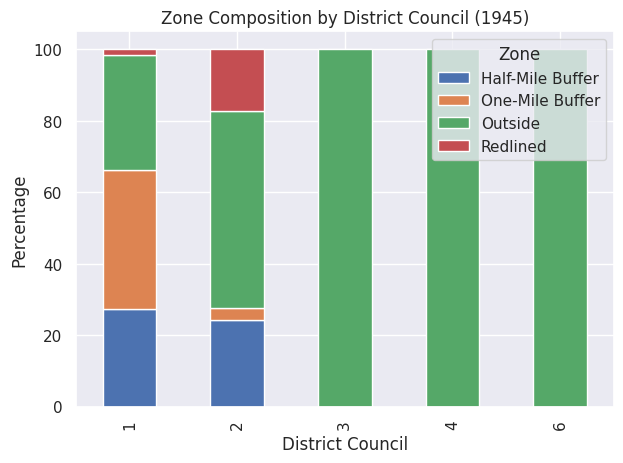


Zone Composition by District:
Zone                 Half-Mile Buffer  One-Mile Buffer  Outside  Redlined
IsInDistrictCouncil                                                      
1                               27.27            39.05    32.02      1.65
2                               24.14             3.45    55.17     17.24
3                                0.00             0.00   100.00      0.00
4                                0.00             0.00   100.00      0.00
6                                0.00             0.00   100.00      0.00

2. Value Analysis by District and Zone:


<Figure size 1500x600 with 0 Axes>

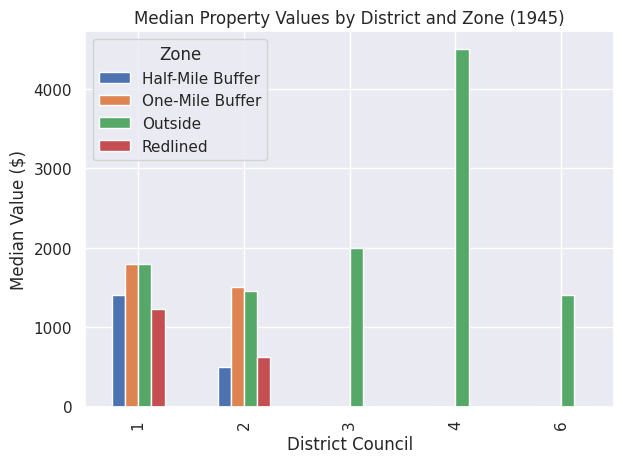


Value Statistics by District and Zone:
                              median                                              mean  \
Zone                Half-Mile Buffer One-Mile Buffer Outside Redlined Half-Mile Buffer   
IsInDistrictCouncil                                                                      
1                             1400.0          1800.0  1800.0   1225.0          1562.08   
2                              500.0          1500.0  1450.0    625.0           785.00   
3                                NaN             NaN  2000.0      NaN              NaN   
4                                NaN             NaN  4500.0      NaN              NaN   
6                                NaN             NaN  1400.0      NaN              NaN   

                                                                 count                          \
Zone                One-Mile Buffer  Outside Redlined Half-Mile Buffer One-Mile Buffer Outside   
IsInDistrictCouncil                        

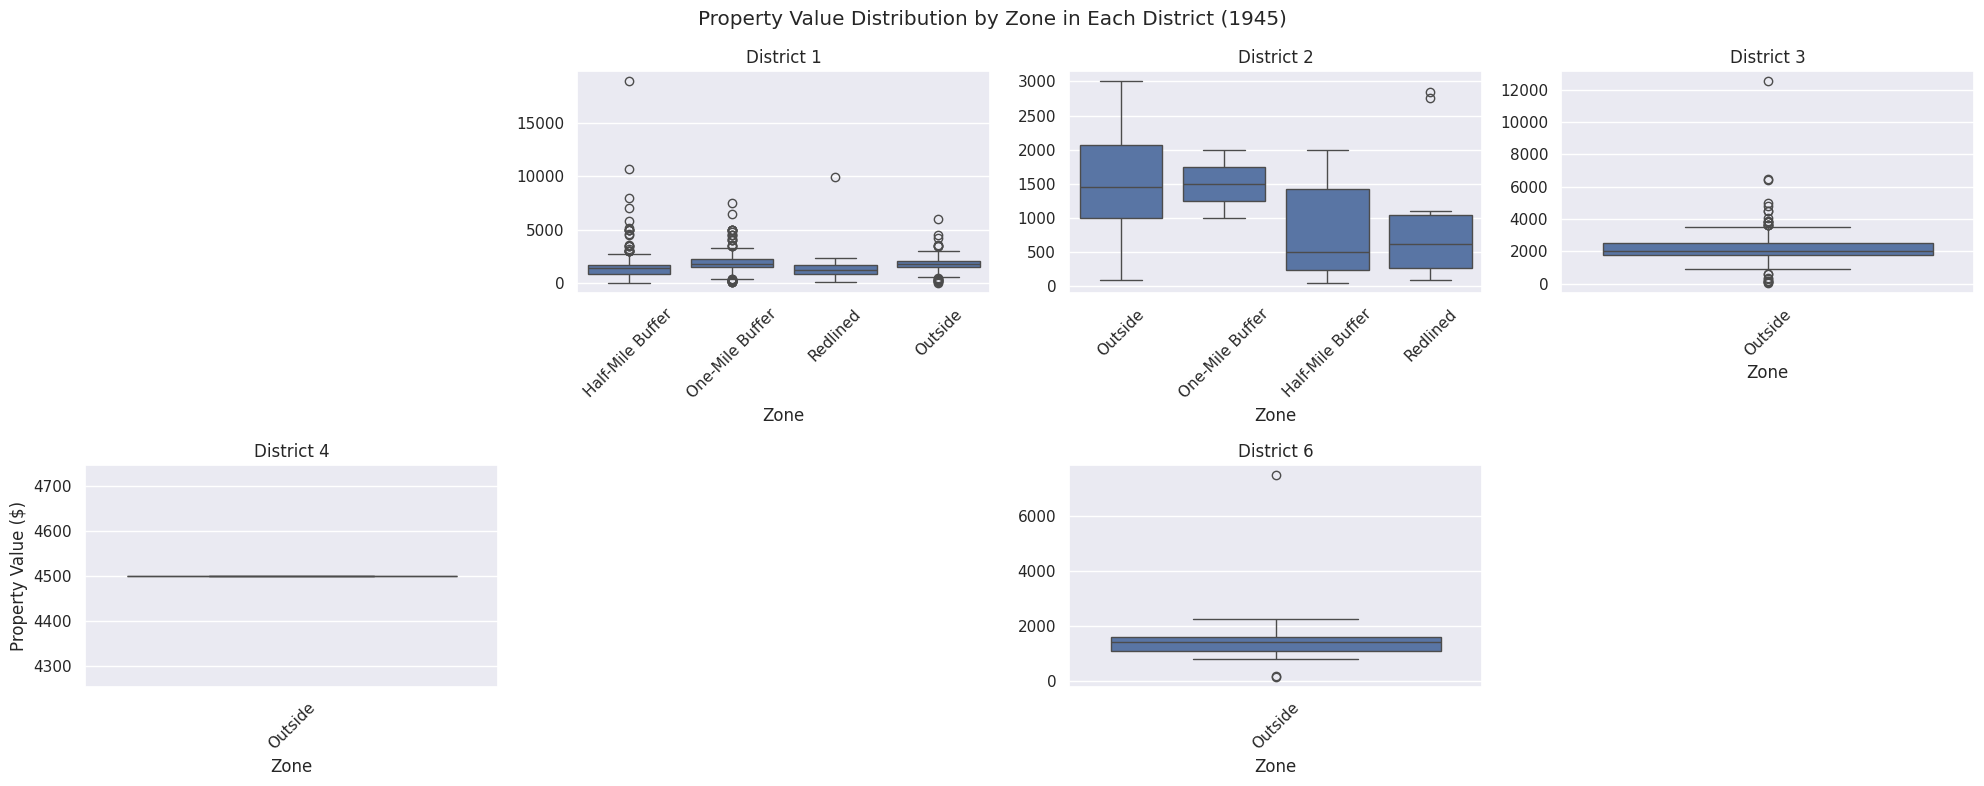


Analyzing District Council Impact for 1975
--------------------------------------------------

1. District Composition Analysis:


<Figure size 1500x600 with 0 Axes>

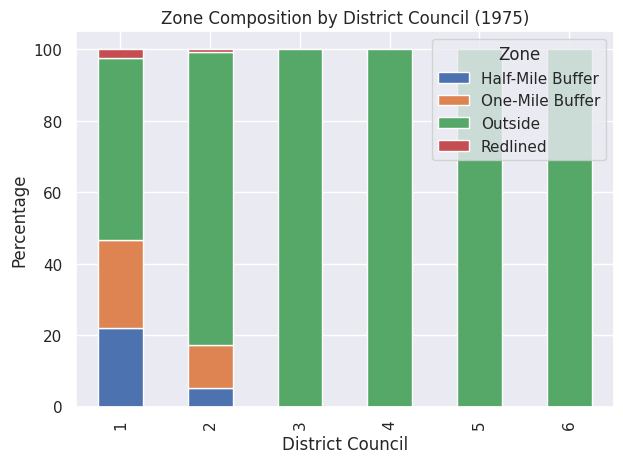


Zone Composition by District:
Zone                 Half-Mile Buffer  One-Mile Buffer  Outside  Redlined
IsInDistrictCouncil                                                      
1                               22.04            24.44    51.06      2.46
2                                5.10            12.00    82.24      0.67
3                                0.00             0.00   100.00      0.00
4                                0.00             0.00   100.00      0.00
5                                0.00             0.00   100.00      0.00
6                                0.00             0.00   100.00      0.00

2. Value Analysis by District and Zone:


<Figure size 1500x600 with 0 Axes>

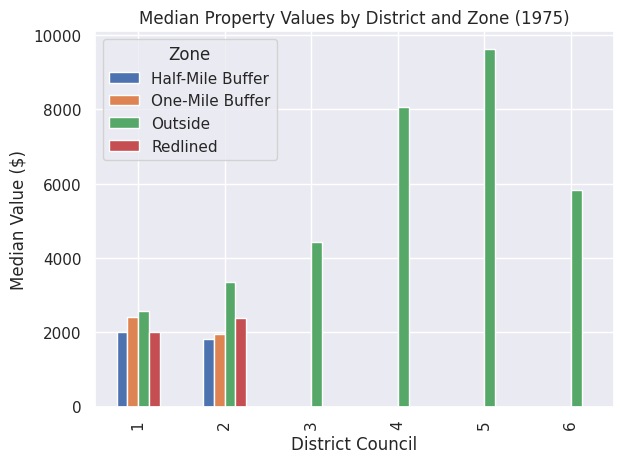


Value Statistics by District and Zone:
                              median                                              mean  \
Zone                Half-Mile Buffer One-Mile Buffer Outside Redlined Half-Mile Buffer   
IsInDistrictCouncil                                                                      
1                             1995.0          2410.0  2580.0   2000.0          4307.52   
2                             1810.0          1960.0  3350.0   2370.0          3083.83   
3                                NaN             NaN  4440.0      NaN              NaN   
4                                NaN             NaN  8050.0      NaN              NaN   
5                                NaN             NaN  9615.0      NaN              NaN   
6                                NaN             NaN  5820.0      NaN              NaN   

                                                                  count                          \
Zone                One-Mile Buffer  Outside  Redl

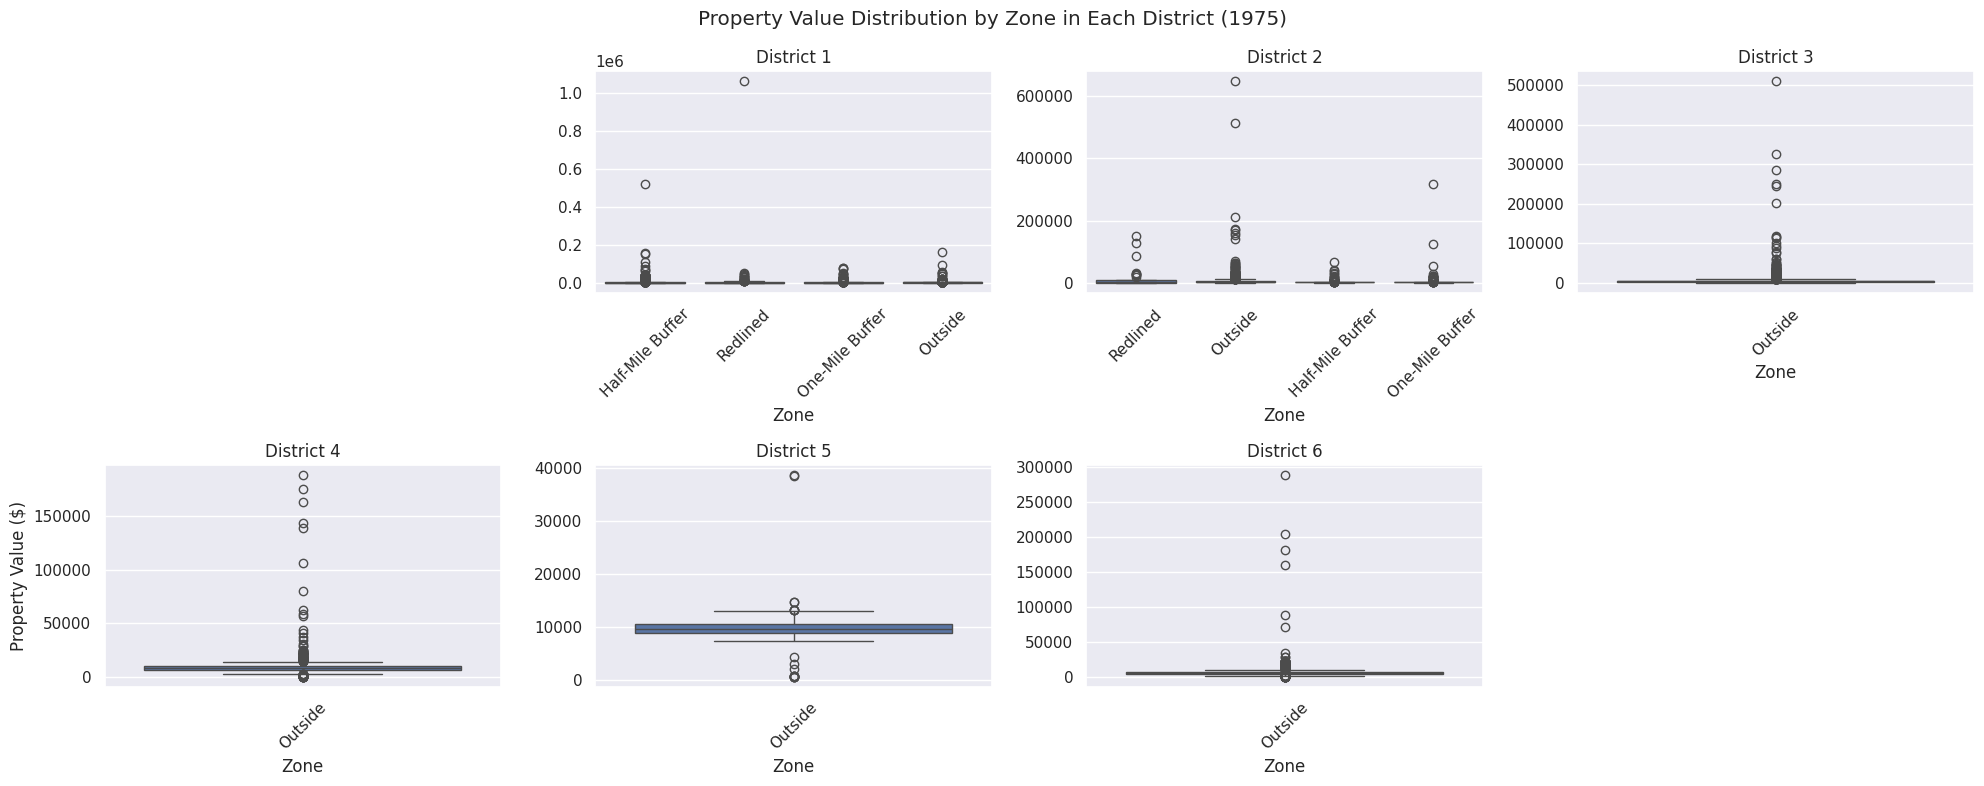


Analyzing District Council Impact for 1985
--------------------------------------------------

1. District Composition Analysis:


<Figure size 1500x600 with 0 Axes>

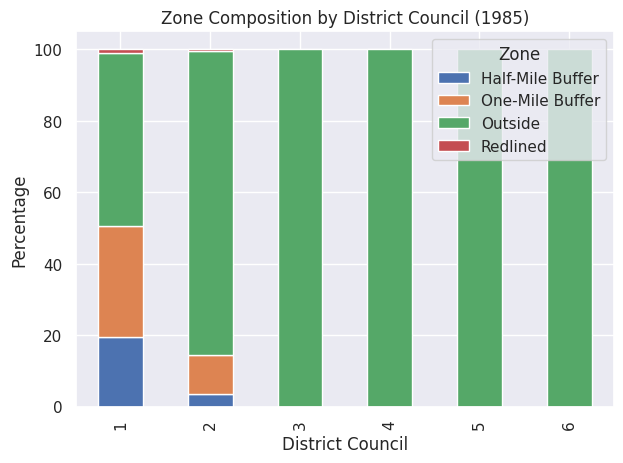


Zone Composition by District:
Zone                 Half-Mile Buffer  One-Mile Buffer  Outside  Redlined
IsInDistrictCouncil                                                      
1                               19.43            31.20    48.37      1.00
2                                3.41            10.98    85.24      0.37
3                                0.00             0.00   100.00      0.00
4                                0.00             0.00   100.00      0.00
5                                0.00             0.00   100.00      0.00
6                                0.00             0.00   100.00      0.00

2. Value Analysis by District and Zone:


<Figure size 1500x600 with 0 Axes>

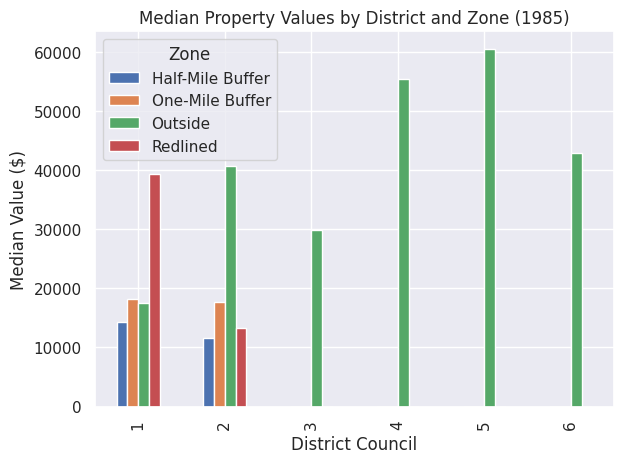


Value Statistics by District and Zone:
                              median                                               mean  \
Zone                Half-Mile Buffer One-Mile Buffer  Outside Redlined Half-Mile Buffer   
IsInDistrictCouncil                                                                       
1                            14350.0         18203.5  17595.0  39290.0         30194.23   
2                            11572.5         17668.0  40660.0  13227.5         15231.10   
3                                NaN             NaN  29901.5      NaN              NaN   
4                                NaN             NaN  55341.0      NaN              NaN   
5                                NaN             NaN  60463.0      NaN              NaN   
6                                NaN             NaN  42892.0      NaN              NaN   

                                                                   count                          \
Zone                One-Mile Buffer   Ou

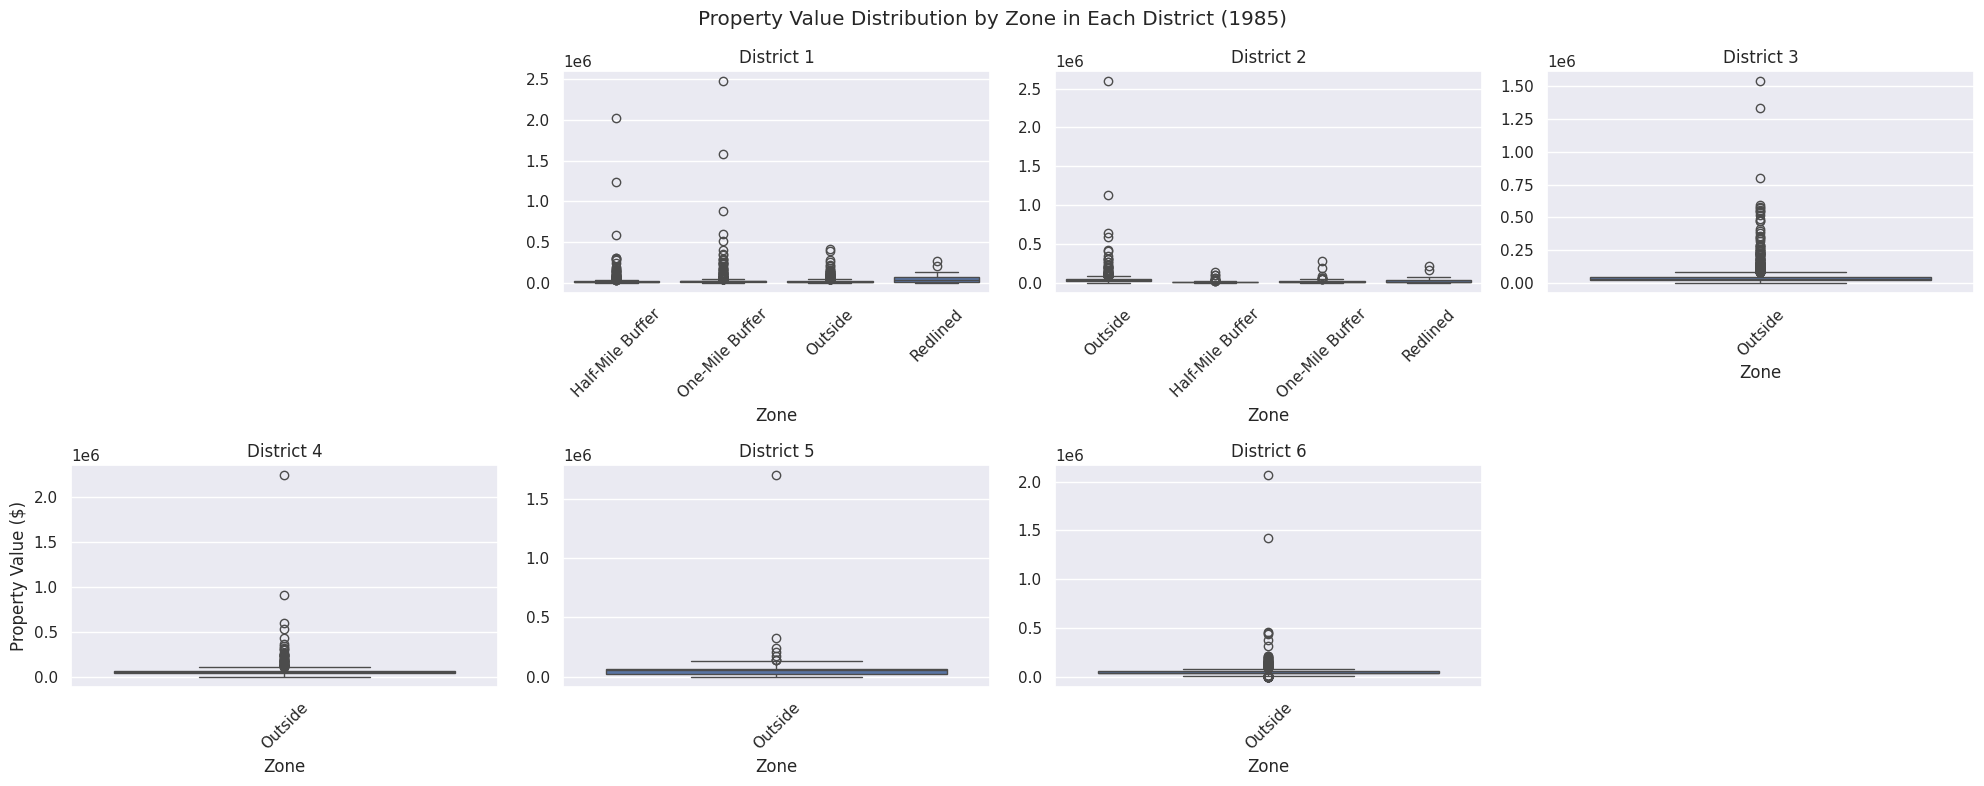


Analyzing District Council Impact for 2012
--------------------------------------------------

1. District Composition Analysis:


<Figure size 1500x600 with 0 Axes>

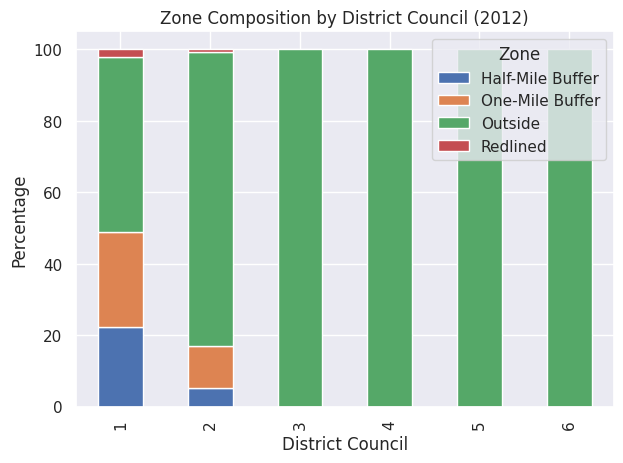


Zone Composition by District:
Zone                 Half-Mile Buffer  One-Mile Buffer  Outside  Redlined
IsInDistrictCouncil                                                      
1                               22.30            26.67    48.82      2.21
2                                5.06            11.93    82.33      0.68
3                                0.00             0.00   100.00      0.00
4                                0.00             0.00   100.00      0.00
5                                0.00             0.00   100.00      0.00
6                                0.00             0.00   100.00      0.00

2. Value Analysis by District and Zone:


<Figure size 1500x600 with 0 Axes>

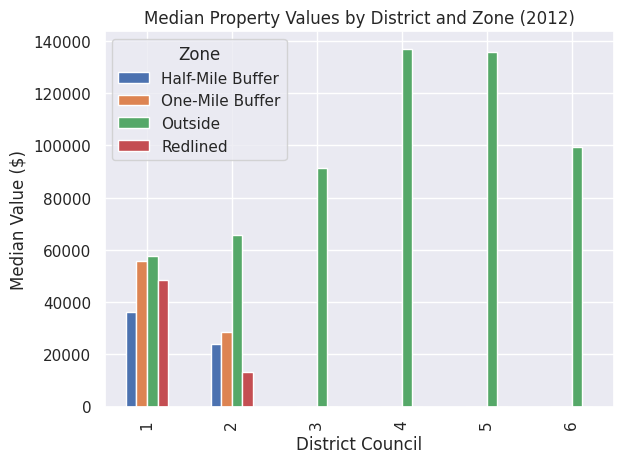


Value Statistics by District and Zone:
                              median                                                mean  \
Zone                Half-Mile Buffer One-Mile Buffer   Outside Redlined Half-Mile Buffer   
IsInDistrictCouncil                                                                        
1                            36135.0         55889.0   57649.5  48411.0         82635.11   
2                            23881.0         28586.0   65684.0  13214.0         35527.38   
3                                NaN             NaN   91215.5      NaN              NaN   
4                                NaN             NaN  136881.0      NaN              NaN   
5                                NaN             NaN  135765.0      NaN              NaN   
6                                NaN             NaN   99477.5      NaN              NaN   

                                                                     count                  \
Zone                One-Mile Buffer  

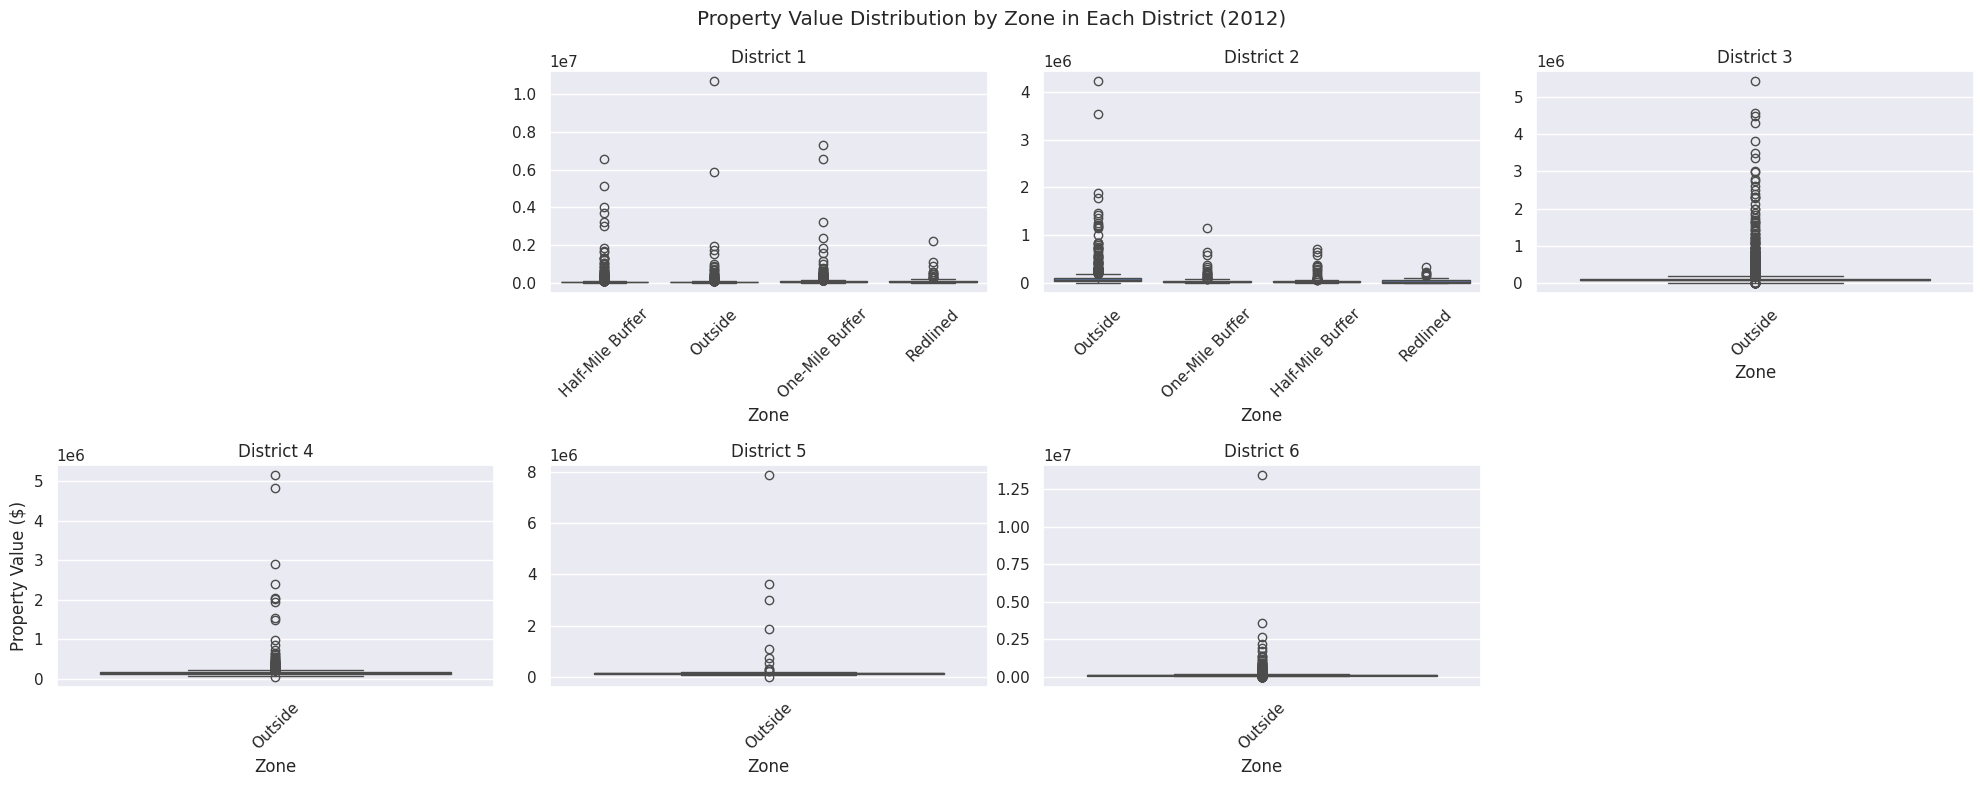


Analyzing District Council Impact for 2020
--------------------------------------------------

1. District Composition Analysis:


<Figure size 1500x600 with 0 Axes>

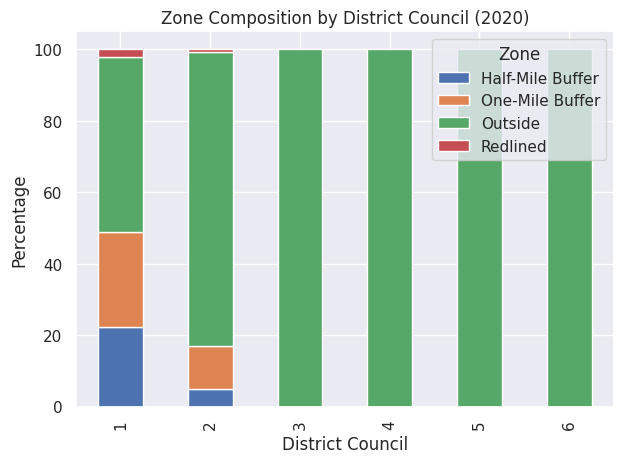


Zone Composition by District:
Zone                 Half-Mile Buffer  One-Mile Buffer  Outside  Redlined
IsInDistrictCouncil                                                      
1                               22.13            26.76    48.95      2.16
2                                5.02            11.95    82.32      0.71
3                                0.00             0.00   100.00      0.00
4                                0.00             0.00   100.00      0.00
5                                0.00             0.00   100.00      0.00
6                                0.00             0.00   100.00      0.00

2. Value Analysis by District and Zone:


<Figure size 1500x600 with 0 Axes>

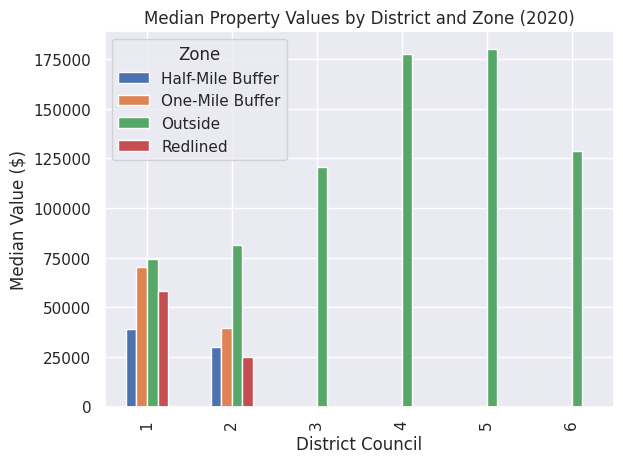


Value Statistics by District and Zone:
                              median                                                mean  \
Zone                Half-Mile Buffer One-Mile Buffer   Outside Redlined Half-Mile Buffer   
IsInDistrictCouncil                                                                        
1                            38839.0         70001.0   74071.0  58038.5        146648.88   
2                            30012.0         39589.0   81114.0  24795.0         50350.65   
3                                NaN             NaN  120616.0      NaN              NaN   
4                                NaN             NaN  177254.0      NaN              NaN   
5                                NaN             NaN  179882.5      NaN              NaN   
6                                NaN             NaN  128684.0      NaN              NaN   

                                                                     count                  \
Zone                One-Mile Buffer  

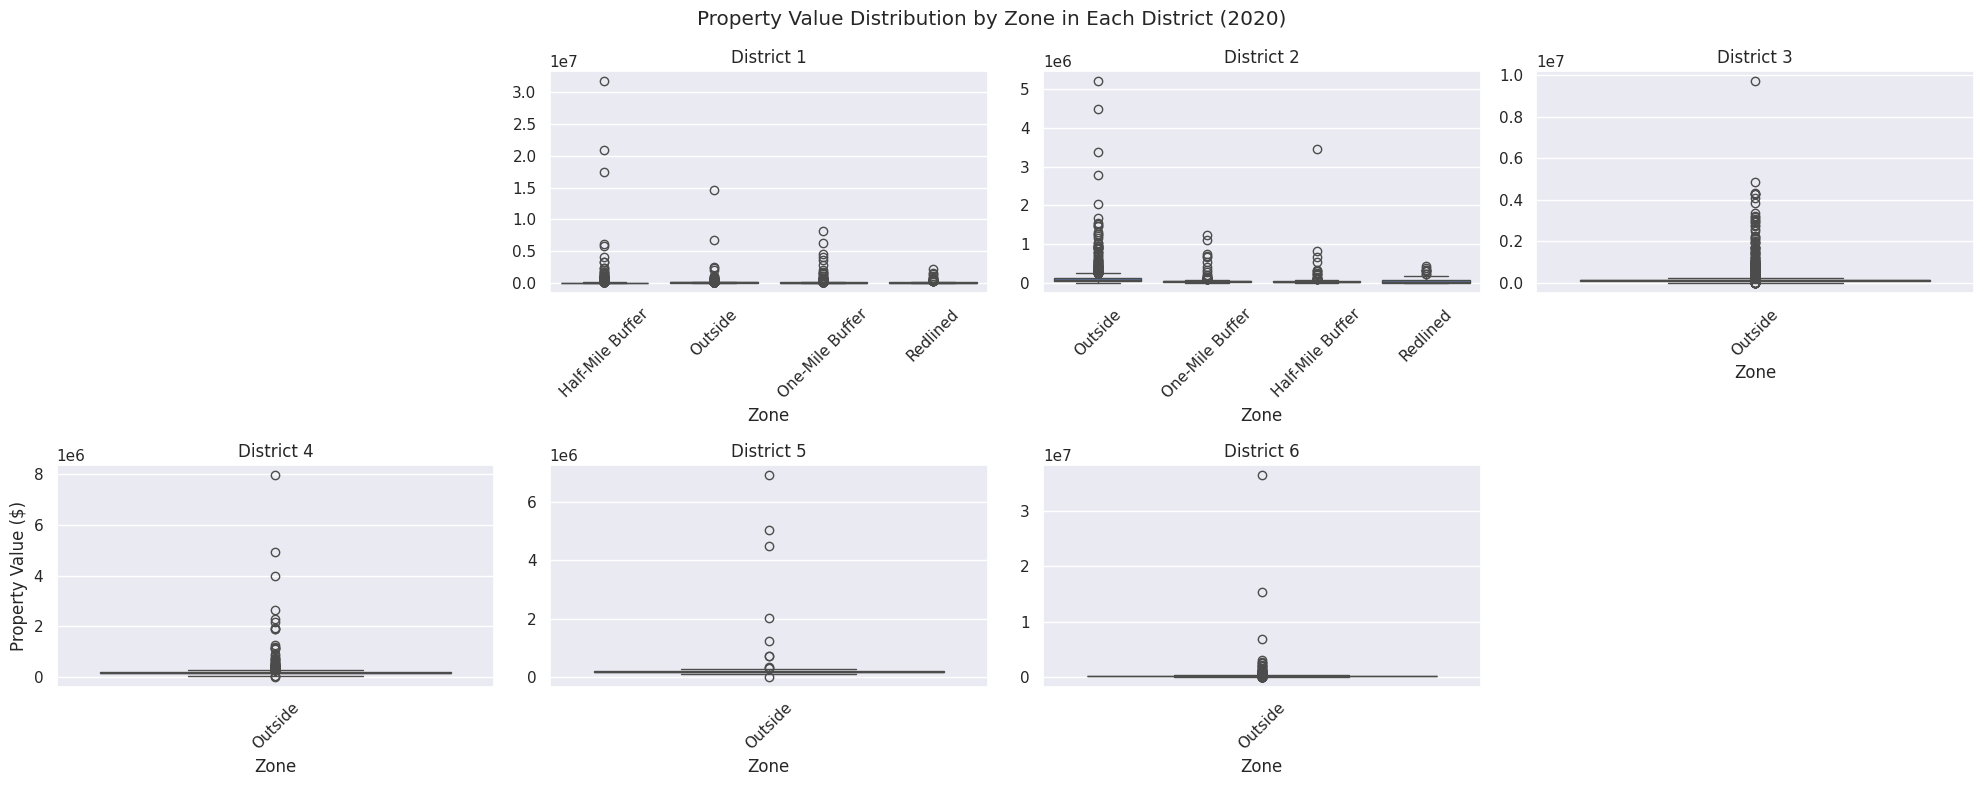


Analyzing District Council Impact for 2021
--------------------------------------------------

1. District Composition Analysis:


<Figure size 1500x600 with 0 Axes>

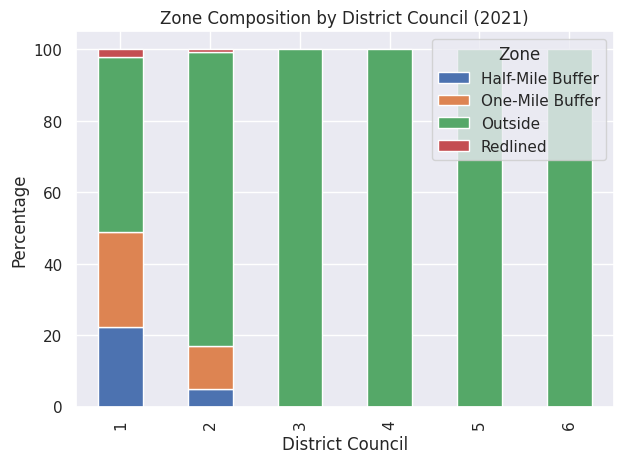


Zone Composition by District:
Zone                 Half-Mile Buffer  One-Mile Buffer  Outside  Redlined
IsInDistrictCouncil                                                      
1                               22.12            26.77    48.97      2.14
2                                5.01            11.99    82.29      0.71
3                                0.00             0.00   100.00      0.00
4                                0.00             0.00   100.00      0.00
5                                0.00             0.00   100.00      0.00
6                                0.00             0.00   100.00      0.00

2. Value Analysis by District and Zone:


<Figure size 1500x600 with 0 Axes>

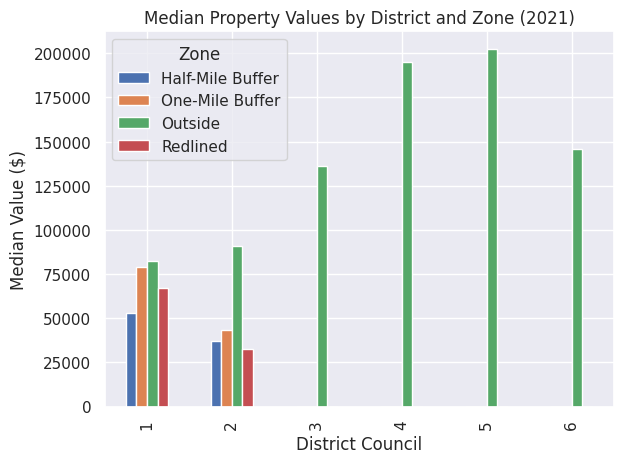


Value Statistics by District and Zone:
                              median                                                mean  \
Zone                Half-Mile Buffer One-Mile Buffer   Outside Redlined Half-Mile Buffer   
IsInDistrictCouncil                                                                        
1                            53210.0         79154.0   82261.0  66960.0        164598.43   
2                            37179.0         43248.0   90646.0  32594.0         63775.88   
3                                NaN             NaN  135879.5      NaN              NaN   
4                                NaN             NaN  195137.5      NaN              NaN   
5                                NaN             NaN  202260.5      NaN              NaN   
6                                NaN             NaN  145539.0      NaN              NaN   

                                                                     count                  \
Zone                One-Mile Buffer  

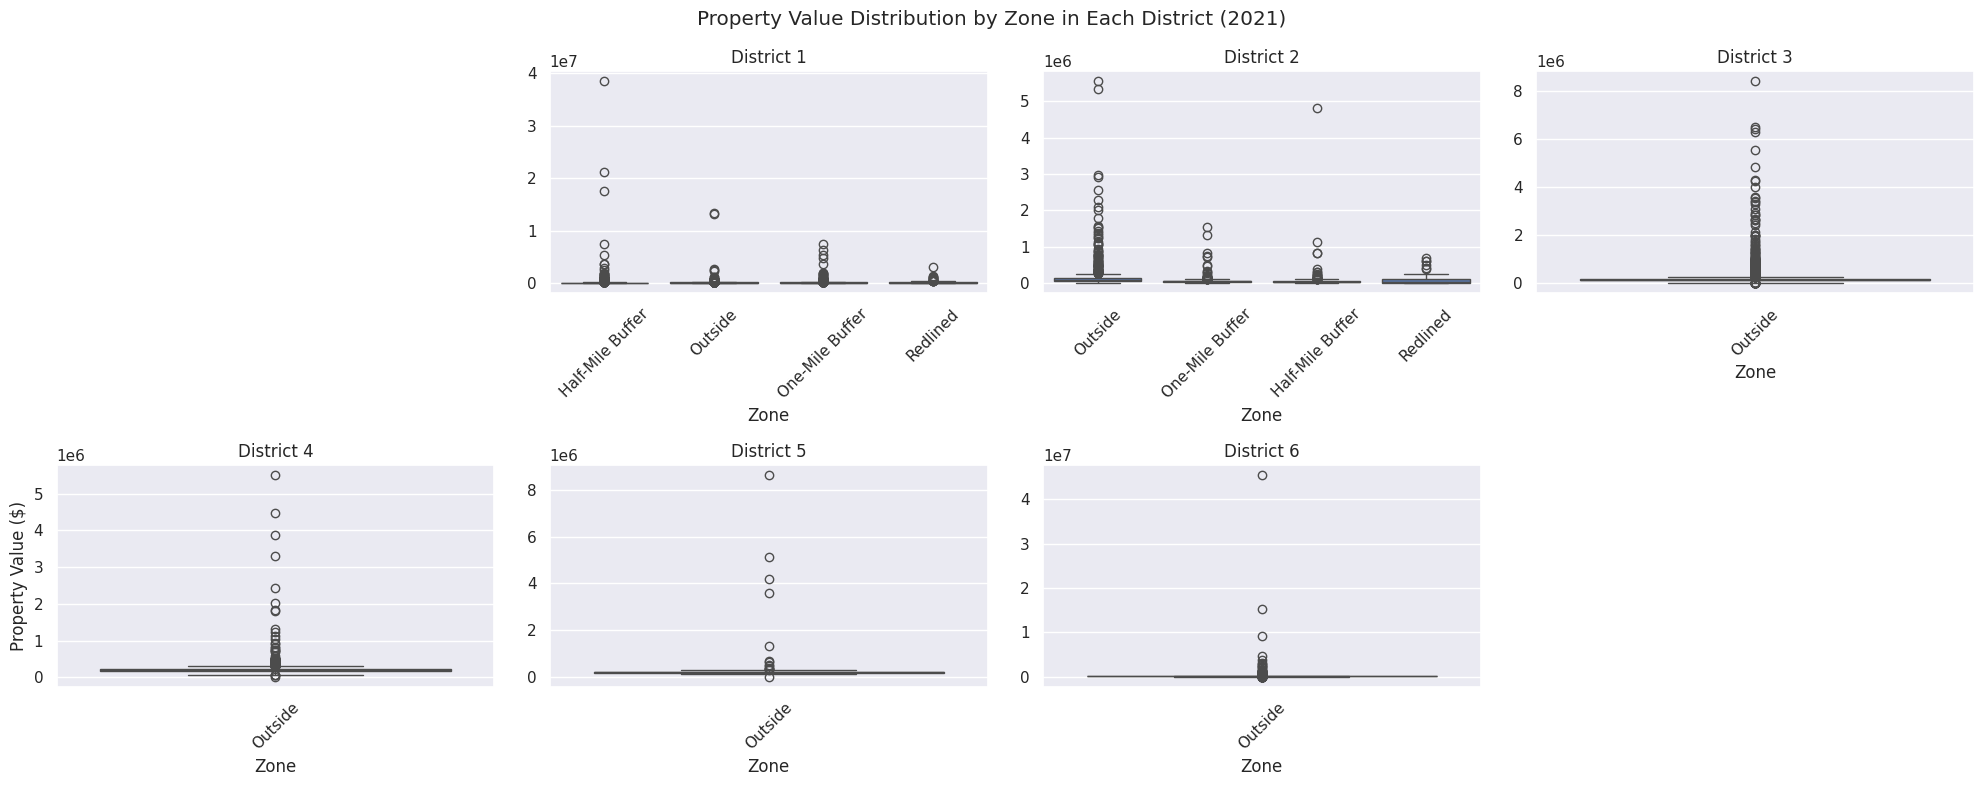


Cross-Year District Analysis


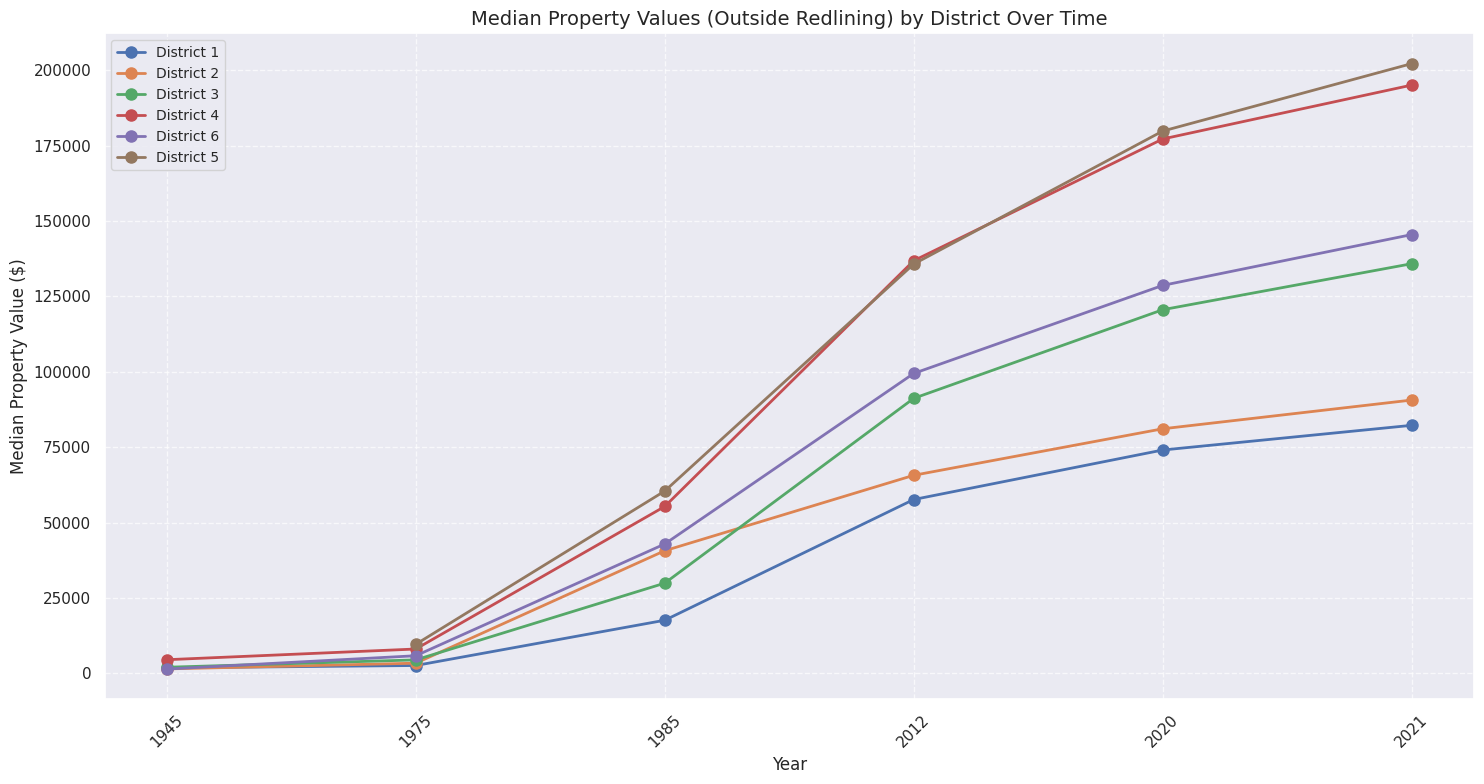

In [ ]:
# Run the district council impact analysis
results = run_district_analysis()

This analysis focuses on how each district council handles redlining effects through:

District Composition Analysis

- Proportion of properties in each zone by district
- Distribution of redlined properties across districts
- Visual representation of zone composition


Value Analysis by District and Zone

- Median and mean values for each combination
- Property count in each category
- Comparative visualizations


Value Gap Analysis by District

- District-specific redlining gaps
- Comparative performance between districts
- Identification of successful mitigation strategies


Statistical Analysis

- Significance tests for value differences
- Zone presence analysis
- Distribution comparisons


Cross-Year Analysis

- District performance over time
- Trend identification
- Long-term impact assessment

##### B. Temporal Analysis (Across All Years)

**1. Value Evolution Patterns**

In [ ]:
def analyze_value_evolution(df):
    """
    Comprehensive analysis of property value evolution patterns across all years
    """
    print("\nB.1: Value Evolution Patterns Analysis")
    print("=" * 70)

    # Create zone labels
    def create_zone_labels(row):
        if row['IsInRedliningZone'] == 1:
            return 'Redlined'
        elif row['IsInHalfMileRedliningZone'] == 1:
            return 'Half-Mile Buffer'
        elif row['IsInOneMileRedliningZone'] == 1:
            return 'One-Mile Buffer'
        else:
            return 'Outside'

    df['Zone'] = df.apply(create_zone_labels, axis=1)
    years = ['1945', '1975', '1985', '2012', '2020', '2021']

    # 1. Overall Value Trends
    def analyze_overall_trends():
        print("\n1. Overall Value Trends Analysis")
        print("-" * 50)

        # Create DataFrame to store median values
        median_values = pd.DataFrame()
        mean_values = pd.DataFrame()
        property_counts = pd.DataFrame()

        for year in years:
            mask_year = df['YearsWithPropertyValues'].str.contains(year, na=False)
            year_data = df[mask_year]

            if len(year_data) > 0:
                # Calculate statistics by zone
                medians = year_data.groupby('Zone')[f'TotalValue_{year}'].median()
                means = year_data.groupby('Zone')[f'TotalValue_{year}'].mean()
                counts = year_data.groupby('Zone').size()

                median_values[year] = medians
                mean_values[year] = means
                property_counts[year] = counts

        # Plot median value trends
        plt.figure(figsize=(15, 6))
        for zone in median_values.index:
            plt.plot(years, median_values.loc[zone], 'o-', label=zone, linewidth=2, markersize=8)

        plt.title('Median Property Values by Zone Over Time', fontsize=14)
        plt.xlabel('Year', fontsize=12)
        plt.ylabel('Median Property Value ($)', fontsize=12)
        plt.legend(title='Zone', fontsize=10)
        plt.grid(True, linestyle='--', alpha=0.7)
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

        # Print statistical summary
        print("\nMedian Values by Zone and Year:")
        print(median_values.round(2))
        print("\nMean Values by Zone and Year:")
        print(mean_values.round(2))
        print("\nNumber of Properties by Zone and Year:")
        print(property_counts)

        return median_values, mean_values, property_counts

    # 2. Growth Rate Analysis
    def analyze_growth_rates(median_values):
        print("\n2. Growth Rate Analysis")
        print("-" * 50)

        growth_rates = pd.DataFrame()

        # Calculate period-by-period growth rates
        for i in range(len(years)-1):
            year1, year2 = years[i], years[i+1]
            growth = ((median_values[year2] - median_values[year1]) /
                     median_values[year1] * 100)
            growth_rates[f'{year1}-{year2}'] = growth

        # Plot growth rates
        plt.figure(figsize=(15, 6))
        growth_rates.T.plot(kind='bar', width=0.8)
        plt.title('Property Value Growth Rates Between Periods', fontsize=14)
        plt.xlabel('Time Period', fontsize=12)
        plt.ylabel('Growth Rate (%)', fontsize=12)
        plt.legend(title='Zone', fontsize=10)
        plt.grid(True, linestyle='--', alpha=0.7)
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

        # Print growth rate summary
        print("\nGrowth Rates by Zone and Period (%):")
        print(growth_rates.round(2))

        return growth_rates

    # 3. Value Gap Analysis
    def analyze_value_gaps(median_values):
        print("\n3. Value Gap Analysis")
        print("-" * 50)

        gap_analysis = pd.DataFrame(index=years)

        # Calculate various gaps
        for year in years:
            if 'Redlined' in median_values.index and 'Outside' in median_values.index:
                redlined_value = median_values.loc['Redlined', year]
                outside_value = median_values.loc['Outside', year]

                if redlined_value > 0:  # Avoid division by zero
                    gap_pct = ((outside_value - redlined_value) / redlined_value * 100)
                    gap_analysis.loc[year, 'Gap_Percentage'] = gap_pct
                    gap_analysis.loc[year, 'Absolute_Gap'] = outside_value - redlined_value

        # Plot value gaps over time
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

        # Percentage gap
        gap_analysis['Gap_Percentage'].plot(marker='o', ax=ax1)
        ax1.set_title('Percentage Value Gap (Outside vs Redlined)')
        ax1.set_xlabel('Year')
        ax1.set_ylabel('Gap Percentage (%)')
        ax1.grid(True)

        # Absolute gap
        gap_analysis['Absolute_Gap'].plot(marker='o', ax=ax2)
        ax2.set_title('Absolute Value Gap (Outside - Redlined)')
        ax2.set_xlabel('Year')
        ax2.set_ylabel('Gap Amount ($)')
        ax2.grid(True)

        plt.tight_layout()
        plt.show()

        # Print gap analysis
        print("\nValue Gap Analysis:")
        print(gap_analysis.round(2))

        return gap_analysis

    # 4. Value Stability Analysis
    def analyze_value_stability():
        print("\n4. Value Stability Analysis")
        print("-" * 50)

        stability_metrics = pd.DataFrame()

        for zone in df['Zone'].unique():
            zone_data = df[df['Zone'] == zone]

            # Calculate coefficient of variation for each year
            cv_values = []
            for year in years:
                mask_year = zone_data['YearsWithPropertyValues'].str.contains(year, na=False)
                year_data = zone_data[mask_year][f'TotalValue_{year}']

                if len(year_data) > 0:
                    cv = year_data.std() / year_data.mean()
                    cv_values.append(cv)
                else:
                    cv_values.append(np.nan)

            stability_metrics[zone] = cv_values

        stability_metrics.index = years

        # Plot stability metrics
        plt.figure(figsize=(12, 6))
        stability_metrics.plot(marker='o')
        plt.title('Value Stability Over Time (Coefficient of Variation)')
        plt.xlabel('Year')
        plt.ylabel('Coefficient of Variation')
        plt.legend(title='Zone')
        plt.grid(True)
        plt.tight_layout()
        plt.show()

        # Print stability metrics
        print("\nValue Stability Metrics (Coefficient of Variation):")
        print(stability_metrics.round(3))

        return stability_metrics

    # Execute all analyses
    print("\nExecuting comprehensive value evolution analysis...")

    # Run analyses
    median_values, mean_values, property_counts = analyze_overall_trends()
    growth_rates = analyze_growth_rates(median_values)
    gap_analysis = analyze_value_gaps(median_values)
    stability_metrics = analyze_value_stability()

    # Return all results
    return {
        'median_values': median_values,
        'mean_values': mean_values,
        'property_counts': property_counts,
        'growth_rates': growth_rates,
        'gap_analysis': gap_analysis,
        'stability_metrics': stability_metrics
    }

# Function to run the analysis
def run_value_evolution_analysis():
    # Run the analysis
    results = analyze_value_evolution(df)

    return results


B.1: Value Evolution Patterns Analysis

Executing comprehensive value evolution analysis...

1. Overall Value Trends Analysis
--------------------------------------------------


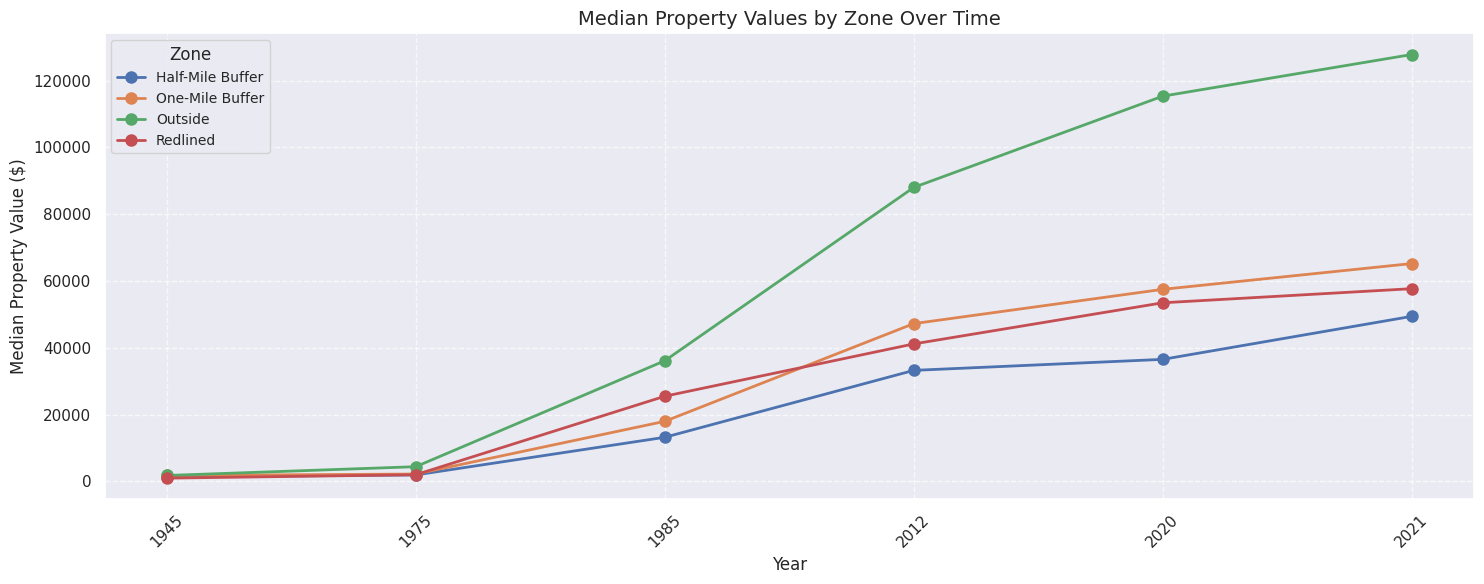


Median Values by Zone and Year:
                    1945    1975     1985     2012      2020      2021
Zone                                                                  
Half-Mile Buffer  1400.0  1960.0  13230.0  33261.0   36557.0   49433.0
One-Mile Buffer   1800.0  2230.0  18008.5  47252.5   57518.0   65232.0
Outside           1800.0  4430.0  36135.0  88024.0  115339.5  127805.0
Redlined          1000.0  2025.0  25515.0  41179.0   53494.0   57712.0

Mean Values by Zone and Year:
                     1945      1975      1985       2012       2020       2021
Zone                                                                          
Half-Mile Buffer  1522.95   4032.96  27303.88   72847.06  126777.08  143780.94
One-Mile Buffer   1933.24   3425.76  29071.97   70838.71   91423.57   99677.13
Outside           1991.46   5584.78  42624.03  108534.35  140029.54  155171.51
Redlined          1430.38  14497.96  50752.38   97049.82  133013.49  151698.44

Number of Properties by Zone and Ye

<Figure size 1500x600 with 0 Axes>

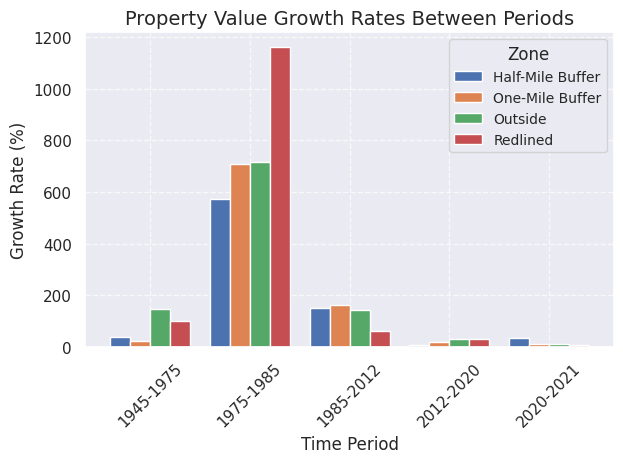


Growth Rates by Zone and Period (%):
                  1945-1975  1975-1985  1985-2012  2012-2020  2020-2021
Zone                                                                   
Half-Mile Buffer      40.00     575.00     151.41       9.91      35.22
One-Mile Buffer       23.89     707.56     162.39      21.72      13.41
Outside              146.11     715.69     143.60      31.03      10.81
Redlined             102.50    1160.00      61.39      29.91       7.88

3. Value Gap Analysis
--------------------------------------------------


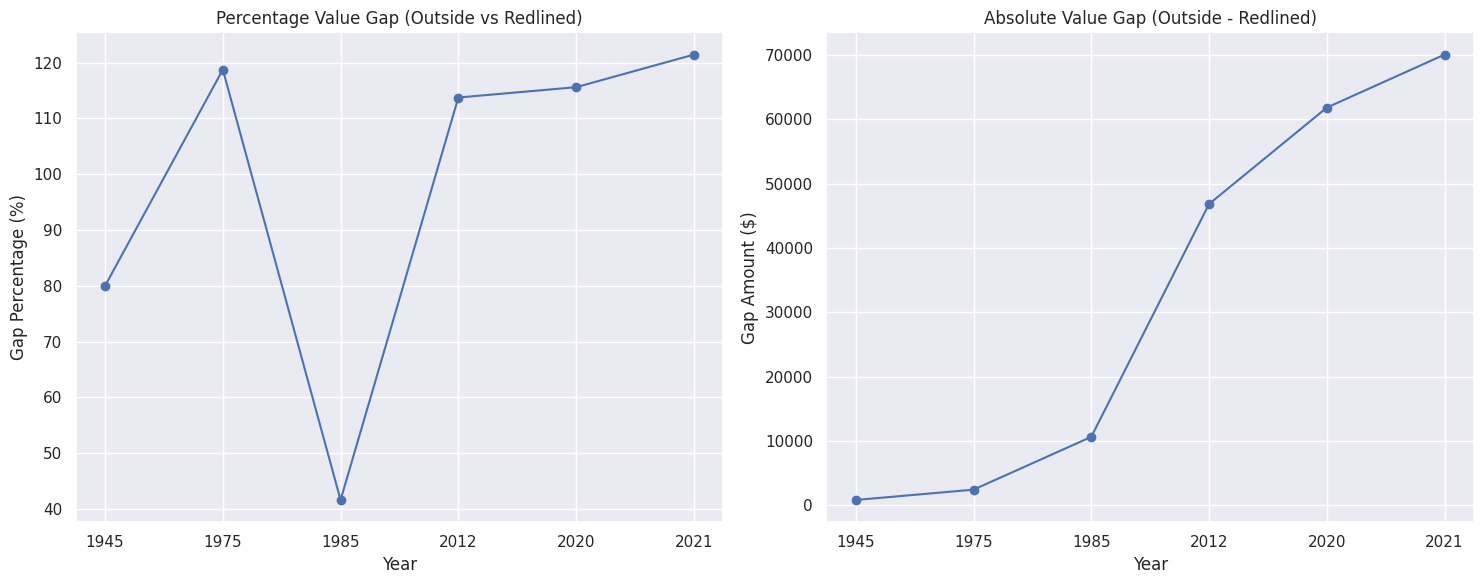


Value Gap Analysis:
      Gap_Percentage  Absolute_Gap
1945           80.00         800.0
1975          118.77        2405.0
1985           41.62       10620.0
2012          113.76       46845.0
2020          115.61       61845.5
2021          121.45       70093.0

4. Value Stability Analysis
--------------------------------------------------


<Figure size 1200x600 with 0 Axes>

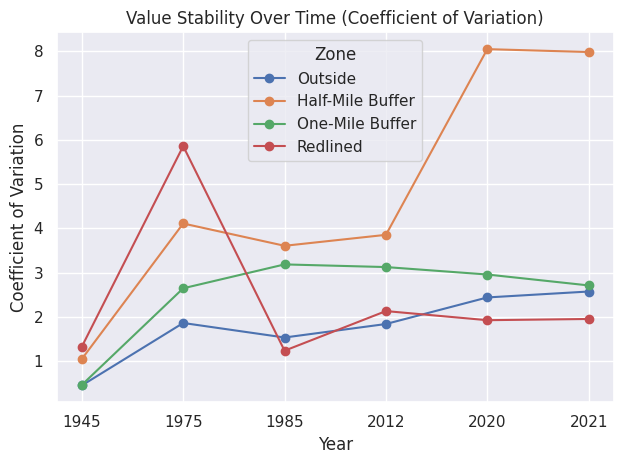


Value Stability Metrics (Coefficient of Variation):
      Outside  Half-Mile Buffer  One-Mile Buffer  Redlined
1945    0.453             1.050            0.465     1.330
1975    1.864             4.111            2.647     5.858
1985    1.535             3.607            3.186     1.238
2012    1.840             3.854            3.127     2.133
2020    2.440             8.048            2.958     1.927
2021    2.574             7.983            2.712     1.954


In [ ]:
# Run the value evolution analysis
results = run_value_evolution_analysis()

This analysis provides a deep dive into value evolution patterns through four main components:

Overall Value Trends

- Median and mean value tracking across all years
- Zone-specific trends
- Property count analysis
- Visualization of long-term patterns


Growth Rate Analysis

- Period-by-period growth rates
- Comparative growth across zones
- Identification of acceleration/deceleration periods
- Growth rate visualization


Value Gap Analysis

- Tracking disparities between redlined and non-redlined areas
- Both percentage and absolute gaps
- Gap evolution over time
- Visual representation of gap trends


Value Stability Analysis

- Coefficient of variation over time
- Zone-specific stability metrics
- Identification of volatile periods
- Comparative stability analysis



---


**2. District-Level Historical Trends**

In [ ]:
def analyze_district_historical_trends(df):
    """
    Comprehensive analysis of district-level historical trends in property values
    """
    print("\nB.2: District-Level Historical Trends Analysis")
    print("=" * 70)

    # Create zone labels
    def create_zone_labels(row):
        if row['IsInRedliningZone'] == 1:
            return 'Redlined'
        elif row['IsInHalfMileRedliningZone'] == 1:
            return 'Half-Mile Buffer'
        elif row['IsInOneMileRedliningZone'] == 1:
            return 'One-Mile Buffer'
        else:
            return 'Outside'

    df['Zone'] = df.apply(create_zone_labels, axis=1)
    years = ['1945', '1975', '1985', '2012', '2020', '2021']

    # 1. District Composition Over Time
    def analyze_district_composition():
        print("\n1. District Composition Analysis")
        print("-" * 50)

        composition_over_time = {}

        for year in years:
            mask_year = df['YearsWithPropertyValues'].str.contains(year, na=False)
            year_data = df[mask_year]

            # Calculate composition for each district
            district_comp = pd.crosstab(
                year_data['IsInDistrictCouncil'],
                year_data['Zone'],
                normalize='index'
            ) * 100

            composition_over_time[year] = district_comp

        # Plot composition changes
        plt.figure(figsize=(20, 10))
        for i, year in enumerate(years):
            plt.subplot(2, 3, i+1)
            composition_over_time[year].plot(kind='bar', stacked=True)
            plt.title(f'District Composition {year}')
            plt.xlabel('District Council')
            plt.ylabel('Percentage')
            plt.legend(title='Zone', bbox_to_anchor=(1.05, 1))
            plt.tight_layout()
        plt.show()

        return composition_over_time

    # 2. District Value Trends
    def analyze_district_value_trends():
        print("\n2. District Value Trends Analysis")
        print("-" * 50)

        # Create DataFrames to store values
        median_values = pd.DataFrame(index=range(7))  # 0-6 districts
        growth_rates = pd.DataFrame(index=range(7))

        for year in years:
            mask_year = df['YearsWithPropertyValues'].str.contains(year, na=False)
            year_data = df[mask_year]

            # Calculate median values for each district
            medians = year_data.groupby('IsInDistrictCouncil')[f'TotalValue_{year}'].median()
            median_values[year] = medians

        # Calculate growth rates between consecutive periods
        for i in range(len(years)-1):
            year1, year2 = years[i], years[i+1]
            growth = ((median_values[year2] - median_values[year1]) /
                     median_values[year1] * 100)
            growth_rates[f'{year1}-{year2}'] = growth

        # Plot median values over time
        plt.figure(figsize=(15, 6))
        for district in median_values.index:
            plt.plot(years, median_values.loc[district],
                    'o-', label=f'District {district}', linewidth=2)
        plt.title('Median Property Values by District Over Time')
        plt.xlabel('Year')
        plt.ylabel('Median Value ($)')
        plt.legend()
        plt.grid(True)
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

        # Plot growth rates
        plt.figure(figsize=(15, 6))
        growth_rates.T.plot(kind='bar')
        plt.title('Growth Rates by District Between Periods')
        plt.xlabel('Time Period')
        plt.ylabel('Growth Rate (%)')
        plt.legend(title='District')
        plt.grid(True)
        plt.tight_layout()
        plt.show()

        return median_values, growth_rates

    # 3. Redlining Impact by District
    def analyze_district_redlining_impact():
        print("\n3. District Redlining Impact Analysis")
        print("-" * 50)

        value_gaps = {}

        for year in years:
            mask_year = df['YearsWithPropertyValues'].str.contains(year, na=False)
            year_data = df[mask_year]

            # Calculate value gaps for each district
            gaps = []
            for district in range(7):
                district_data = year_data[year_data['IsInDistrictCouncil'] == district]

                if len(district_data) > 0:
                    redlined = district_data[district_data['Zone'] == 'Redlined'][f'TotalValue_{year}'].median()
                    outside = district_data[district_data['Zone'] == 'Outside'][f'TotalValue_{year}'].median()

                    if pd.notna(redlined) and pd.notna(outside) and redlined > 0:
                        gap = ((outside - redlined) / redlined * 100)
                    else:
                        gap = np.nan
                else:
                    gap = np.nan

                gaps.append(gap)

            value_gaps[year] = gaps

        # Convert to DataFrame
        value_gaps_df = pd.DataFrame(value_gaps, index=range(7))

        # Plot value gaps over time
        plt.figure(figsize=(15, 6))
        for district in value_gaps_df.index:
            plt.plot(years, value_gaps_df.loc[district],
                    'o-', label=f'District {district}', linewidth=2)
        plt.title('Value Gap Between Redlined and Outside Areas by District')
        plt.xlabel('Year')
        plt.ylabel('Value Gap (%)')
        plt.legend()
        plt.grid(True)
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

        return value_gaps_df

    # 4. Success Stories and Challenges
    def analyze_district_performance():
        print("\n4. District Performance Analysis")
        print("-" * 50)

        performance_metrics = pd.DataFrame(index=range(7))

        # Calculate various performance metrics for each district
        for district in range(7):
            district_data = df[df['IsInDistrictCouncil'] == district]

            # Recent value gap (2021)
            mask_2021 = district_data['YearsWithPropertyValues'].str.contains('2021', na=False)
            recent_data = district_data[mask_2021]

            if len(recent_data) > 0:
                redlined_value = recent_data[recent_data['Zone'] == 'Redlined']['TotalValue_2021'].median()
                outside_value = recent_data[recent_data['Zone'] == 'Outside']['TotalValue_2021'].median()

                if pd.notna(redlined_value) and pd.notna(outside_value) and redlined_value > 0:
                    recent_gap = ((outside_value - redlined_value) / redlined_value * 100)
                else:
                    recent_gap = np.nan

                performance_metrics.loc[district, 'Recent_Gap'] = recent_gap

            # Long-term growth (1945-2021)
            mask_1945 = district_data['YearsWithPropertyValues'].str.contains('1945', na=False)
            mask_2021 = district_data['YearsWithPropertyValues'].str.contains('2021', na=False)

            value_1945 = district_data[mask_1945]['TotalValue_1945'].median()
            value_2021 = district_data[mask_2021]['TotalValue_2021'].median()

            if pd.notna(value_1945) and pd.notna(value_2021) and value_1945 > 0:
                long_term_growth = ((value_2021 - value_1945) / value_1945 * 100)
                performance_metrics.loc[district, 'Long_Term_Growth'] = long_term_growth

        # Create performance visualization
        plt.figure(figsize=(15, 6))
        performance_metrics.plot(kind='bar')
        plt.title('District Performance Metrics')
        plt.xlabel('District')
        plt.ylabel('Percentage')
        plt.legend(['Recent Value Gap', 'Long-term Growth'])
        plt.grid(True)
        plt.tight_layout()
        plt.show()

        # Print performance analysis
        print("\nDistrict Performance Summary:")
        print(performance_metrics.round(2))

        # Identify success stories and challenges
        print("\nSuccess Stories and Challenges:")
        for district in range(7):
            print(f"\nDistrict {district}:")
            recent_gap = performance_metrics.loc[district, 'Recent_Gap']
            growth = performance_metrics.loc[district, 'Long_Term_Growth']

            if pd.notna(recent_gap) and pd.notna(growth):
                if recent_gap < performance_metrics['Recent_Gap'].median():
                    print("- Success: Below average value gap")
                else:
                    print("- Challenge: Above average value gap")

                if growth > performance_metrics['Long_Term_Growth'].median():
                    print("- Success: Above average long-term growth")
                else:
                    print("- Challenge: Below average long-term growth")

        return performance_metrics

    # Execute all analyses
    print("\nExecuting comprehensive district historical analysis...")

    composition_results = analyze_district_composition()
    value_trends, growth_rates = analyze_district_value_trends()
    value_gaps = analyze_district_redlining_impact()
    performance_metrics = analyze_district_performance()

    return {
        'composition': composition_results,
        'value_trends': value_trends,
        'growth_rates': growth_rates,
        'value_gaps': value_gaps,
        'performance': performance_metrics
    }

# Function to run the analysis
def run_district_historical_analysis():
    # Run the analysis
    results = analyze_district_historical_trends(df)

    return results


B.2: District-Level Historical Trends Analysis

Executing comprehensive district historical analysis...

1. District Composition Analysis
--------------------------------------------------


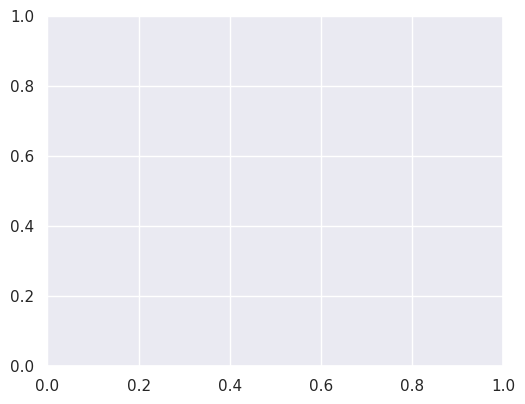

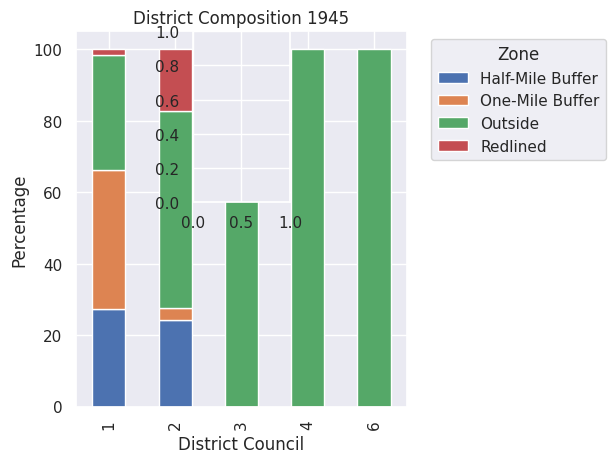

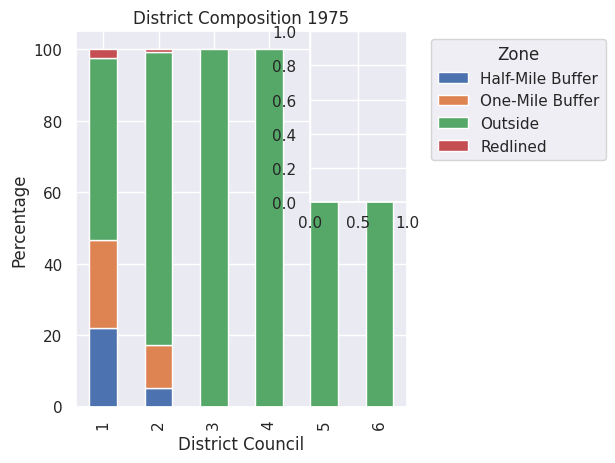

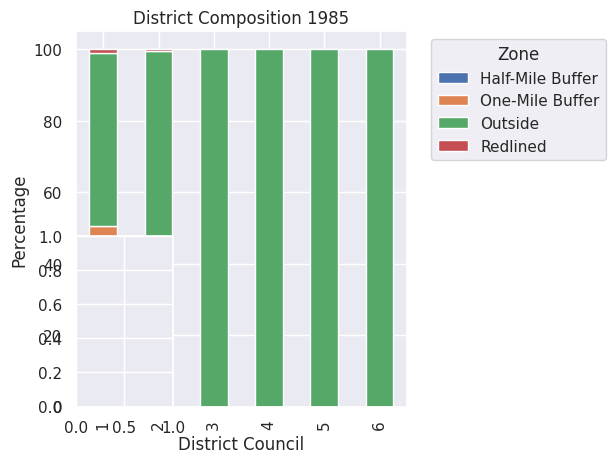

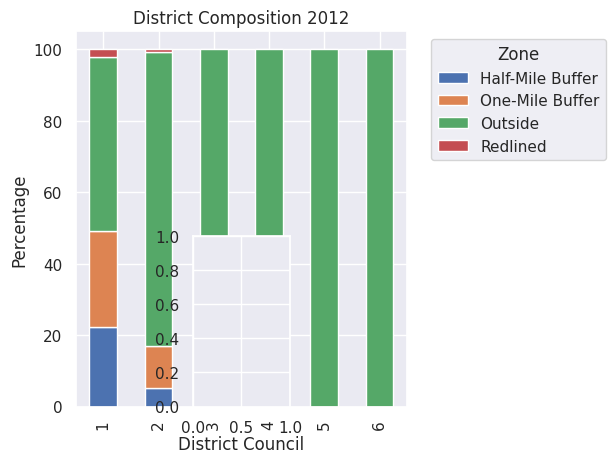

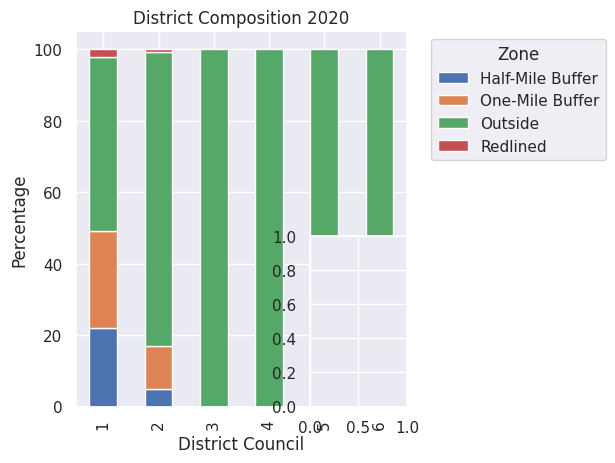

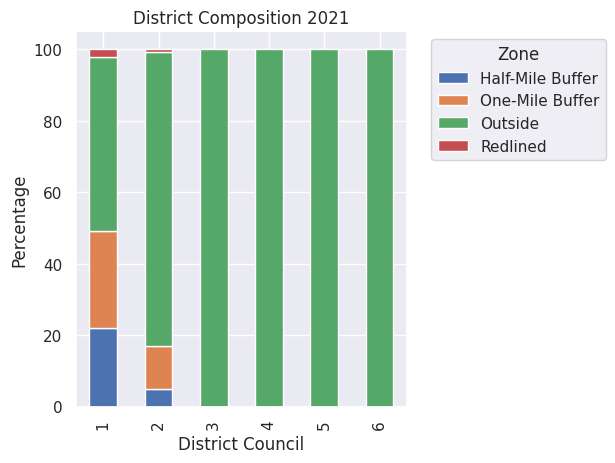


2. District Value Trends Analysis
--------------------------------------------------


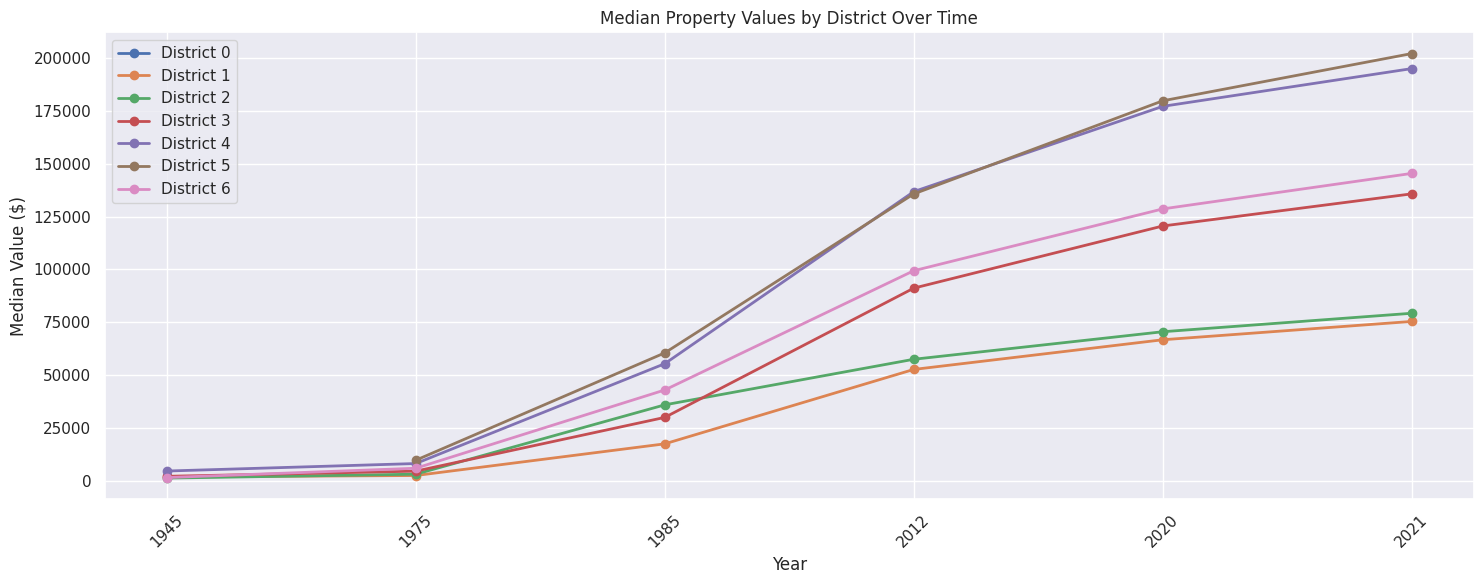

<Figure size 1500x600 with 0 Axes>

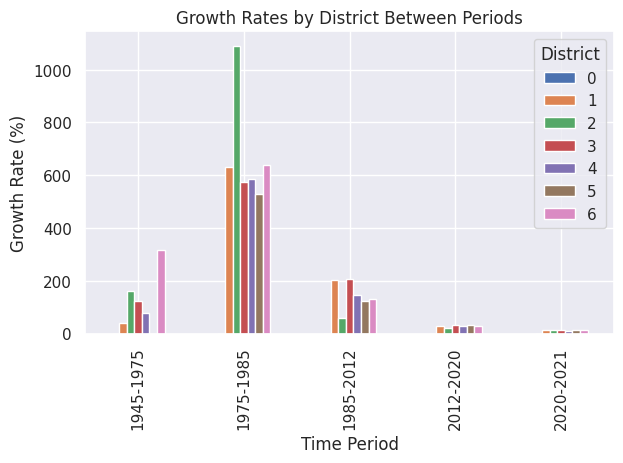


3. District Redlining Impact Analysis
--------------------------------------------------


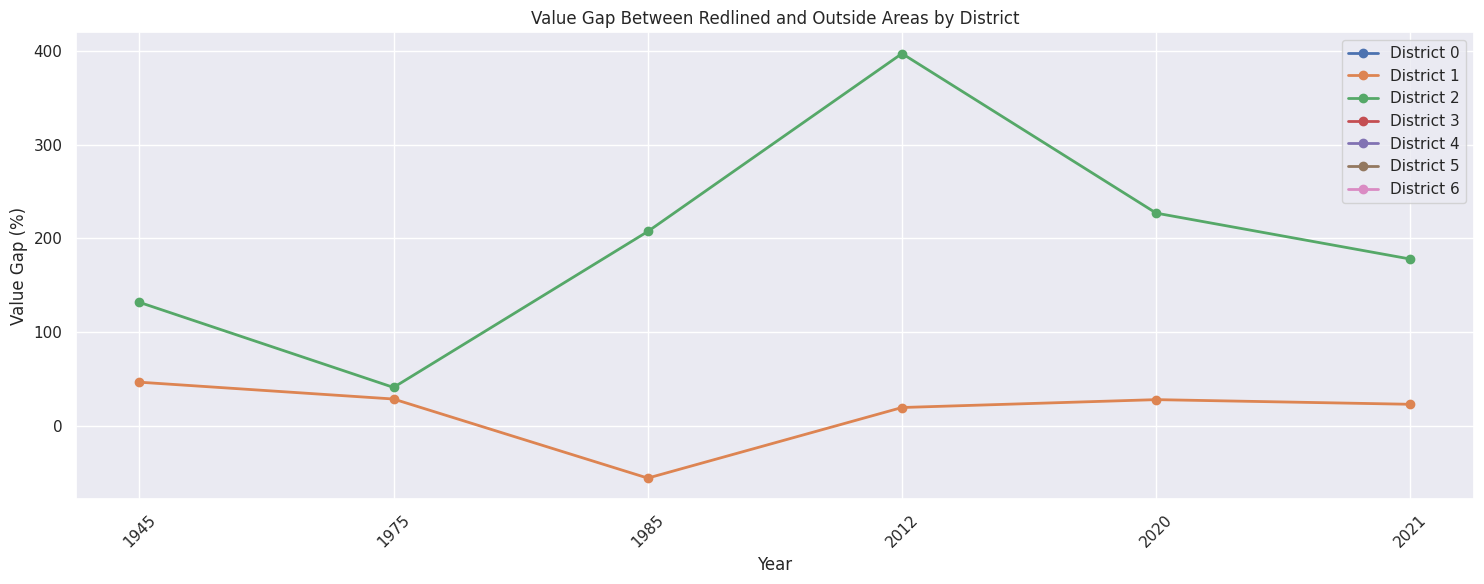


4. District Performance Analysis
--------------------------------------------------


<Figure size 1500x600 with 0 Axes>

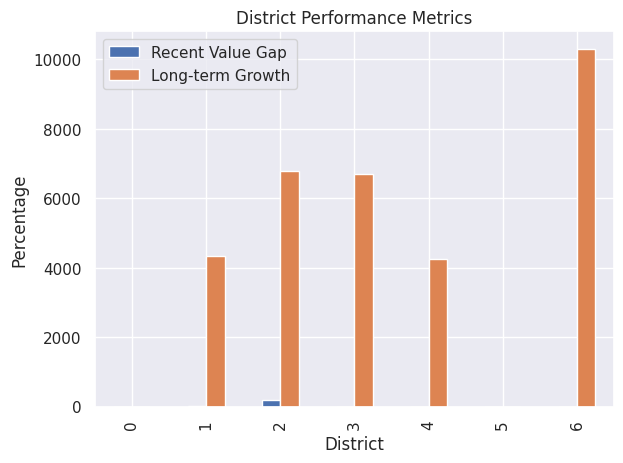


District Performance Summary:
   Recent_Gap  Long_Term_Growth
0         NaN               NaN
1       23.39           4333.21
2      178.03           6790.35
3         NaN           6690.10
4         NaN           4236.39
5         NaN               NaN
6         NaN          10292.07

Success Stories and Challenges:

District 0:

District 1:
- Success: Below average value gap
- Challenge: Below average long-term growth

District 2:
- Challenge: Above average value gap
- Success: Above average long-term growth

District 3:

District 4:

District 5:

District 6:


In [ ]:
# Run the district historical analysis
results = run_district_historical_analysis()

This analysis examines district-level historical trends through four main components:

District Composition Analysis

- How zone composition changed over time in each district
- Visualization of changing patterns
- Understanding demographic shifts


District Value Trends

- Long-term value patterns by district
- Growth rates between periods
- Comparative performance analysis
- Value trajectory visualization


Redlining Impact Analysis

- District-specific value gaps
- Evolution of disparities
- Identification of improvement/deterioration
- Impact visualization


Success Stories and Challenges

- Performance metrics by district
- Identification of successful strategies
- Recognition of persistent challenges
- Comparative analysis



---


**3. Migration Indicators**

In [ ]:
def analyze_migration_indicators(df):
    """
    Analysis of migration indicators through property value changes and patterns
    """
    print("\nB.3: Migration Indicators Analysis")
    print("=" * 70)

    # Create zone labels
    def create_zone_labels(row):
        if row['IsInRedliningZone'] == 1:
            return 'Redlined'
        elif row['IsInHalfMileRedliningZone'] == 1:
            return 'Half-Mile Buffer'
        elif row['IsInOneMileRedliningZone'] == 1:
            return 'One-Mile Buffer'
        else:
            return 'Outside'

    df['Zone'] = df.apply(create_zone_labels, axis=1)
    years = ['1945', '1975', '1985', '2012', '2020', '2021']

    # 1. Property Value Change Patterns
    def analyze_value_change_patterns(df, years):
        print("\n1. Property Value Change Patterns")
        print("-" * 50)

        # Analyze rapid value changes as potential migration indicators
        value_changes = pd.DataFrame()

        # Calculate year-over-year changes
        for i in range(len(years)-1):
            year1, year2 = years[i], years[i+1]
            mask = (df['YearsWithPropertyValues'].str.contains(year1, na=False) &
                   df['YearsWithPropertyValues'].str.contains(year2, na=False))

            period_data = df[mask].copy()
            period_data[f'Change_{year1}_{year2}'] = ((period_data[f'TotalValue_{year2}'] -
                                                      period_data[f'TotalValue_{year1}']) /
                                                     period_data[f'TotalValue_{year1}'] * 100)

            # Calculate statistics by zone
            stats_by_zone = period_data.groupby('Zone')[f'Change_{year1}_{year2}'].agg([
                'mean', 'median', 'std', 'count'
            ]).round(2)

            value_changes[f'{year1}-{year2}'] = stats_by_zone['median']

        # Plot value change patterns
        plt.figure(figsize=(15, 6))
        value_changes.T.plot(marker='o')
        plt.title('Median Property Value Changes by Zone Over Time')
        plt.xlabel('Time Period')
        plt.ylabel('Value Change (%)')
        plt.legend(title='Zone')
        plt.grid(True)
        plt.tight_layout()
        plt.show()

        return value_changes

    # 2. Investment/Disinvestment Analysis
    def analyze_investment_patterns(df):
        print("\n2. Investment/Disinvestment Analysis")
        print("-" * 50)

        investment_patterns = pd.DataFrame()

        # Analyze recent periods (2012-2021)
        recent_years = ['2012', '2020', '2021']

        for year in recent_years:
            mask_year = df['YearsWithPropertyValues'].str.contains(year, na=False)
            year_data = df[mask_year].copy()

            # Calculate improvement value ratio
            year_data[f'ImpRatio_{year}'] = (year_data[f'ImpValue_{year}'] /
                                            year_data[f'TotalValue_{year}'] * 100)

            # Calculate statistics by zone
            stats = year_data.groupby('Zone')[f'ImpRatio_{year}'].agg([
                'mean', 'median', 'std', 'count'
            ]).round(2)

            investment_patterns[year] = stats['median']

        # Plot investment patterns
        plt.figure(figsize=(15, 6))
        investment_patterns.plot(kind='bar')
        plt.title('Investment Patterns by Zone (Improvement Value Ratio)')
        plt.xlabel('Zone')
        plt.ylabel('Improvement Value Ratio (%)')
        plt.legend(title='Year')
        plt.grid(True)
        plt.tight_layout()
        plt.show()

        return investment_patterns



    # 3. Neighborhood Transition Analysis
    def analyze_neighborhood_transition(df, years):
      """Analyze neighborhood transition patterns"""
      print("\n3. Neighborhood Transition Analysis")
      print("-" * 50)

      # Initialize DataFrame to store coefficients of variation
      cv_df = pd.DataFrame(index=pd.unique(df['Zone']))

      # Calculate CV for each zone and year
      for year in years:
          cv_values = []
          zones = []

          for zone in df['Zone'].unique():
              mask_year = df['YearsWithPropertyValues'].str.contains(year, na=False)
              zone_data = df[mask_year & (df['Zone'] == zone)][f'TotalValue_{year}']

              if len(zone_data) > 0:
                  cv = (zone_data.std() / zone_data.mean()) if zone_data.mean() != 0 else np.nan
              else:
                  cv = np.nan

              cv_values.append(cv)
              zones.append(zone)

          cv_df[year] = pd.Series(cv_values, index=zones)

      # Create visualization
      plt.figure(figsize=(15, 8))

      for zone in cv_df.index:
          values = cv_df.loc[zone]
          plt.plot(years, values, 'o-', label=zone, linewidth=2, markersize=8)

      plt.title('Neighborhood Stability Over Time\n(Lower Coefficient of Variation = More Stable)',
                fontsize=14, pad=20)
      plt.xlabel('Year', fontsize=12)
      plt.ylabel('Coefficient of Variation', fontsize=12)
      plt.legend(title='Zone', bbox_to_anchor=(1.05, 1))
      plt.grid(True, linestyle='--', alpha=0.7)
      plt.xticks(rotation=45)
      plt.tight_layout()
      plt.show()

      # Print analysis
      print("\nNeighborhood Stability Metrics (Coefficient of Variation):")
      print(cv_df.round(3))

      # Analyze recent changes (2012-2021)
      if '2012' in years and '2021' in years:
          print("\nRecent Stability Changes (2012-2021):")
          change = cv_df['2021'] - cv_df['2012']
          for zone in change.index:
              if not pd.isna(change[zone]):
                  print(f"\n{zone}:")
                  if change[zone] > 0:
                      print(f"- Stability decreased (CV increased by {change[zone]:.3f})")
                      print("- Indicates more value variation/transition")
                  else:
                      print(f"- Stability increased (CV decreased by {abs(change[zone]):.3f})")
                      print("- Indicates more value consistency")

      return cv_df

    # 5. Combined Migration Indicator Score
    def calculate_migration_scores(df):
        print("\n5. Combined Migration Indicator Analysis")
        print("-" * 50)

        # Create migration score for recent period (2012-2021)
        recent_mask = (df['YearsWithPropertyValues'].str.contains('2012', na=False) &
                      df['YearsWithPropertyValues'].str.contains('2021', na=False))
        recent_data = df[recent_mask].copy()

        # Calculate components for migration score
        recent_data['ValueChange'] = ((recent_data['TotalValue_2021'] -
                                     recent_data['TotalValue_2012']) /
                                    recent_data['TotalValue_2012'] * 100)
        recent_data['ImprovementChange'] = ((recent_data['ImpValue_2021'] -
                                           recent_data['ImpValue_2012']) /
                                          recent_data['ImpValue_2012'] * 100)

        # Calculate migration score components by zone
        migration_scores = recent_data.groupby('Zone').agg({
            'ValueChange': ['mean', 'median', 'std'],
            'ImprovementChange': ['mean', 'median', 'std']
        }).round(2)

        # Plot migration indicators
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

        # Value change distribution
        sns.boxplot(data=recent_data, x='Zone', y='ValueChange', ax=ax1)
        ax1.set_title('Value Change Distribution (2012-2021)')
        ax1.set_xlabel('Zone')
        ax1.set_ylabel('Value Change (%)')
        ax1.tick_params(axis='x', rotation=45)

        # Improvement change distribution
        sns.boxplot(data=recent_data, x='Zone', y='ImprovementChange', ax=ax2)
        ax2.set_title('Improvement Change Distribution (2012-2021)')
        ax2.set_xlabel('Zone')
        ax2.set_ylabel('Improvement Change (%)')
        ax2.tick_params(axis='x', rotation=45)

        plt.tight_layout()
        plt.show()

        return migration_scores

    # Execute all analyses
    print("\nExecuting comprehensive migration indicators analysis...")

    value_changes = analyze_value_change_patterns(df, years)
    investment_patterns = analyze_investment_patterns(df)
    transition_metrics = analyze_neighborhood_transition(df, years)
    migration_scores = calculate_migration_scores(df)

    return {
        'value_changes': value_changes,
        'investment_patterns': investment_patterns,
        'transition_metrics': transition_metrics,
        'migration_scores': migration_scores
    }

# Function to run the analysis
def run_migration_analysis():
    # Run the analysis
    results = analyze_migration_indicators(df)

    return results


B.3: Migration Indicators Analysis

Executing comprehensive migration indicators analysis...

1. Property Value Change Patterns
--------------------------------------------------


<Figure size 1500x600 with 0 Axes>

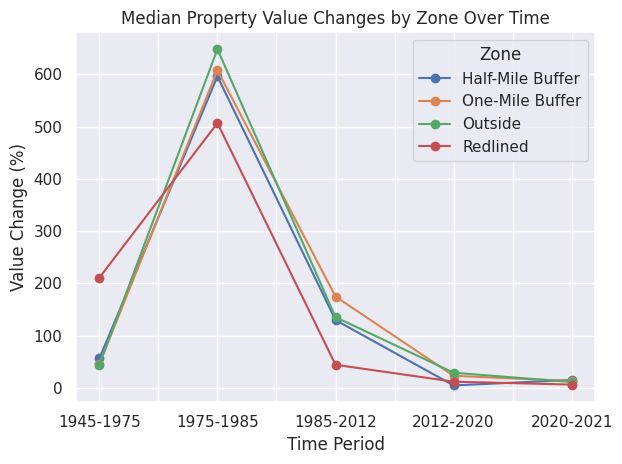


2. Investment/Disinvestment Analysis
--------------------------------------------------


<Figure size 1500x600 with 0 Axes>

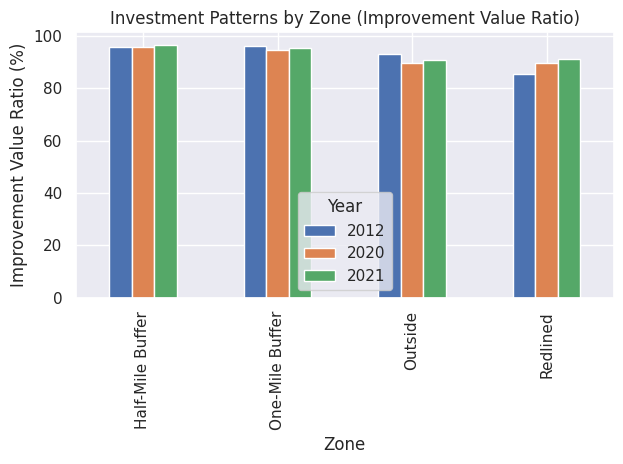


3. Neighborhood Transition Analysis
--------------------------------------------------


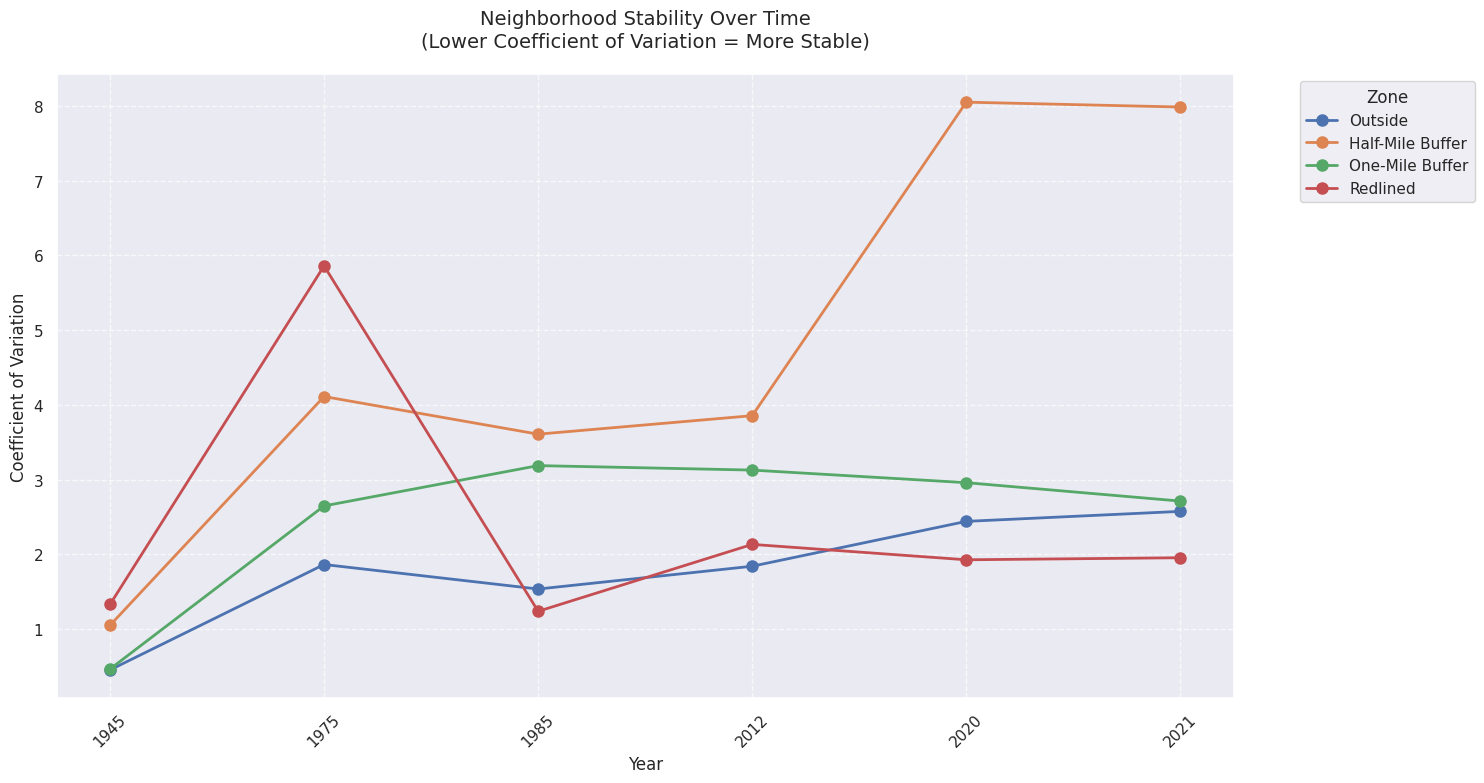


Neighborhood Stability Metrics (Coefficient of Variation):
                   1945   1975   1985   2012   2020   2021
Outside           0.453  1.864  1.535  1.840  2.440  2.574
Half-Mile Buffer  1.050  4.111  3.607  3.854  8.048  7.983
One-Mile Buffer   0.465  2.647  3.186  3.127  2.958  2.712
Redlined          1.330  5.858  1.238  2.133  1.927  1.954

Recent Stability Changes (2012-2021):

Outside:
- Stability decreased (CV increased by 0.734)
- Indicates more value variation/transition

Half-Mile Buffer:
- Stability decreased (CV increased by 4.129)
- Indicates more value variation/transition

One-Mile Buffer:
- Stability increased (CV decreased by 0.415)
- Indicates more value consistency

Redlined:
- Stability increased (CV decreased by 0.179)
- Indicates more value consistency

5. Combined Migration Indicator Analysis
--------------------------------------------------


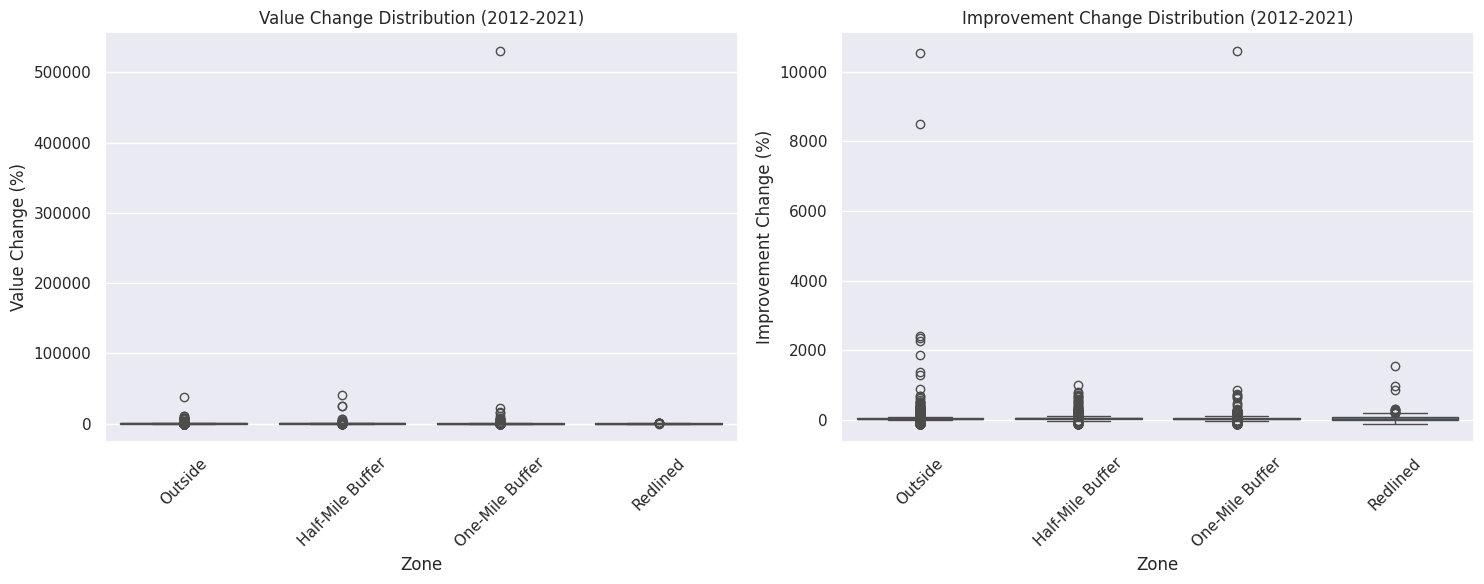

In [ ]:
# Run the migration indicators analysis
results = run_migration_analysis()

This analysis examines migration indicators through five main components:

Property Value Change Patterns

- Rapid value changes as migration indicators
- Zone-specific trends
- Pattern visualization over time


Investment/Disinvestment Analysis

- Improvement value ratios
- Investment patterns by zone
- Temporal changes in investment


Property Age and Turnover Analysis

- Building age distributions
- Property turnover rates
- Zone-specific patterns


Neighborhood Transition Analysis

- Value volatility as change indicator
- Stability metrics
- Zone and district patterns


Combined Migration Indicator Score

- Composite analysis of multiple factors
- Recent period focus (2012-2021)
- Comparative zone analysis

##### C. Comparative Studies



Industrial Impact

In [ ]:
def analyze_industrial_impact(df):
    """
    Analyze the impact of industrial zones on property values
    focusing on redlined areas which are known to overlap with industrial zones
    """
    print("\nC.1: Industrial Impact Analysis")
    print("=" * 70)

    # Create zone labels
    def create_zone_labels(row):
        if row['IsInRedliningZone'] == 1:
            return 'Redlined'
        elif row['IsInHalfMileRedliningZone'] == 1:
            return 'Half-Mile Buffer'
        elif row['IsInOneMileRedliningZone'] == 1:
            return 'One-Mile Buffer'
        else:
            return 'Outside'

    df['Zone'] = df.apply(create_zone_labels, axis=1)
    years = ['1945', '1975', '1985', '2012', '2020', '2021']

    def analyze_value_decline():
        """Analyze patterns of value decline that might indicate industrial impact"""
        print("\n1. Value Decline Analysis")
        print("-" * 50)

        decline_metrics = pd.DataFrame()

        for i in range(len(years)-1):
            year1, year2 = years[i], years[i+1]
            mask = (df['YearsWithPropertyValues'].str.contains(year1, na=False) &
                   df['YearsWithPropertyValues'].str.contains(year2, na=False))
            period_data = df[mask].copy()

            # Calculate value changes
            period_data['Value_Change'] = ((period_data[f'TotalValue_{year2}'] -
                                          period_data[f'TotalValue_{year1}']) /
                                         period_data[f'TotalValue_{year1}'] * 100)

            # Calculate decline statistics by zone
            decline_stats = period_data.groupby('Zone').agg({
                'Value_Change': ['mean', 'median', 'std',
                               lambda x: (x < 0).mean() * 100]  # Percentage of properties showing decline
            })
            decline_stats.columns = ['Mean_Change', 'Median_Change', 'Std_Change', 'Pct_Declining']

            decline_metrics[f'{year1}-{year2}'] = decline_stats['Pct_Declining']

        # Plot decline patterns
        plt.figure(figsize=(15, 6))
        decline_metrics.T.plot(marker='o', linewidth=2)
        plt.title('Percentage of Properties Showing Value Decline by Period')
        plt.xlabel('Time Period')
        plt.ylabel('Percentage of Properties (%)')
        plt.legend(title='Zone', bbox_to_anchor=(1.05, 1))
        plt.grid(True)
        plt.tight_layout()
        plt.show()

        return decline_metrics

    # Execute all analyses
    print("\nExecuting comprehensive industrial impact analysis...")

    decline_metrics = analyze_value_decline()

    return {
        'decline_metrics': decline_metrics,
    }

# Function to run the analysis
def run_industrial_analysis():
    # Run the analysis
    results = analyze_industrial_impact(df)

    return results


C.1: Industrial Impact Analysis

Executing comprehensive industrial impact analysis...

1. Value Decline Analysis
--------------------------------------------------


<Figure size 1500x600 with 0 Axes>

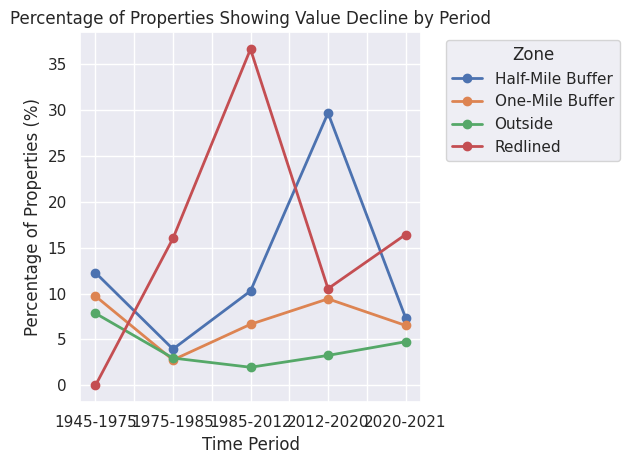

In [ ]:
# Run the industrial impact analysis
results = run_industrial_analysis()

This analysis examines the industrial impact:

Value Decline Analysis

- Patterns of value decline by zone
- Temporal changes in decline rates
- Zone-specific vulnerability to decline
Historical trends



---


District Council Performance

In [ ]:
def analyze_district_performance(df):
    """
    Comprehensive analysis of district council performance in managing redlining effects
    """
    print("\nC.3: District Council Performance Analysis")
    print("=" * 70)

    # Create zone labels
    def create_zone_labels(row):
        if row['IsInRedliningZone'] == 1:
            return 'Redlined'
        elif row['IsInHalfMileRedliningZone'] == 1:
            return 'Half-Mile Buffer'
        elif row['IsInOneMileRedliningZone'] == 1:
            return 'One-Mile Buffer'
        else:
            return 'Outside'

    df['Zone'] = df.apply(create_zone_labels, axis=1)
    years = ['1945', '1975', '1985', '2012', '2020', '2021']

    def analyze_value_gap_reduction():
        """Analyze how well districts have reduced the value gap between redlined and other areas"""
        print("\n1. Value Gap Reduction Analysis")
        print("-" * 50)

        gap_metrics = pd.DataFrame()

        for year in years:
            gaps = []

            for district in range(7):  # 0-6 districts
                district_data = df[df['IsInDistrictCouncil'] == district]
                mask_year = district_data['YearsWithPropertyValues'].str.contains(year, na=False)
                year_data = district_data[mask_year]

                if len(year_data) > 0:
                    redlined_value = year_data[year_data['Zone'] == 'Redlined'][f'TotalValue_{year}'].median()
                    outside_value = year_data[year_data['Zone'] == 'Outside'][f'TotalValue_{year}'].median()

                    if pd.notna(redlined_value) and pd.notna(outside_value) and redlined_value > 0:
                        gap = ((outside_value - redlined_value) / redlined_value * 100)
                    else:
                        gap = np.nan
                else:
                    gap = np.nan

                gaps.append(gap)

            gap_metrics[year] = gaps

        gap_metrics.index = [f'District {i}' for i in range(7)]

        # Plot gap reduction trends
        plt.figure(figsize=(15, 6))
        for district in gap_metrics.index:
            plt.plot(years, gap_metrics.loc[district], 'o-',
                    label=district, linewidth=2)

        plt.title('Value Gap Trends by District Council')
        plt.xlabel('Year')
        plt.ylabel('Value Gap (%)')
        plt.legend(bbox_to_anchor=(1.05, 1))
        plt.grid(True)
        plt.tight_layout()
        plt.show()

        return gap_metrics

    def analyze_growth_rates():
        """Analyze growth rates in property values across different zones within districts"""
        print("\n2. Growth Rate Analysis")
        print("-" * 50)

        growth_metrics = {}

        # Calculate growth rates between consecutive periods
        for i in range(len(years)-1):
            year1, year2 = years[i], years[i+1]
            growth_data = []

            for district in range(7):
                district_data = df[df['IsInDistrictCouncil'] == district]
                mask = (district_data['YearsWithPropertyValues'].str.contains(year1, na=False) &
                       district_data['YearsWithPropertyValues'].str.contains(year2, na=False))
                period_data = district_data[mask]

                for zone in ['Redlined', 'Half-Mile Buffer', 'One-Mile Buffer', 'Outside']:
                    zone_data = period_data[period_data['Zone'] == zone]
                    if len(zone_data) > 0:
                        initial_value = zone_data[f'TotalValue_{year1}'].median()
                        final_value = zone_data[f'TotalValue_{year2}'].median()

                        if pd.notna(initial_value) and pd.notna(final_value) and initial_value > 0:
                            growth = ((final_value - initial_value) / initial_value * 100)
                        else:
                            growth = np.nan

                        growth_data.append({
                            'District': district,
                            'Zone': zone,
                            'Growth': growth
                        })

            growth_metrics[f'{year1}-{year2}'] = pd.DataFrame(growth_data)

        # Plot growth patterns
        plt.figure(figsize=(15, 8))
        for i, period in enumerate(growth_metrics.keys()):
            plt.subplot(2, 3, i+1)
            data = growth_metrics[period].pivot(index='District', columns='Zone', values='Growth')
            sns.heatmap(data, cmap='RdYlBu', center=0, annot=True, fmt='.1f')
            plt.title(f'Growth Rates {period}')

        plt.tight_layout()
        plt.show()

        return growth_metrics

    def analyze_investment_patterns():
        """Analyze patterns of investment and improvement across districts"""
        print("\n3. Investment Pattern Analysis")
        print("-" * 50)

        # Focus on recent periods (2012-2021)
        mask_recent = (df['YearsWithPropertyValues'].str.contains('2012', na=False) &
                      df['YearsWithPropertyValues'].str.contains('2021', na=False))
        recent_data = df[mask_recent].copy()

        # Calculate improvement ratios
        recent_data['Improvement_Ratio'] = ((recent_data['ImpValue_2021'] -
                                           recent_data['ImpValue_2012']) /
                                          recent_data['ImpValue_2012'] * 100)

        # Calculate statistics by district and zone
        investment_stats = recent_data.pivot_table(
            values='Improvement_Ratio',
            index='IsInDistrictCouncil',
            columns='Zone',
            aggfunc=['mean', 'median', 'std']
        )

        # Plot investment patterns
        plt.figure(figsize=(15, 6))
        sns.boxplot(data=recent_data, x='IsInDistrictCouncil',
                   y='Improvement_Ratio', hue='Zone')
        plt.title('Investment Patterns by District and Zone (2012-2021)')
        plt.xlabel('District Council')
        plt.ylabel('Improvement Ratio (%)')
        plt.legend(title='Zone', bbox_to_anchor=(1.05, 1))
        plt.tight_layout()
        plt.show()

        return investment_stats

    def analyze_success_metrics():
        """Create composite success metrics for district performance"""
        print("\n4. Success Metrics Analysis")
        print("-" * 50)

        # Focus on recent data (2021)
        mask_2021 = df['YearsWithPropertyValues'].str.contains('2021', na=False)
        recent_data = df[mask_2021].copy()

        success_metrics = pd.DataFrame(index=range(7))  # 0-6 districts

        # Calculate various success metrics
        for district in range(7):
            district_data = recent_data[recent_data['IsInDistrictCouncil'] == district]

            # 1. Value gap metric
            redlined_value = district_data[district_data['Zone'] == 'Redlined']['TotalValue_2021'].median()
            outside_value = district_data[district_data['Zone'] == 'Outside']['TotalValue_2021'].median()

            if pd.notna(redlined_value) and pd.notna(outside_value) and redlined_value > 0:
                gap_metric = 100 - abs((outside_value - redlined_value) / redlined_value * 100)
            else:
                gap_metric = np.nan

            # 2. Investment metric
            investment_metric = district_data['ImpValue_2021'].mean() / district_data['TotalValue_2021'].mean() * 100

            # 3. Property condition metric (using building age as proxy)
            condition_metric = 100 - ((2021 - district_data['YearBuilt_2021'].mean()) / 100)

            success_metrics.loc[district, 'Value_Gap_Score'] = gap_metric
            success_metrics.loc[district, 'Investment_Score'] = investment_metric
            success_metrics.loc[district, 'Condition_Score'] = condition_metric

        # Calculate overall performance score
        success_metrics['Overall_Score'] = success_metrics.mean(axis=1)

        # Plot performance metrics
        plt.figure(figsize=(15, 6))
        success_metrics.plot(kind='bar', width=0.8)
        plt.title('District Council Performance Metrics')
        plt.xlabel('District Council')
        plt.ylabel('Score')
        plt.legend(title='Metric', bbox_to_anchor=(1.05, 1))
        plt.grid(True)
        plt.tight_layout()
        plt.show()

        # Print rankings
        print("\nDistrict Council Rankings (Overall Performance):")
        rankings = success_metrics.sort_values('Overall_Score', ascending=False)
        for i, (idx, row) in enumerate(rankings.iterrows(), 1):
            print(f"\n{i}. District {idx}:")
            print(f"   Overall Score: {row['Overall_Score']:.2f}")
            print(f"   Value Gap Score: {row['Value_Gap_Score']:.2f}")
            print(f"   Investment Score: {row['Investment_Score']:.2f}")
            print(f"   Condition Score: {row['Condition_Score']:.2f}")

        return success_metrics

    # Execute all analyses
    print("\nExecuting comprehensive district performance analysis...")

    gap_metrics = analyze_value_gap_reduction()
    growth_metrics = analyze_growth_rates()
    investment_stats = analyze_investment_patterns()
    success_metrics = analyze_success_metrics()

    return {
        'gap_metrics': gap_metrics,
        'growth_metrics': growth_metrics,
        'investment_stats': investment_stats,
        'success_metrics': success_metrics
    }

# Function to run the analysis
def run_district_performance_analysis():
    # Run the analysis
    results = analyze_district_performance(df)

    return results


C.3: District Council Performance Analysis

Executing comprehensive district performance analysis...

1. Value Gap Reduction Analysis
--------------------------------------------------


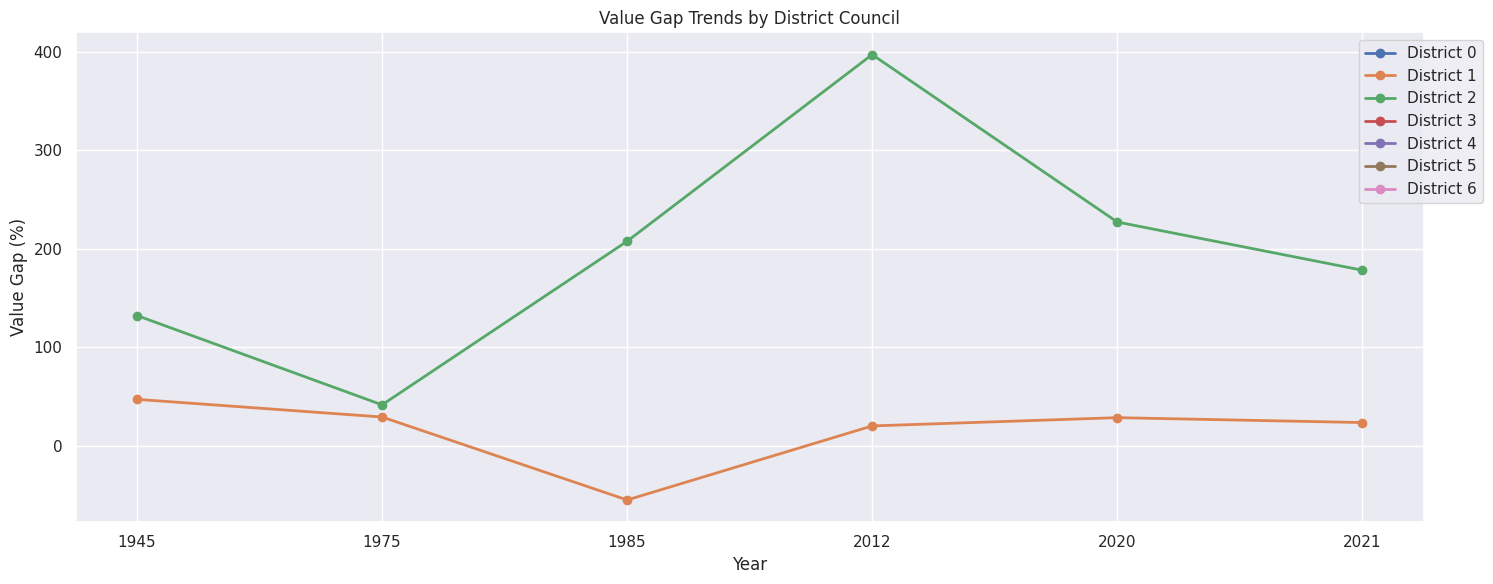


2. Growth Rate Analysis
--------------------------------------------------


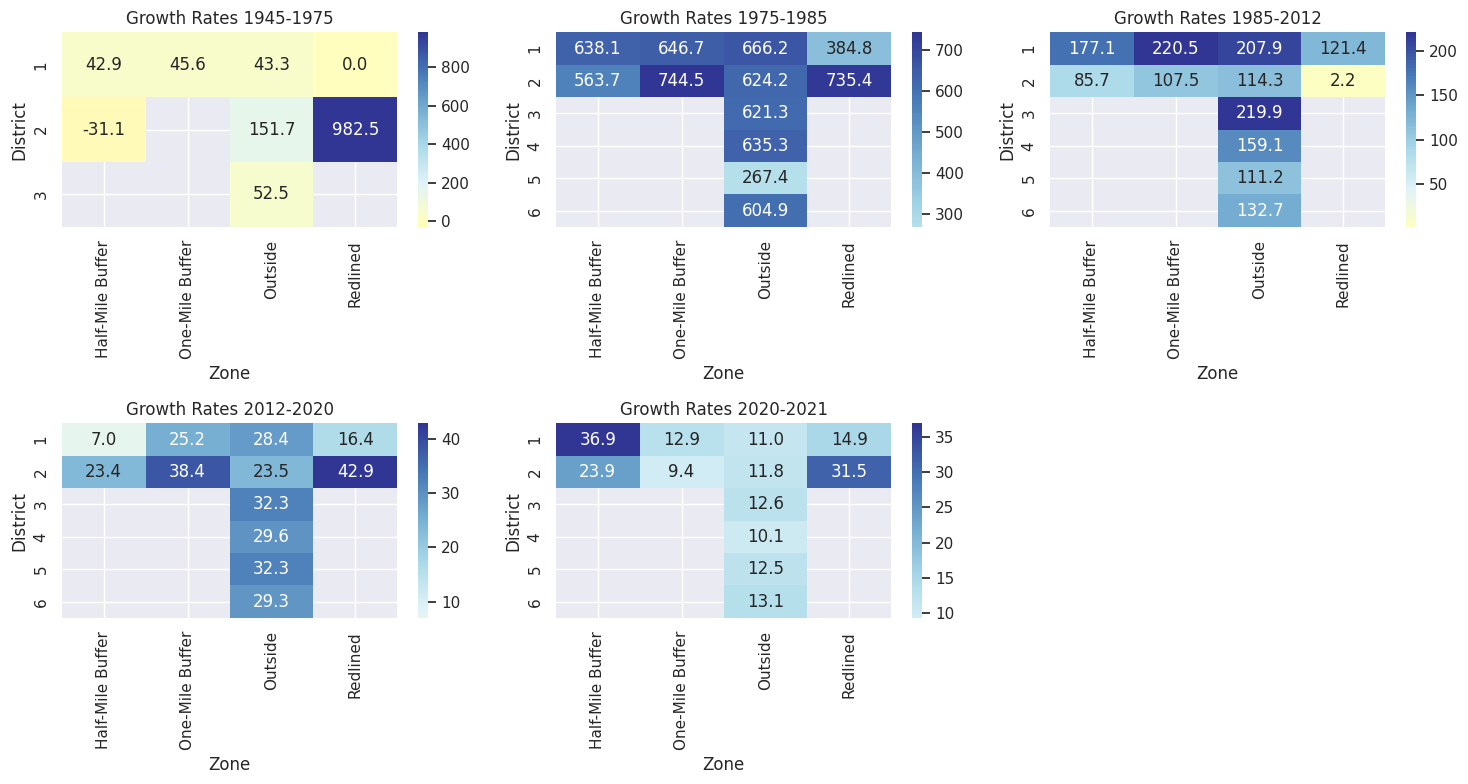


3. Investment Pattern Analysis
--------------------------------------------------


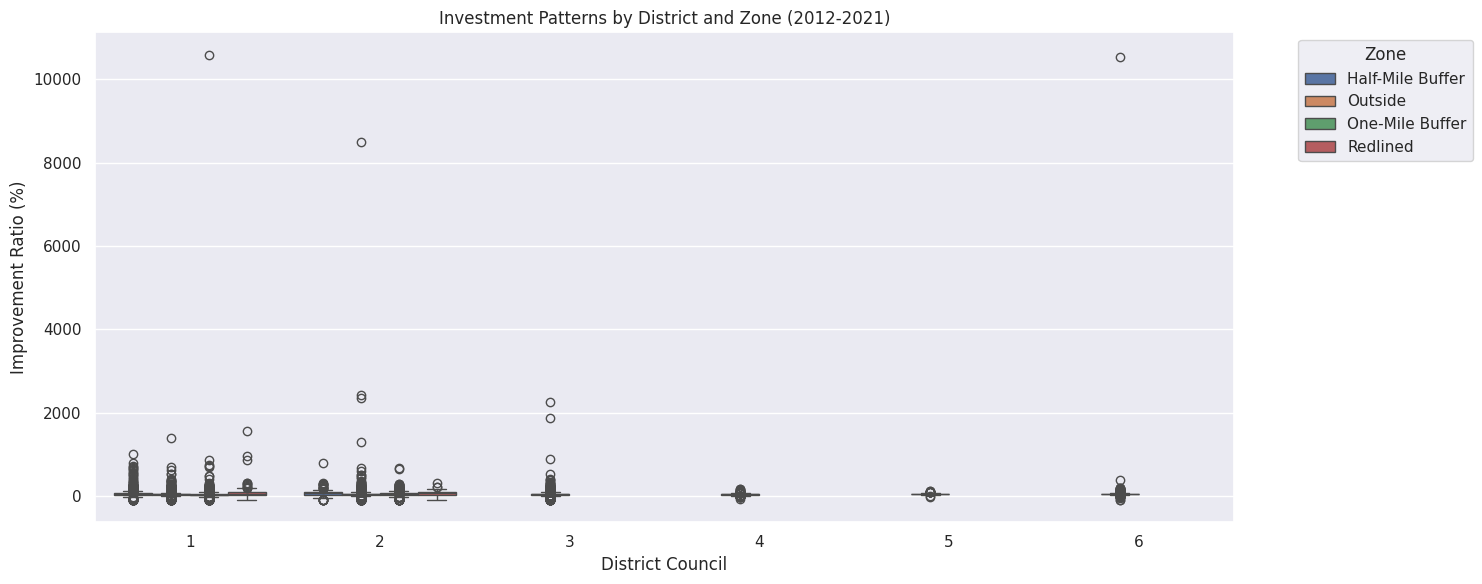


4. Success Metrics Analysis
--------------------------------------------------


<Figure size 1500x600 with 0 Axes>

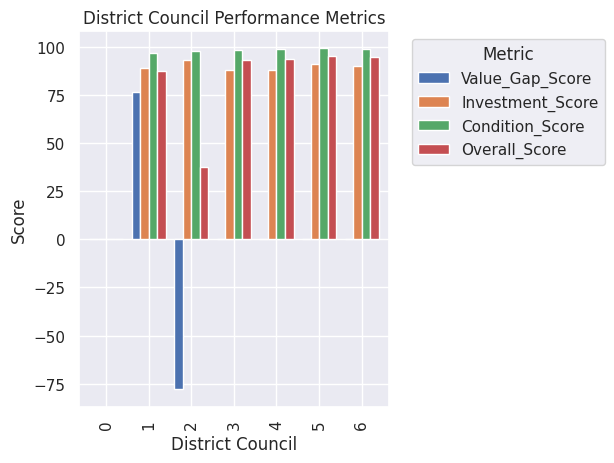


District Council Rankings (Overall Performance):

1. District 5:
   Overall Score: 95.31
   Value Gap Score: nan
   Investment Score: 91.28
   Condition Score: 99.34

2. District 6:
   Overall Score: 94.76
   Value Gap Score: nan
   Investment Score: 90.32
   Condition Score: 99.19

3. District 4:
   Overall Score: 93.62
   Value Gap Score: nan
   Investment Score: 88.02
   Condition Score: 99.22

4. District 3:
   Overall Score: 93.46
   Value Gap Score: nan
   Investment Score: 88.24
   Condition Score: 98.69

5. District 1:
   Overall Score: 87.53
   Value Gap Score: 76.61
   Investment Score: 89.07
   Condition Score: 96.89

6. District 2:
   Overall Score: 37.65
   Value Gap Score: -78.03
   Investment Score: 93.14
   Condition Score: 97.84

7. District 0:
   Overall Score: nan
   Value Gap Score: nan
   Investment Score: nan
   Condition Score: nan


In [ ]:
# Run the district performance analysis
results = run_district_performance_analysis()

This analysis examines district council performance through four main components:

Value Gap Reduction Analysis

- How well districts have reduced disparities
- Temporal trends in value gaps
- District-specific patterns
- Comparative performance


Growth Rate Analysis

- Property value growth across zones
- District-specific growth patterns
- Comparative performance metrics
- Temporal evolution


Investment Pattern Analysis

- Analysis of improvements and investments
- Zone-specific patterns within districts
- Investment effectiveness
- Recent trends (2012-2021)


Success Metrics Analysis

- Composite performance metrics
- Multi-factor evaluation
- District rankings
- Detailed performance breakdown



---


# PART 4 - Conslusions, Recommendations, Implications and Resources

### Conclusions

**1. Long-Term Property Value Evolution (1945-2021):**

- The median property value in redlined areas increased from \$1,000 in 1945 to $57,712 in 2021, while outside areas grew from \$1,800 to \$127,805, demonstrating how initial small differences (\$800) amplified into major disparities (\$70,093) over time.

- The most dramatic growth period occurred between 1975-1985, where redlined areas saw an exceptional 1,160% increase, but this brief period of rapid growth wasn't sustained, and the value gap subsequently widened again.


**2. District-Level Performance:**

- District 6 showed the most remarkable total growth at 10,292%, followed by Districts 2 and 3 at around 6,600%, yet this growth didn't translate to highest current values, suggesting that starting from a lower base masks persistent inequalities.

- Districts 4 and 5 maintain the highest current median values (over $195,000) despite lower historical growth rates, indicating that areas unaffected by redlining have built and maintained wealth more effectively.

- Districts 1 and 2, which contain all redlined properties, show the lowest current values (under $80,000) despite substantial growth, demonstrating how historical policies continue to suppress property values.


**3. Buffer Zone Effects:**

- Properties in the half-mile buffer zone show the highest volatility (coefficient of variation increasing from 1.050 in 1945 to 7.983 in 2021), indicating these transition areas face the most market uncertainty.

- The one-mile buffer zone maintains more stable values than the half-mile buffer but still shows suppressed values compared to outside areas, demonstrating how redlining's negative effects ripple outward.


**4. Market Stability Patterns:**

- Outside zones show increasing but managed volatility (coefficient of variation growing from 0.453 to 2.574), suggesting a dynamic but relatively stable market.

- Redlined areas show deceptively low volatility in recent years (coefficient of variation: 1.954 by 2021), which actually indicates market stagnation rather than stability.

- The stark increase in decline rates in buffer zones (reaching 37% in 1985-2012) suggests deteriorating conditions and possible disinvestment in these transition areas.

### Recommendations

**1. Targeted Investment Strategies:**

  - Implement focused property rehabilitation programs in Districts 1 and 2, where data shows the most severe value suppression, to help close the 121.5% value gap with outside areas.

  - Create economic opportunity zones in half-mile buffer areas, where high volatility (7.983 CV) indicates the greatest potential for positive market intervention.


**2. Policy Interventions:**

  - Develop property tax incentive programs specifically for redlined areas where median values remain stuck at $57,712 (2021) compared to \$127,805 in outside areas.

  - Establish maintenance support programs for properties in buffer zones where decline rates have reached concerning levels (16% in 2020-2021).


**3. Infrastructure Development:**

  - Prioritize public infrastructure improvements in Districts 1 and 2, where data shows property values have failed to keep pace despite high growth rates.

  - Create development grants targeting the half-mile buffer zone, where extreme volatility (CV: 7.983) suggests market uncertainty is deterring private investment.

### Implications

**1. Economic Impact:**

- Without intervention, the $70,093 property value gap will likely continue to widen, perpetuating wealth inequality across generations.

- The high volatility in buffer zones (CV: 7.983) suggests these areas could either decline further or present opportunities for successful intervention.


**2. Social Consequences:**


- The persistent value gap (121.5% by 2021) indicates that historical redlining continues to affect wealth building opportunities for residents in affected areas.

- The stark difference in property values between Districts 4-5 (\$195,000+) and Districts 1-2 (<$80,000) suggests ongoing social and economic segregation.


**3. Future Development:**


- The slowing growth rates across all zones post-2012 suggest that without targeted intervention, existing disparities will become further entrenched.

- The deceptive stability in redlined areas (CV: 1.954) indicates these markets may need significant external stimulus to achieve meaningful growth.


**4. Policy Effectiveness:**


- The data suggests that general economic growth alone (even during the 1975-1985 boom period) is insufficient to close the value gap, indicating the need for targeted interventions.

- The gradual deterioration in buffer zones indicates that addressing redlining's effects requires considering impacts beyond just the directly redlined areas.

### Resources

1. [Lubbock’s zoning has a history of Jim Crow. City officials refuse to reckon with it.](https://texashousers.org/2019/09/05/lubbock-zoning-jim-crow-ai/)
2. [New complaint claims Lubbock's racist zoning violates Civil Rights Act](https://radio.kttz.org/2023-07-26/new-complaint-claims-lubbocks-racist-zoning-violates-civil-rights-act)
3. [A friendly city where the problems of race and equity go unacknowledged and unresolved](https://texashousers.org/2018/02/25/a-friendly-place-where-the-problems-of-race-and-equity-go-unacknowledged-and-unresolved/)
4. [Interstate 27 has divided Lubbock for decades. North and east side residents want that to change.](https://www.texastribune.org/2024/07/19/lubbock-texas-interstate-segregation/)
5. [Advocacy Groups Say Lubbock’s 2040 Land Use Plan Violates the Fair Housing Act](https://www.texasobserver.org/lubbock-fair-housing-2040-land-use/)
6. [Google Map showing the 1923 ordinance black residents area](https://www.google.com/maps/d/edit?mid=1B4WWtZsSC2f9dBQNJEgmaQV2bNzHIrg&ll=33.5701837299779%2C-101.83325585&z=14)
7. [Lubbock City Limits and Council District Map](https://www.arcgis.com/apps/mapviewer/index.html?webmap=aa605340a29a4e66bef79371b6140227)
8. Perplexity AI
9. Claude AI